In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
from sklearn import preprocessing
import scipy.stats as stats
import scipy.stats as boxcox
from sklearn.preprocessing import PowerTransformer

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
frames = list()
results = pd.read_csv("/content/drive/MyDrive/Classroom/CNC/train.csv")
for i in range(1,19):
    exp = '0' + str(i) if i < 10 else str(i)
    frame = pd.read_csv("/content/drive/MyDrive/Classroom/CNC/experiment_{}.csv".format(exp))
    row = results[results['No'] == i]
    frame['target'] = 1 if row.iloc[0]['tool_condition'] == 'worn' else 0
    frames.append(frame)
df = pd.concat(frames, ignore_index = True)
df.head()

X1_ActualPosition  X1_ActualVelocity  X1_ActualAcceleration  \
0              198.0                0.0                   0.00   
1              198.0              -10.8                -350.00   
2              196.0              -17.8                  -6.25   
3              194.0              -18.0                   0.00   
4              193.0              -17.9                 -18.80   

   X1_CommandPosition  X1_CommandVelocity  X1_CommandAcceleration  \
0               198.0                 0.0                0.000000   
1               198.0               -13.6             -358.000000   
2               196.0               -17.9               -0.000095   
3               194.0               -17.9               -0.000095   
4               192.0               -17.9                0.000095   

   X1_CurrentFeedback  X1_DCBusVoltage  X1_OutputCurrent  X1_OutputVoltage  \
0                0.18           0.0207             329.0              2.77   
1              -10.90           0.1860             328.0             23.30   
2               -8.59           0.1400             328.0             30.60   
3               -6.11           0.1300             327.0             30.30   
4               -5.70           0.1140             328.0             30.50   

   ...  S1_DCBusVoltage  S1_OutputCurrent  S1_OutputVoltage  S1_OutputPower  \
0  ...     2.740000e-19             329.0               0.0    6.960000e-07   
1  ...     2.740000e-19             328.0               0.0   -5.270000e-07   
2  ...     2.740000e-19             328.0               0.0    9.100000e-07   
3  ...     2.740000e-19             328.0               0.0    1.070000e-06   
4  ...     2.740000e-19             328.0               0.0    1.960000e-06   

   S1_SystemInertia  M1_CURRENT_PROGRAM_NUMBER  M1_sequence_number  \
0              12.0                        1.0                 0.0   
1              12.0                        1.0                 4.0   
2              12.0                        1.0                 7.0   
3              12.0                        1.0                 7.0   
4              12.0                        1.0                 7.0   

   M1_CURRENT_FEEDRATE  Machining_Process  target  
0                 50.0           Starting       0  
1                 50.0               Prep       0  
2                 50.0               Prep       0  
3                 50.0               Prep       0  
4                 50.0               Prep       0  

[5 rows x 49 columns]

## Expolatory Data Analysis (EDA)



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25286 entries, 0 to 25285
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X1_ActualPosition          25286 non-null  float64
 1   X1_ActualVelocity          25286 non-null  float64
 2   X1_ActualAcceleration      25286 non-null  float64
 3   X1_CommandPosition         25286 non-null  float64
 4   X1_CommandVelocity         25286 non-null  float64
 5   X1_CommandAcceleration     25286 non-null  float64
 6   X1_CurrentFeedback         25286 non-null  float64
 7   X1_DCBusVoltage            25286 non-null  float64
 8   X1_OutputCurrent           25286 non-null  float64
 9   X1_OutputVoltage           25286 non-null  float64
 10  X1_OutputPower             25286 non-null  float64
 11  Y1_ActualPosition          25286 non-null  float64
 12  Y1_ActualVelocity          25286 non-null  float64
 13  Y1_ActualAcceleration      25286 non-null  flo

In [6]:
df.describe()

X1_ActualPosition  X1_ActualVelocity  X1_ActualAcceleration  \
count       25286.000000       25286.000000           25286.000000   
mean          159.052045          -0.288657               0.094264   
std            19.330873           5.658260              93.877623   
min           141.000000         -20.400000           -1280.000000   
25%           145.000000          -2.050000             -31.300000   
50%           153.000000           0.000000               0.000000   
75%           162.000000           0.200000              25.000000   
max           198.000000          50.700000            1440.000000   

       X1_CommandPosition  X1_CommandVelocity  X1_CommandAcceleration  \
count        25286.000000        25286.000000            25286.000000   
mean           159.050700           -0.283076                0.253215   
std             19.331144            5.664309               72.594951   
min            141.000000          -20.000000            -1000.000000   
25%            145.000000           -2.050000                0.000000   
50%            153.000000            0.000000                0.000000   
75%            162.000000            0.000000                0.000000   
max            198.000000           50.000000             1000.000000   

       X1_CurrentFeedback  X1_DCBusVoltage  X1_OutputCurrent  \
count        25286.000000     2.528600e+04      25286.000000   
mean            -0.469714     6.603073e-02        326.945859   
std              4.220750     3.700384e-02          1.459937   
min            -23.400000     2.780000e-19        320.000000   
25%             -3.930000     4.150000e-02        326.000000   
50%             -0.666000     6.680000e-02        327.000000   
75%              3.140000     9.130000e-02        327.000000   
max             27.100000     3.800000e-01        331.000000   

       X1_OutputVoltage  ...  S1_CurrentFeedback  S1_DCBusVoltage  \
count      25286.000000  ...        25286.000000     2.528600e+04   
mean           7.986942  ...           15.243948     6.692938e-01   
std            7.710379  ...           10.222419     4.332413e-01   
min            0.000000  ...           -8.280000     0.000000e+00   
25%            2.590000  ...            0.821000     2.790000e-19   
50%            7.140000  ...           18.800000     8.580000e-01   
75%           10.200000  ...           22.300000     9.520000e-01   
max           75.400000  ...           75.400000     3.160000e+00   

       S1_OutputCurrent  S1_OutputVoltage  S1_OutputPower  S1_SystemInertia  \
count      25286.000000      25286.000000    25286.000000           25286.0   
mean         322.784505         85.479195        0.127405              12.0   
std            4.293571         52.531863        0.080753               0.0   
min          290.000000          0.000000       -0.002960              12.0   
25%          320.000000          0.000000        0.000005              12.0   
50%          322.000000        117.000000        0.164000              12.0   
75%          327.000000        119.000000        0.183000              12.0   
max          332.000000        130.000000        0.569000              12.0   

       M1_CURRENT_PROGRAM_NUMBER  M1_sequence_number  M1_CURRENT_FEEDRATE  \
count               25286.000000        25286.000000         25286.000000   
mean                    1.003441           47.345013            16.542039   
std                     0.349055           43.826214            19.620219   
min                     0.000000            0.000000             3.000000   
25%                     1.000000            2.000000             3.000000   
50%                     1.000000           39.000000             6.000000   
75%                     1.000000           85.000000            20.000000   
max                     4.000000          135.000000            50.000000   

             target  
count  25286.000000  
mean       0.526299  
std        0.499318  
min        0.000000  
25%

In [7]:
df.columns

Index(['X1_ActualPosition', 'X1_ActualVelocity', 'X1_ActualAcceleration',
       'X1_CommandPosition', 'X1_CommandVelocity', 'X1_CommandAcceleration',
       'X1_CurrentFeedback', 'X1_DCBusVoltage', 'X1_OutputCurrent',
       'X1_OutputVoltage', 'X1_OutputPower', 'Y1_ActualPosition',
       'Y1_ActualVelocity', 'Y1_ActualAcceleration', 'Y1_CommandPosition',
       'Y1_CommandVelocity', 'Y1_CommandAcceleration', 'Y1_CurrentFeedback',
       'Y1_DCBusVoltage', 'Y1_OutputCurrent', 'Y1_OutputVoltage',
       'Y1_OutputPower', 'Z1_ActualPosition', 'Z1_ActualVelocity',
       'Z1_ActualAcceleration', 'Z1_CommandPosition', 'Z1_CommandVelocity',
       'Z1_CommandAcceleration', 'Z1_CurrentFeedback', 'Z1_DCBusVoltage',
       'Z1_OutputCurrent', 'Z1_OutputVoltage', 'S1_ActualPosition',
       'S1_ActualVelocity', 'S1_ActualAcceleration', 'S1_CommandPosition',
       'S1_CommandVelocity', 'S1_CommandAcceleration', 'S1_CurrentFeedback',
       'S1_DCBusVoltage', 'S1_OutputCurrent', 'S1_OutputVolt

In [8]:
features=['X1_ActualPosition', 'X1_ActualVelocity', 'X1_ActualAcceleration',
       'X1_CommandPosition', 'X1_CommandVelocity', 'X1_CommandAcceleration',
       'X1_CurrentFeedback', 'X1_DCBusVoltage', 'X1_OutputCurrent',
       'X1_OutputVoltage', 'X1_OutputPower', 'Y1_ActualPosition',
       'Y1_ActualVelocity', 'Y1_ActualAcceleration', 'Y1_CommandPosition',
       'Y1_CommandVelocity', 'Y1_CommandAcceleration', 'Y1_CurrentFeedback',
       'Y1_DCBusVoltage', 'Y1_OutputCurrent', 'Y1_OutputVoltage',
       'Y1_OutputPower', 'Z1_ActualPosition', 'Z1_ActualVelocity',
       'Z1_ActualAcceleration', 'Z1_CommandPosition', 'Z1_CommandVelocity',
       'Z1_CommandAcceleration', 'Z1_CurrentFeedback', 'Z1_DCBusVoltage',
       'Z1_OutputCurrent', 'Z1_OutputVoltage', 'S1_ActualPosition',
       'S1_ActualVelocity', 'S1_ActualAcceleration', 'S1_CommandPosition',
       'S1_CommandVelocity', 'S1_CommandAcceleration', 'S1_CurrentFeedback',
       'S1_DCBusVoltage', 'S1_OutputCurrent', 'S1_OutputVoltage',
       'S1_OutputPower', 'S1_SystemInertia', 'M1_CURRENT_PROGRAM_NUMBER',
       'M1_sequence_number', 'M1_CURRENT_FEEDRATE', 'Machining_Process',
       'target']

In [9]:
df2=df.drop(columns=['target','Machining_Process'],axis=1)

In [10]:
features2=['X1_ActualPosition', 'X1_ActualVelocity', 'X1_ActualAcceleration',
       'X1_CommandPosition', 'X1_CommandVelocity', 'X1_CommandAcceleration',
       'X1_CurrentFeedback', 'X1_DCBusVoltage', 'X1_OutputCurrent',
       'X1_OutputVoltage', 'X1_OutputPower', 'Y1_ActualPosition',
       'Y1_ActualVelocity', 'Y1_ActualAcceleration', 'Y1_CommandPosition',
       'Y1_CommandVelocity', 'Y1_CommandAcceleration', 'Y1_CurrentFeedback',
       'Y1_DCBusVoltage', 'Y1_OutputCurrent', 'Y1_OutputVoltage',
       'Y1_OutputPower', 'Z1_ActualPosition', 'Z1_ActualVelocity',
       'Z1_ActualAcceleration', 'Z1_CommandPosition', 'Z1_CommandVelocity',
       'Z1_CommandAcceleration', 'Z1_CurrentFeedback', 'Z1_DCBusVoltage',
       'Z1_OutputCurrent', 'Z1_OutputVoltage', 'S1_ActualPosition',
       'S1_ActualVelocity', 'S1_ActualAcceleration', 'S1_CommandPosition',
       'S1_CommandVelocity', 'S1_CommandAcceleration', 'S1_CurrentFeedback',
       'S1_DCBusVoltage', 'S1_OutputCurrent', 'S1_OutputVoltage',
       'S1_OutputPower', 'S1_SystemInertia', 'M1_CURRENT_PROGRAM_NUMBER',
       'M1_sequence_number', 'M1_CURRENT_FEEDRATE']

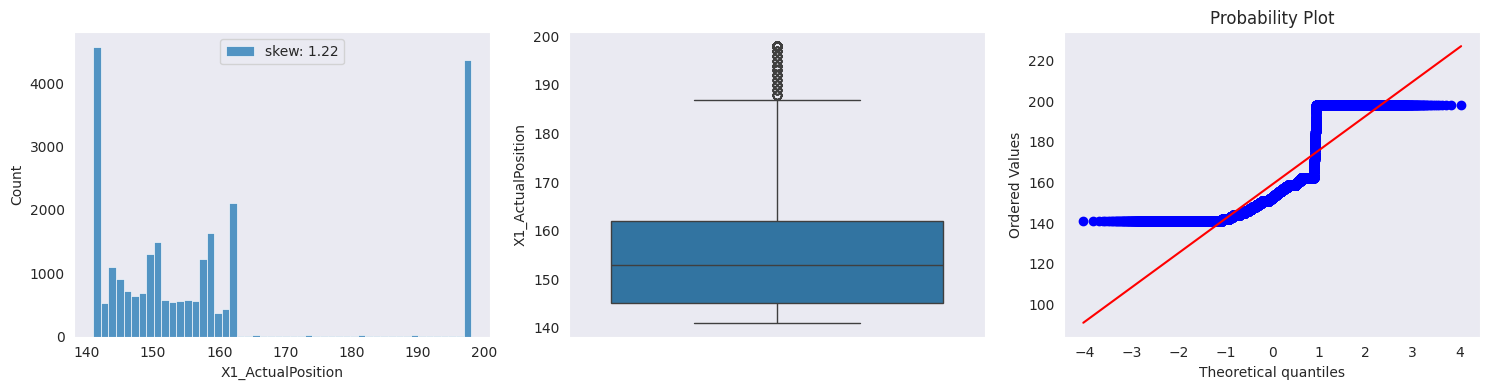

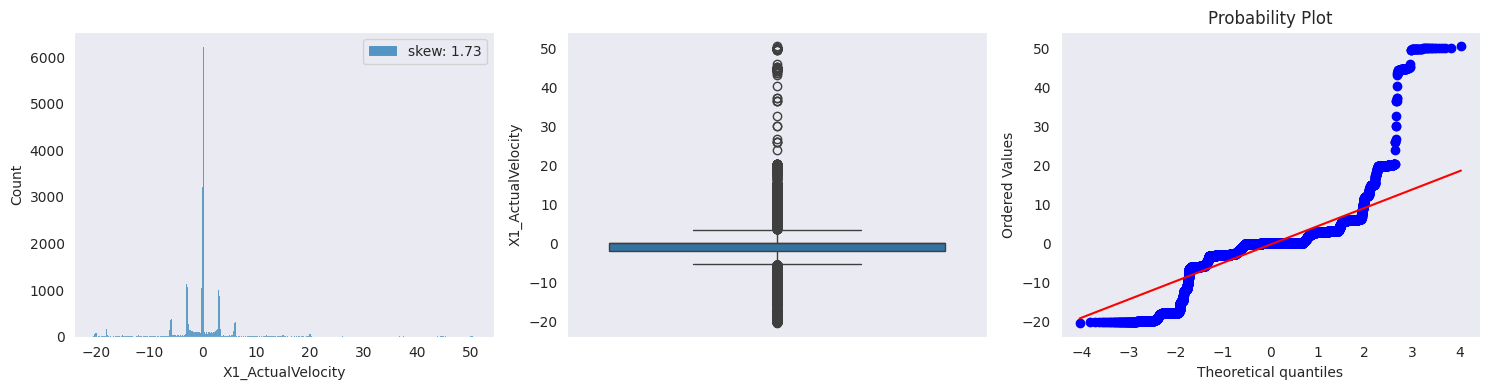

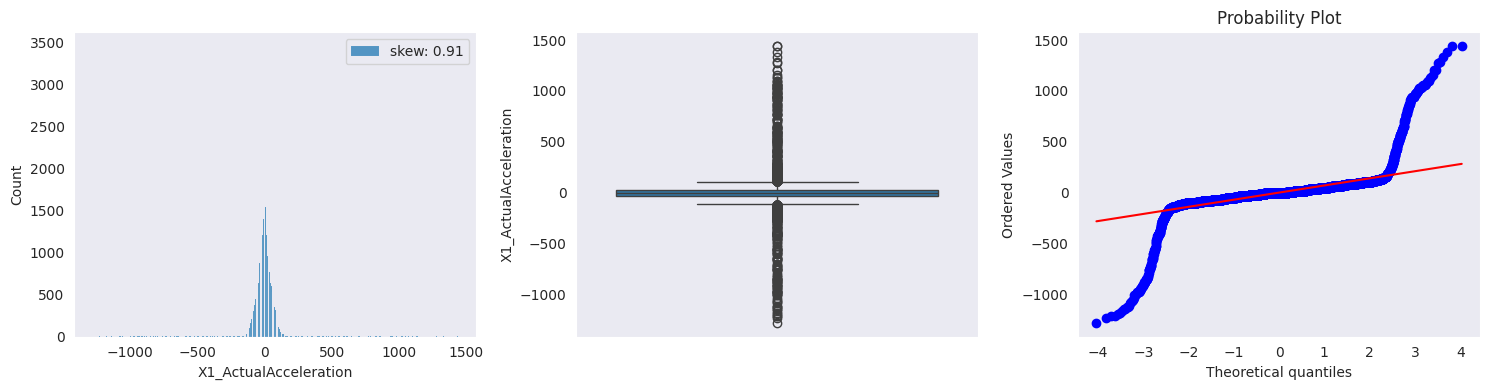

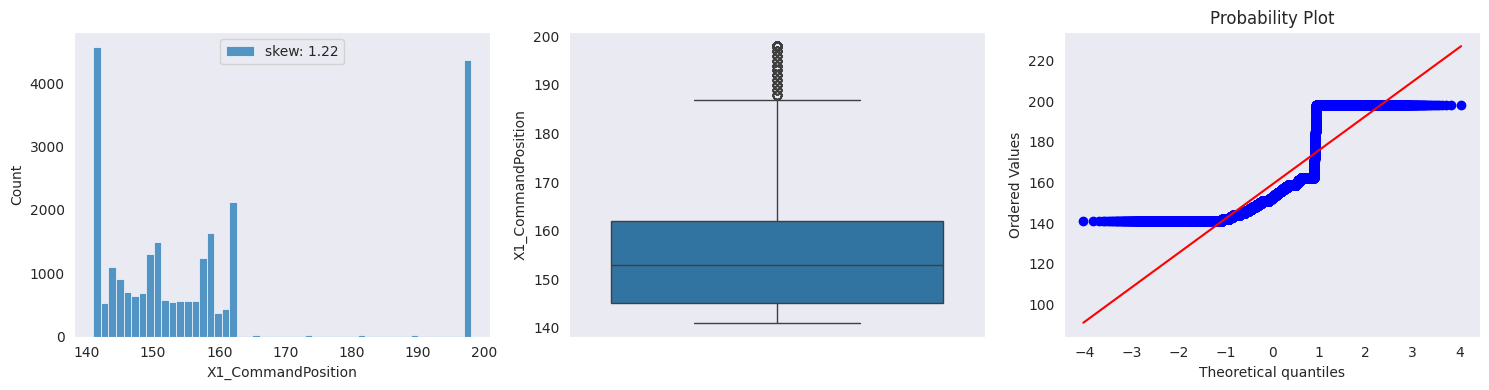

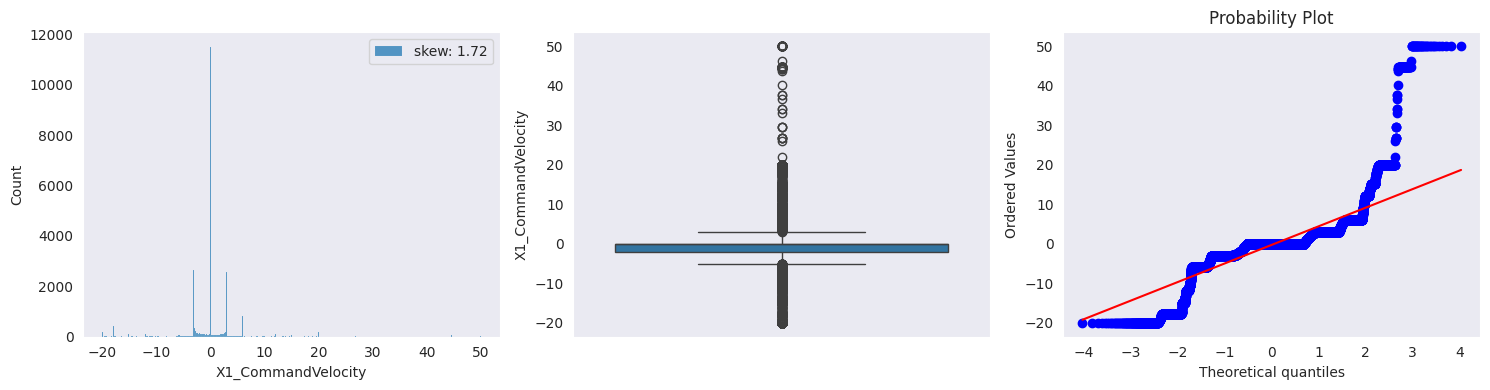

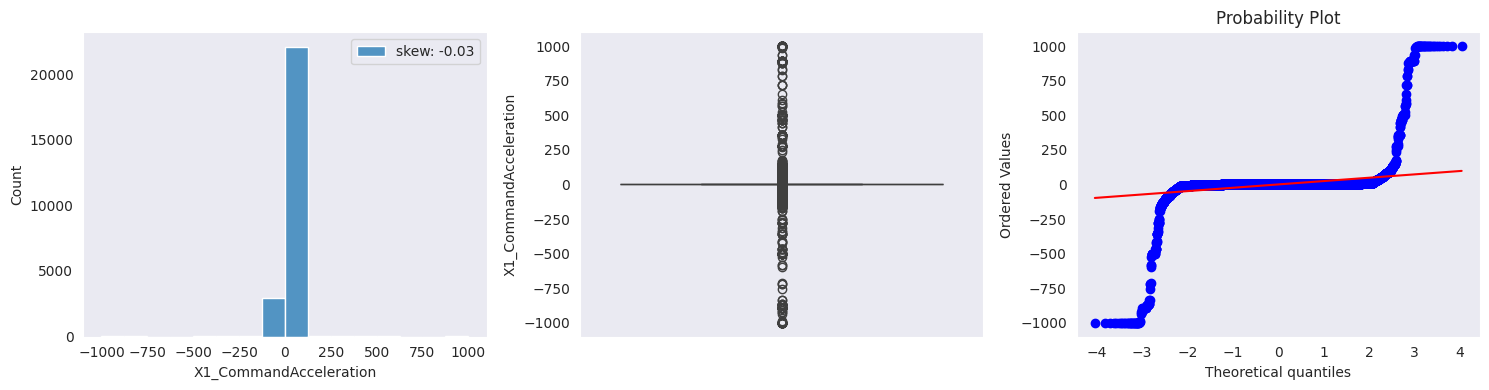

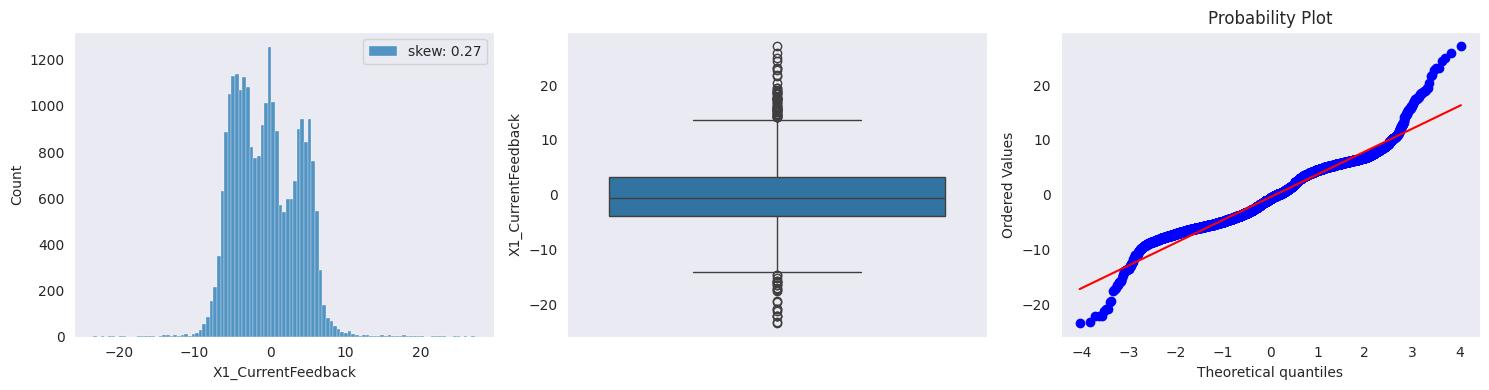

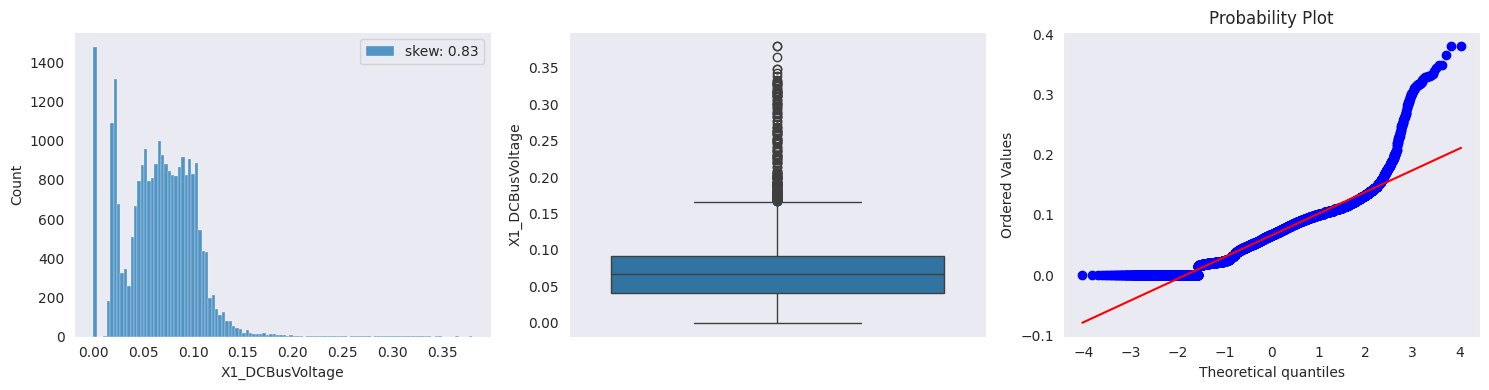

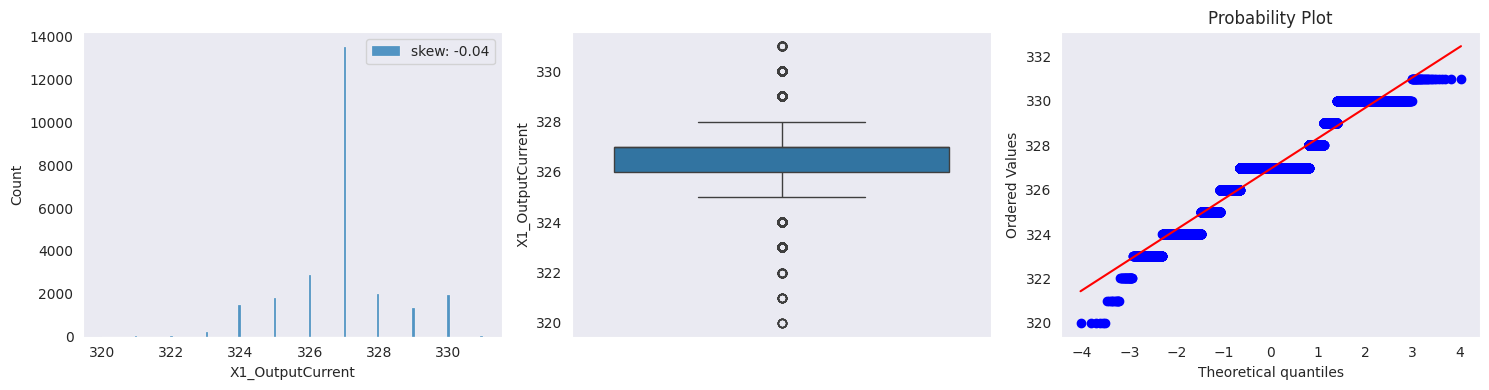

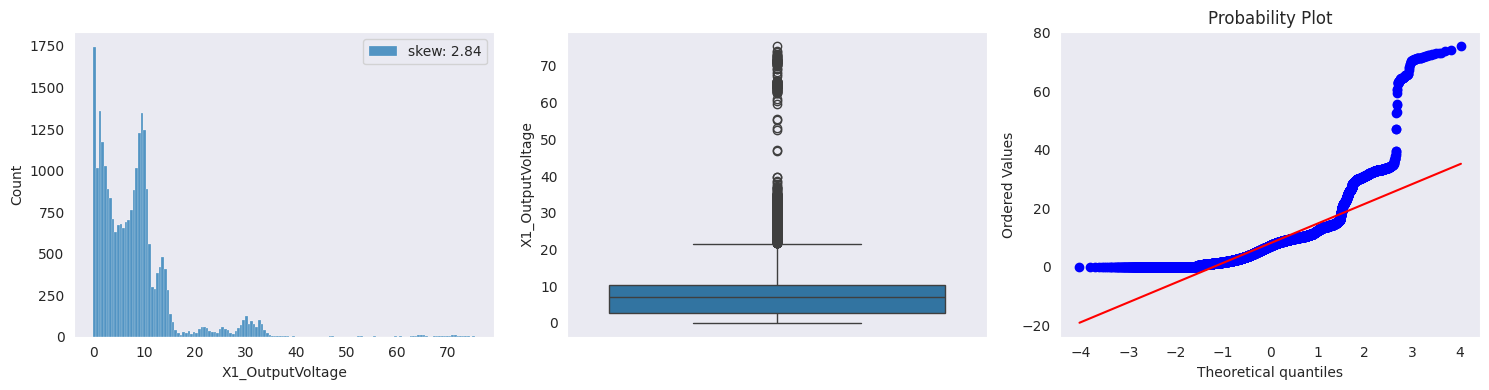

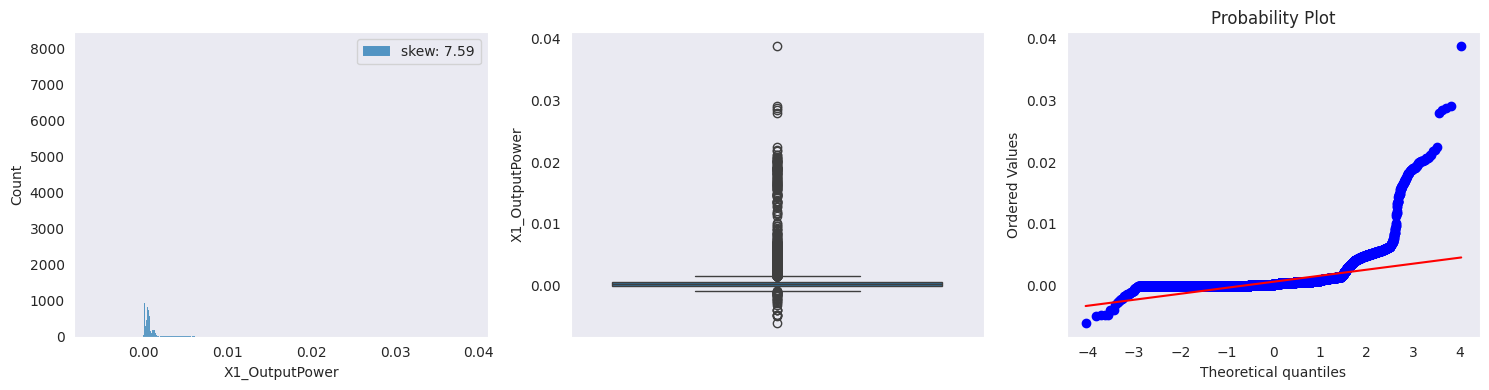

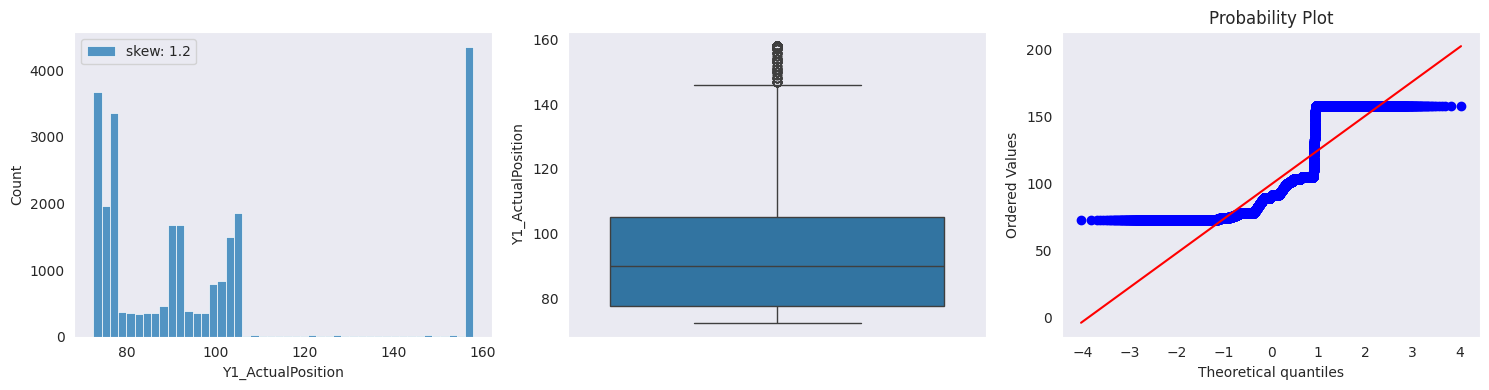

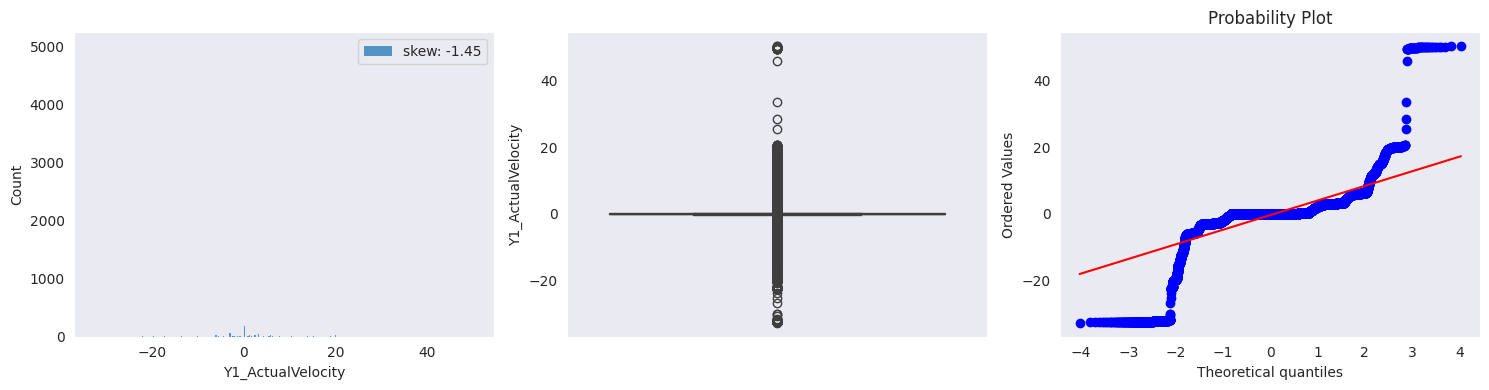

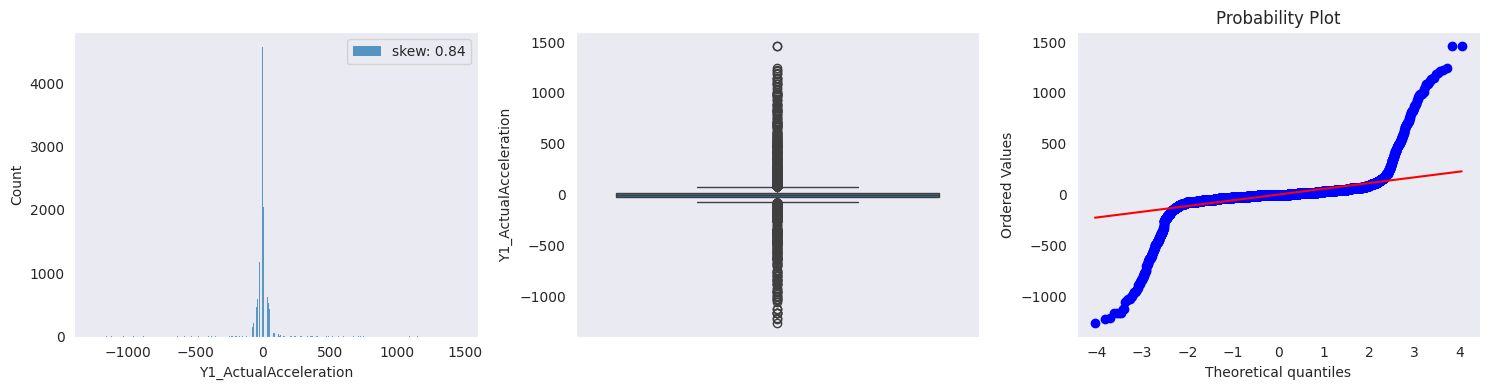

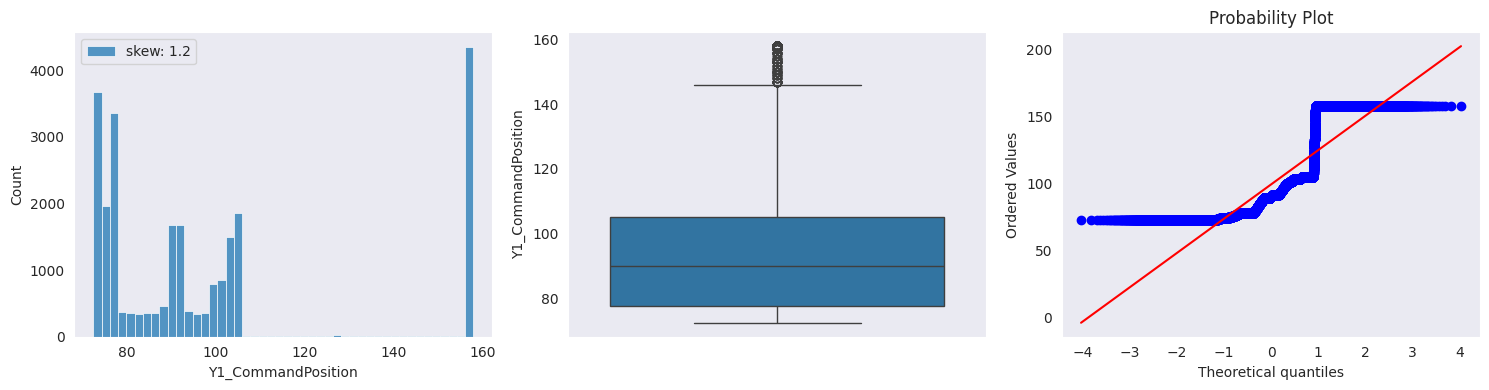

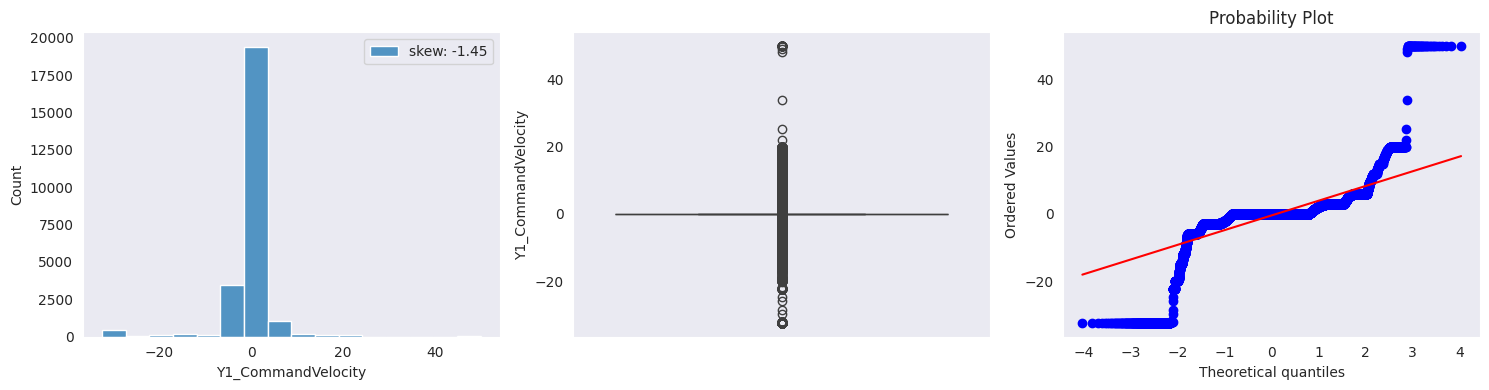

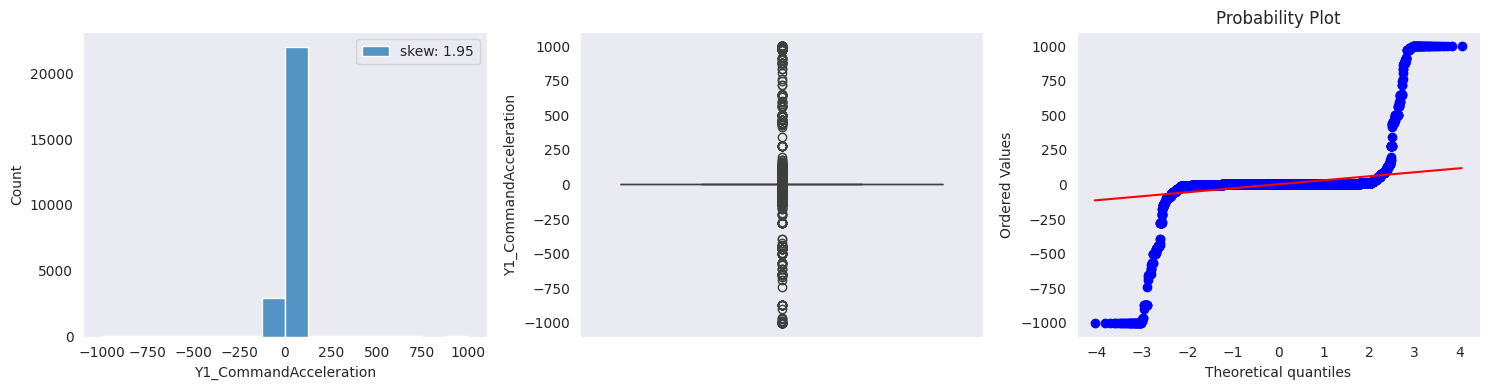

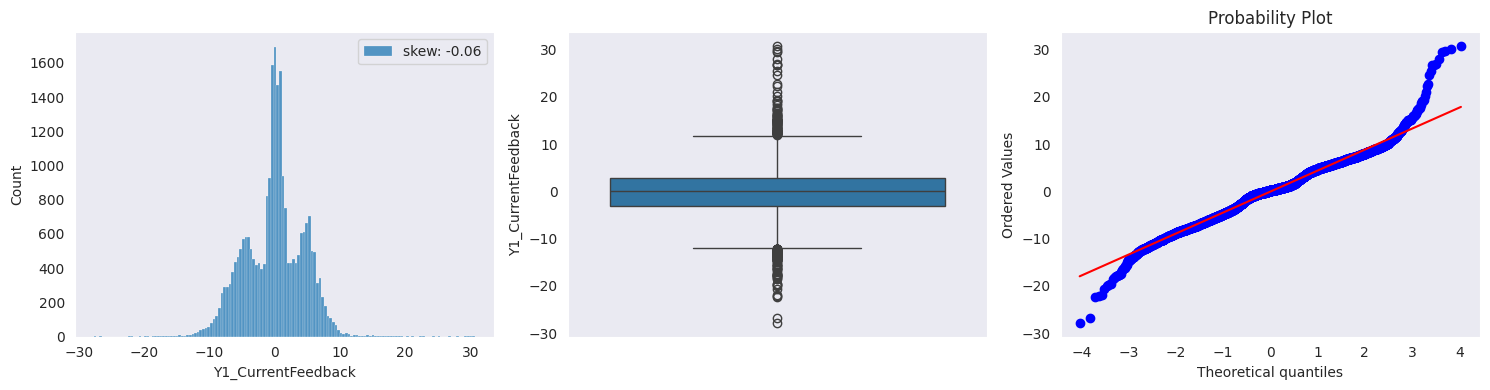

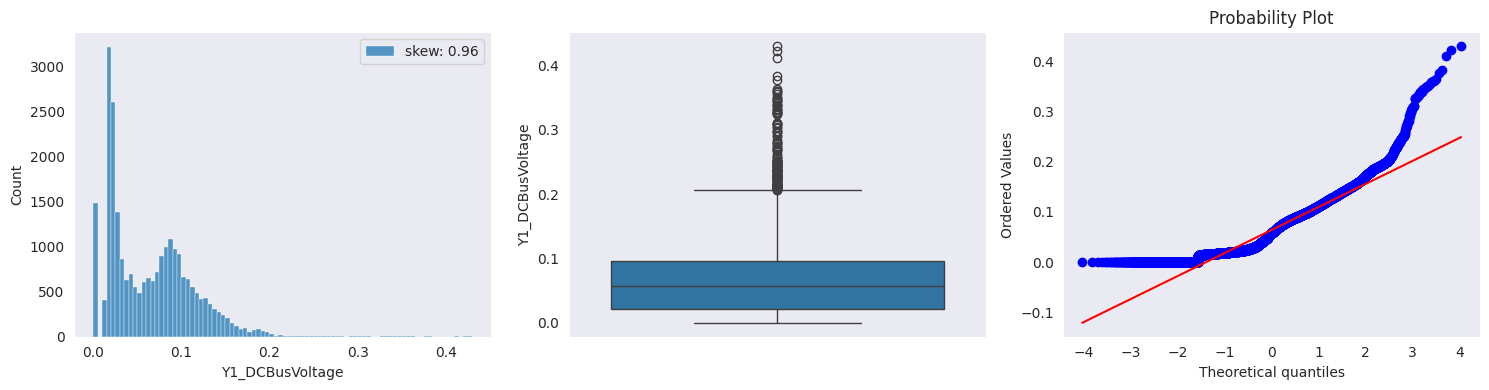

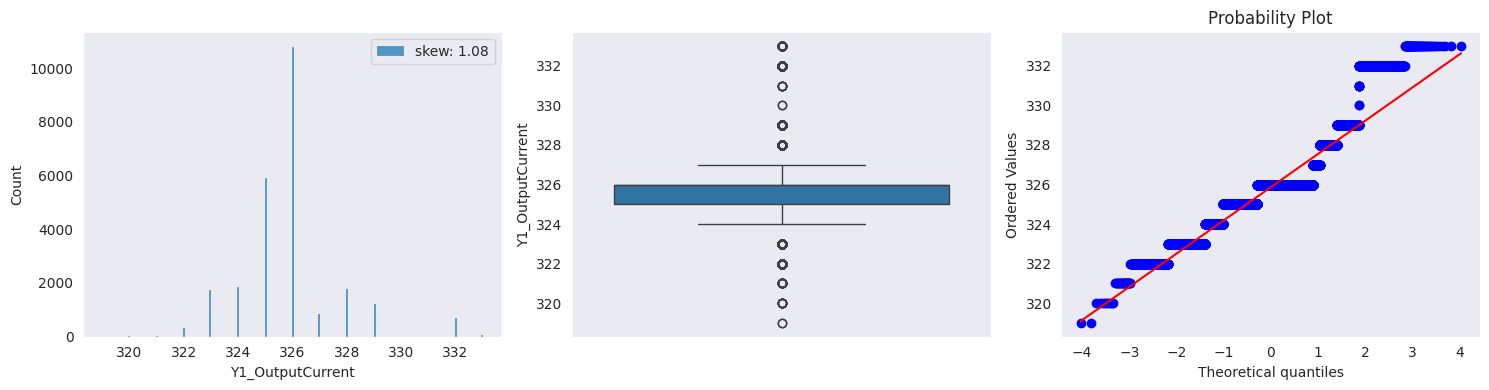

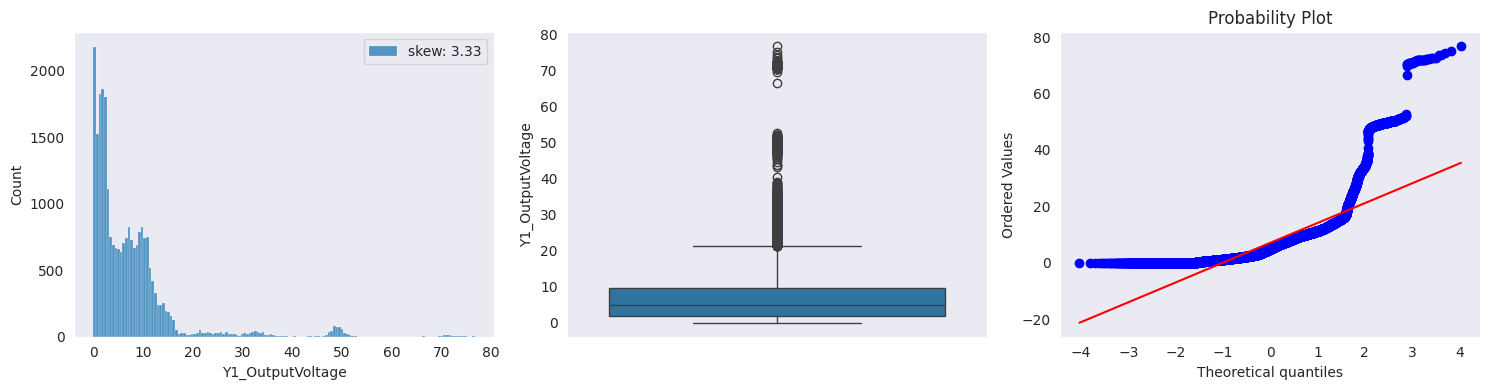

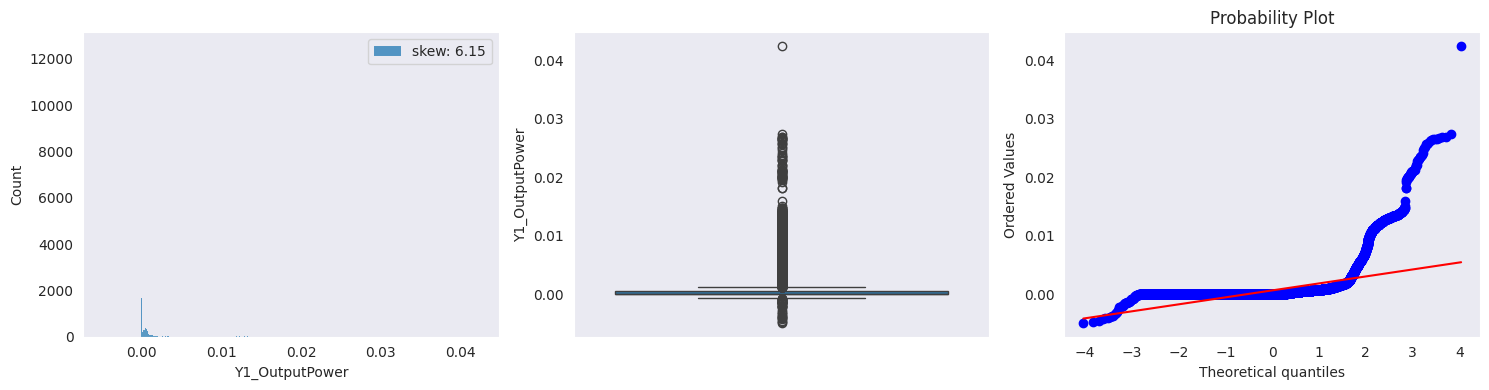

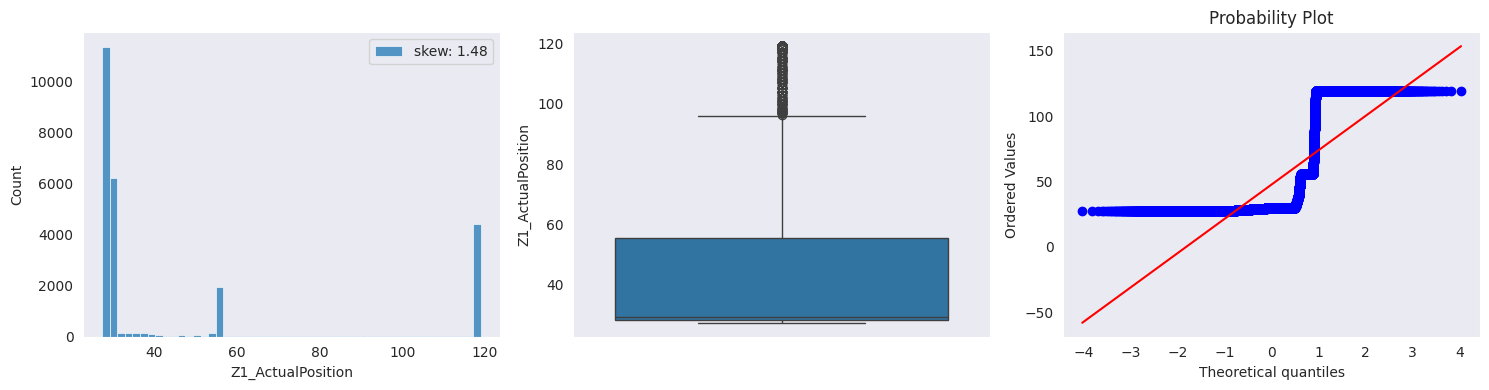

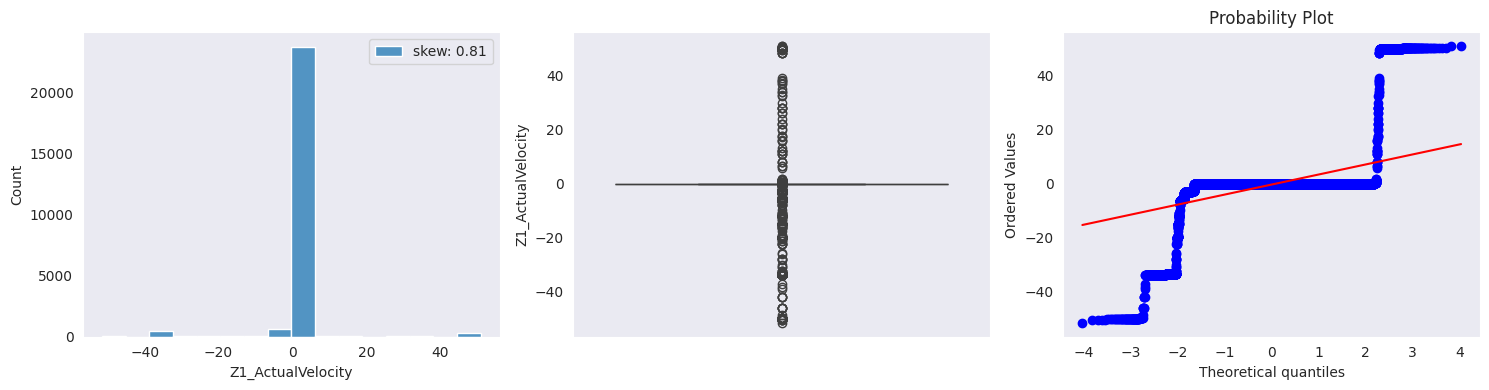

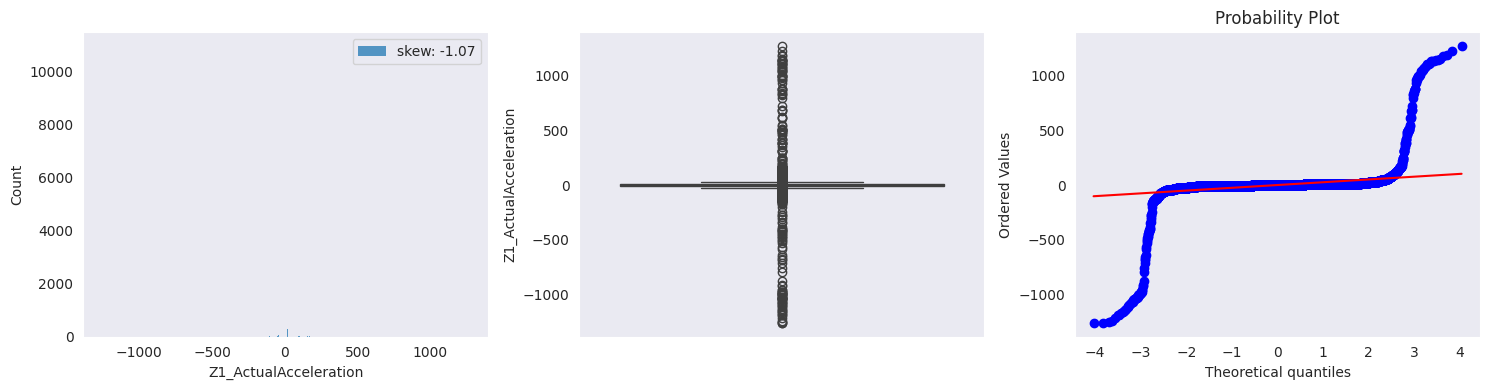

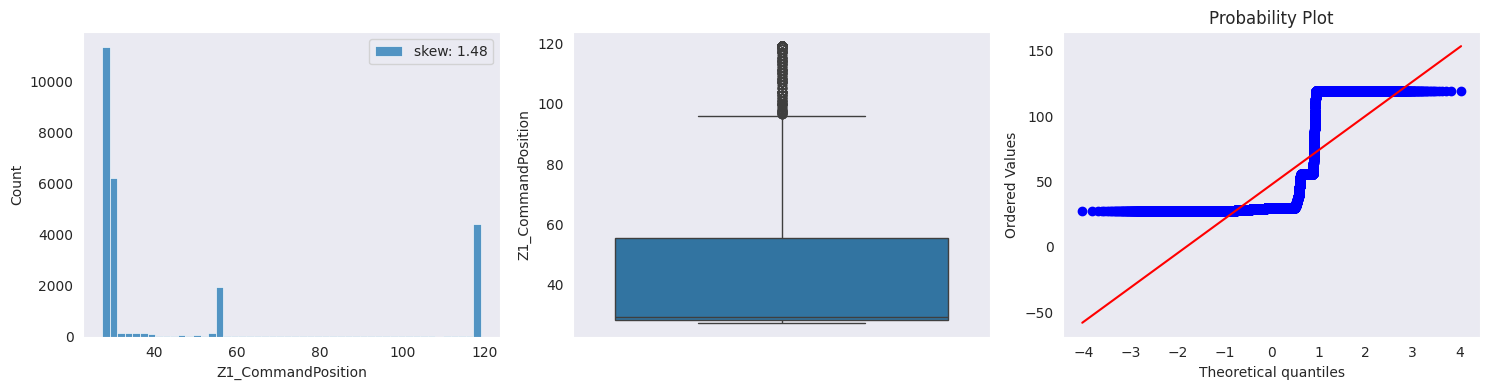

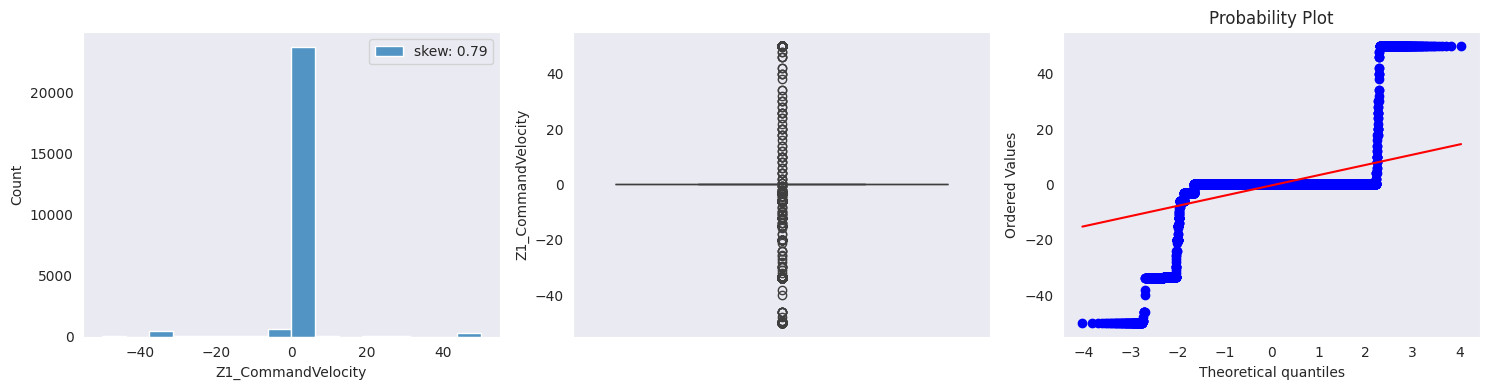

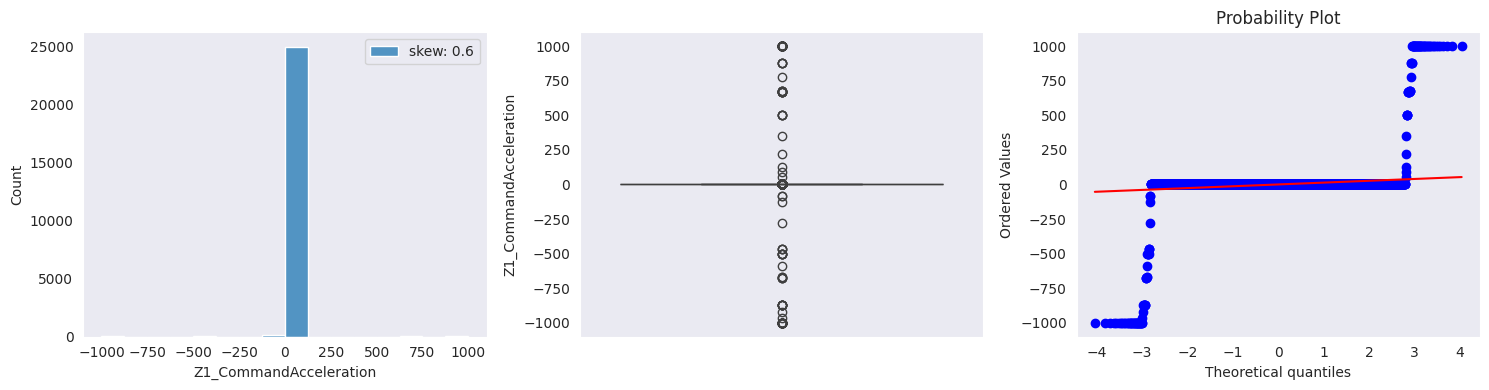

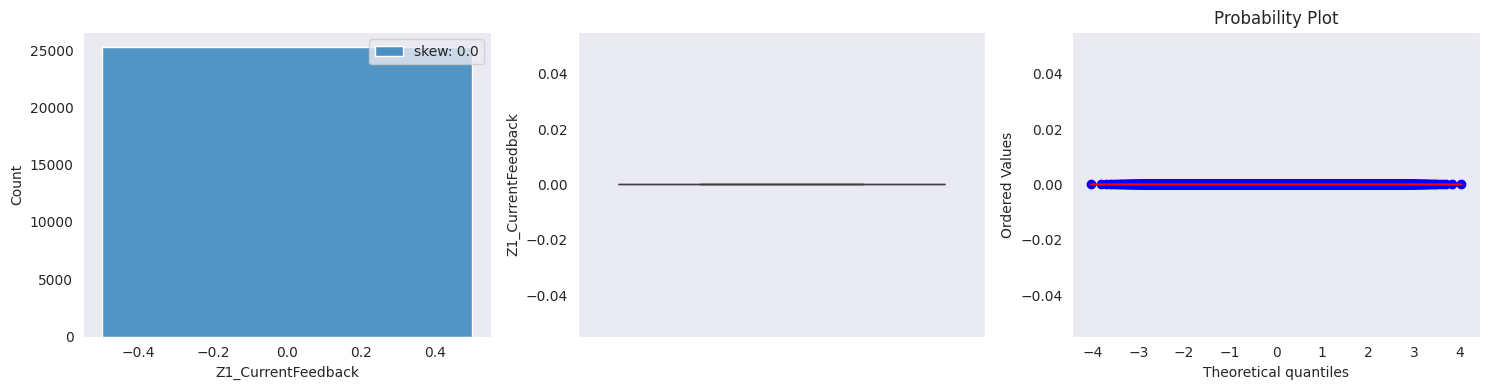

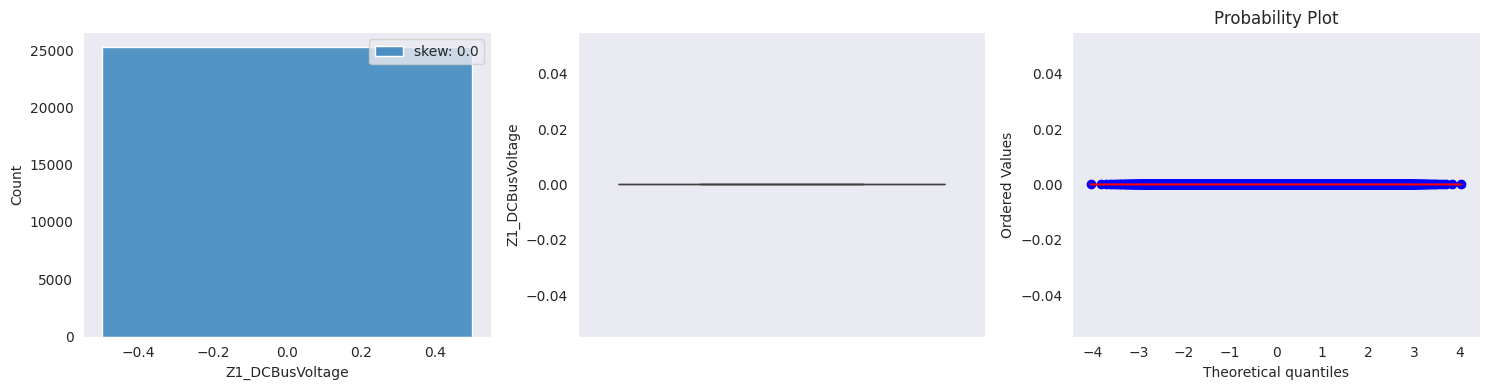

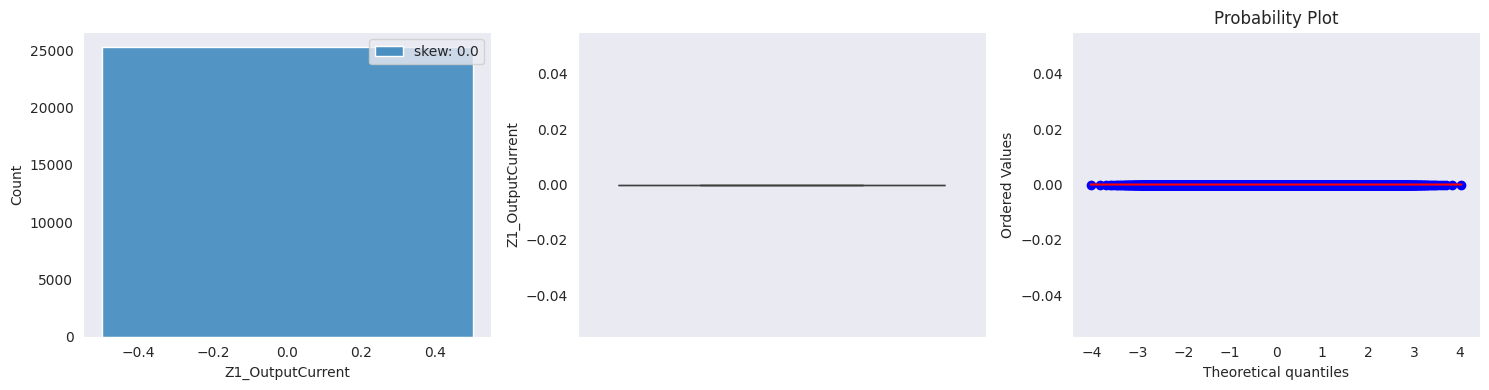

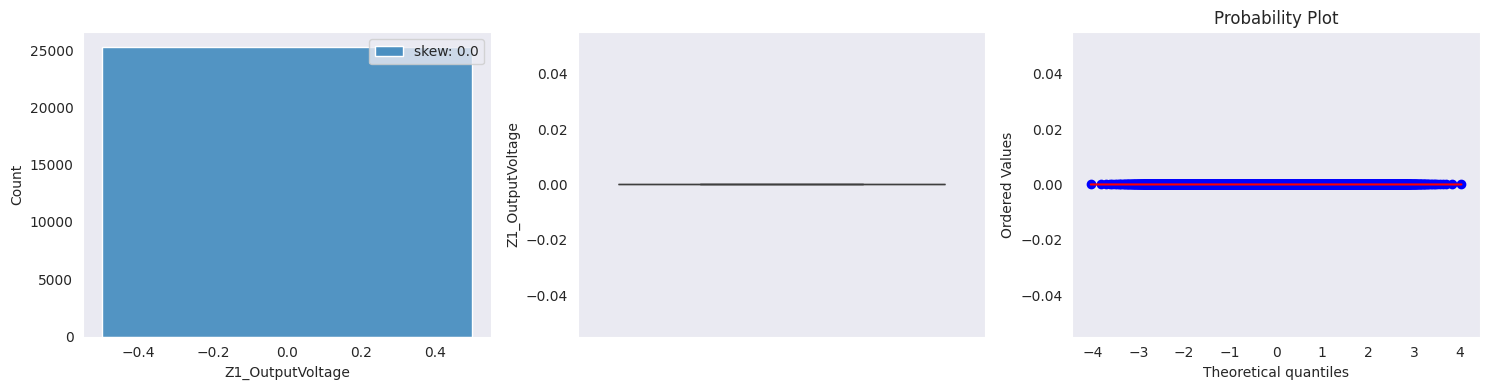

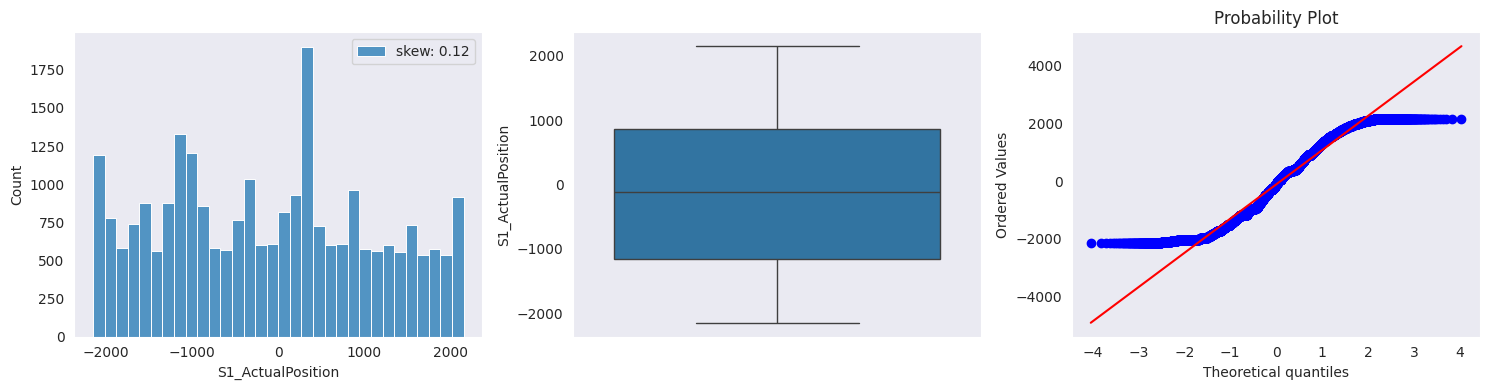

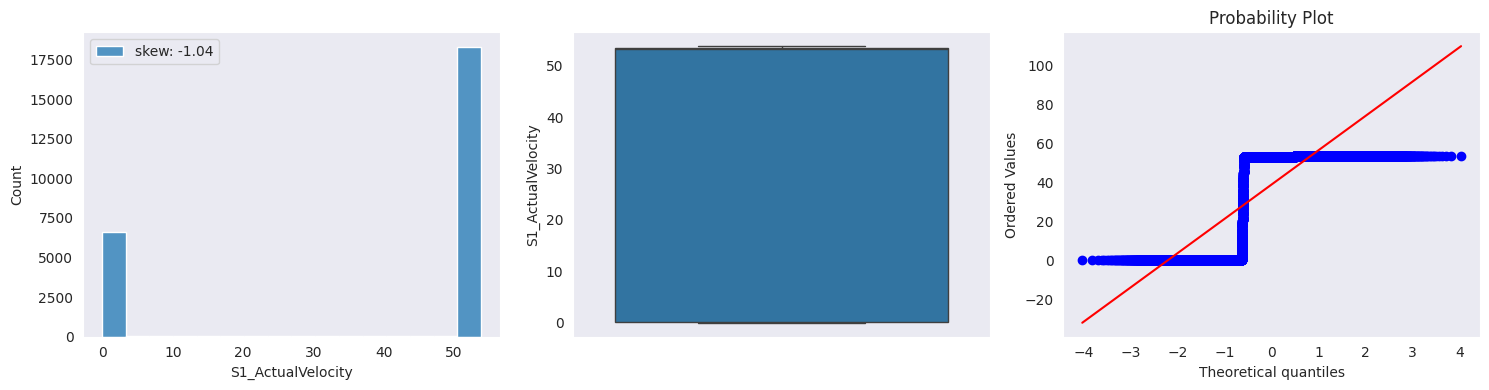

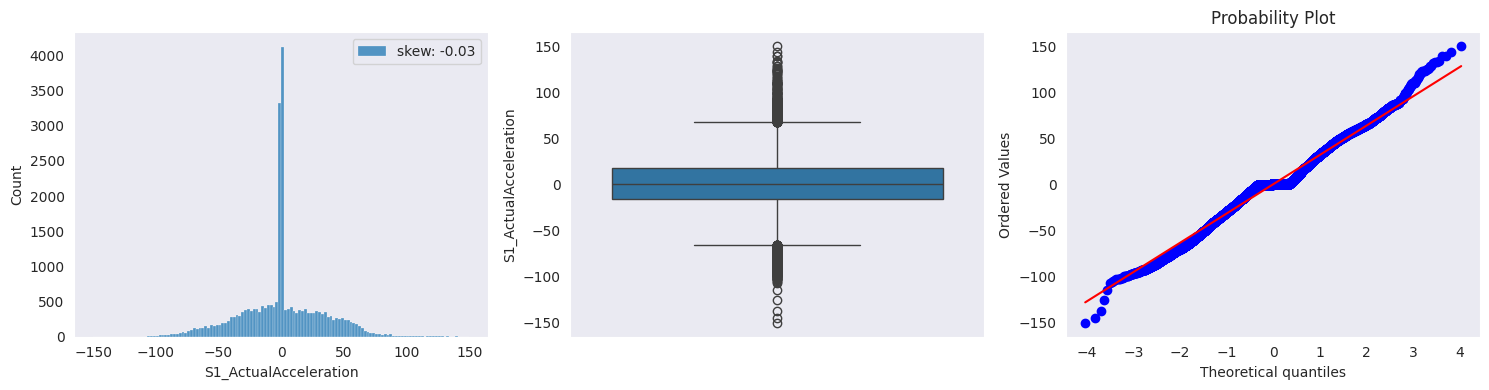

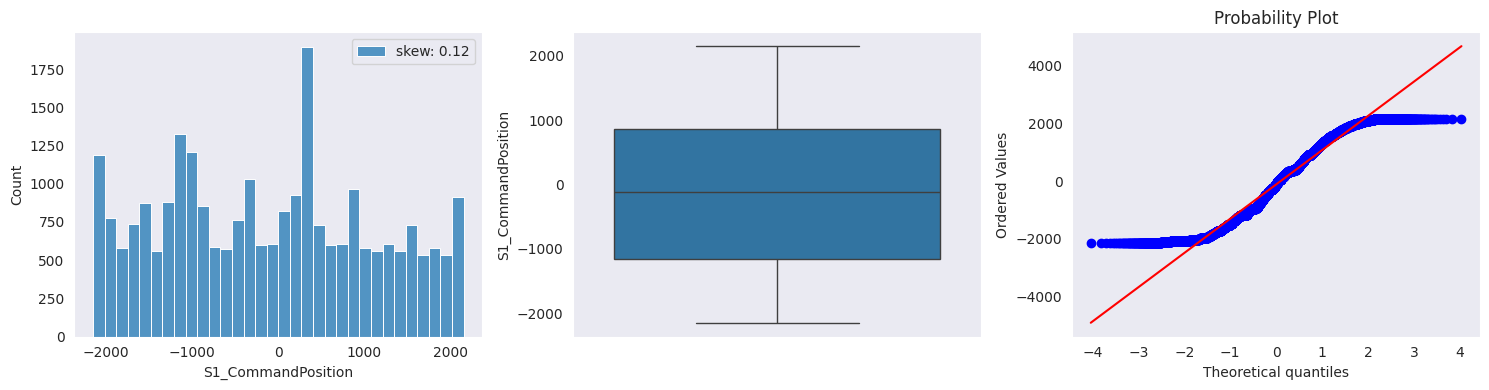

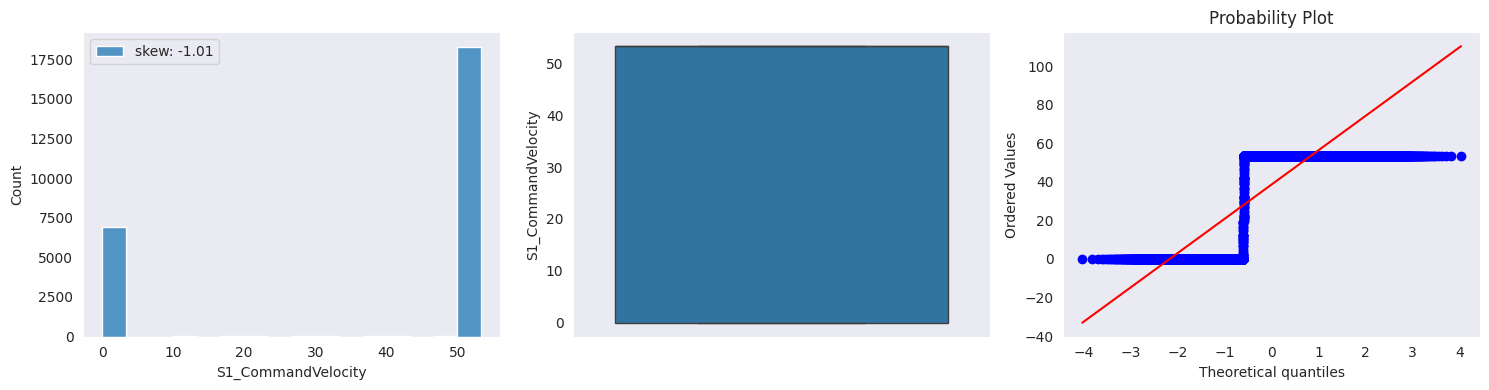

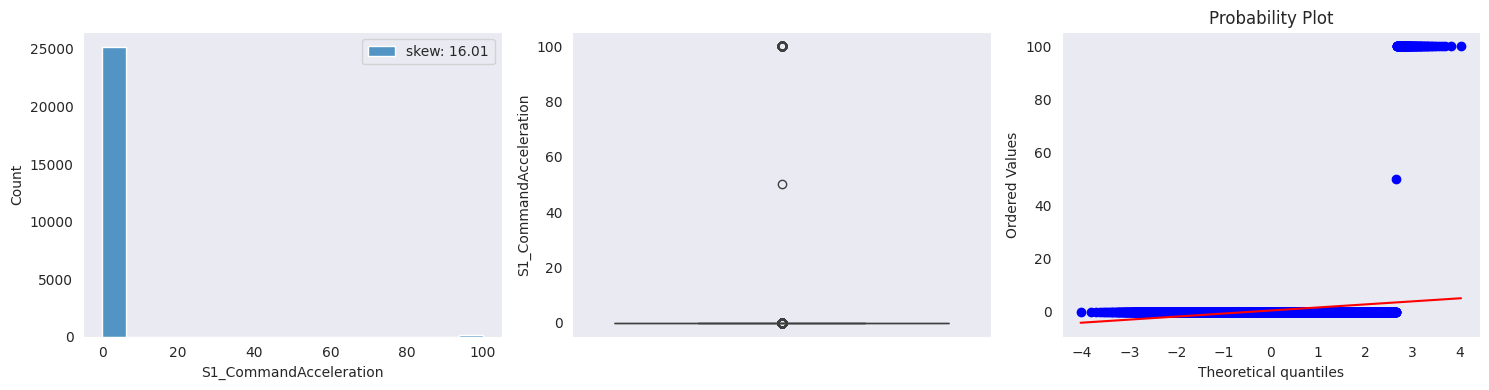

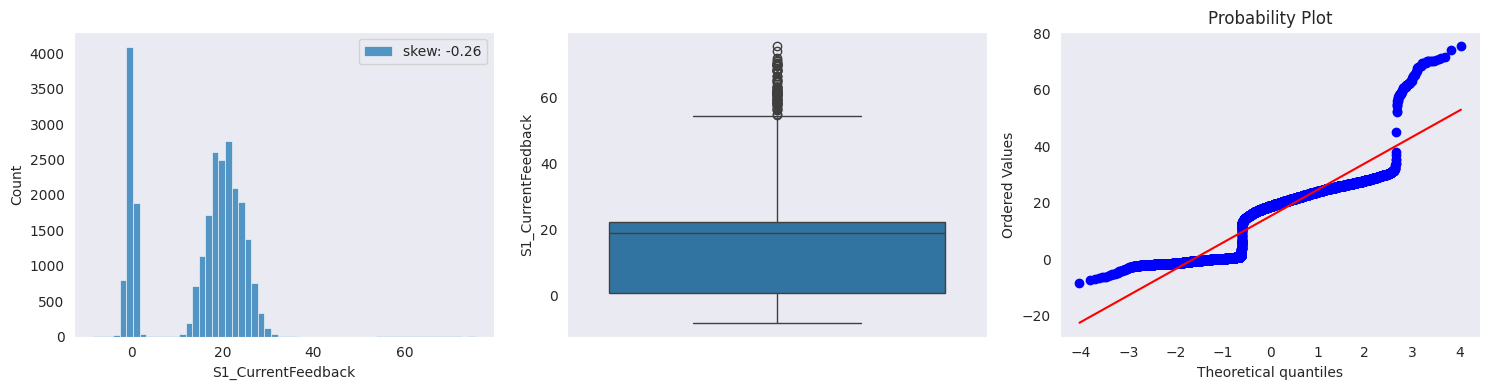

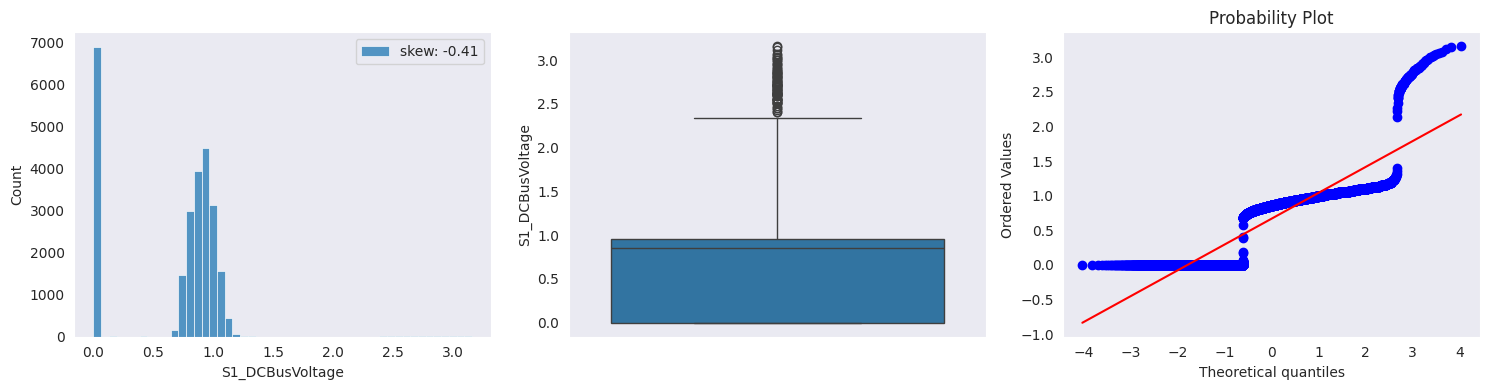

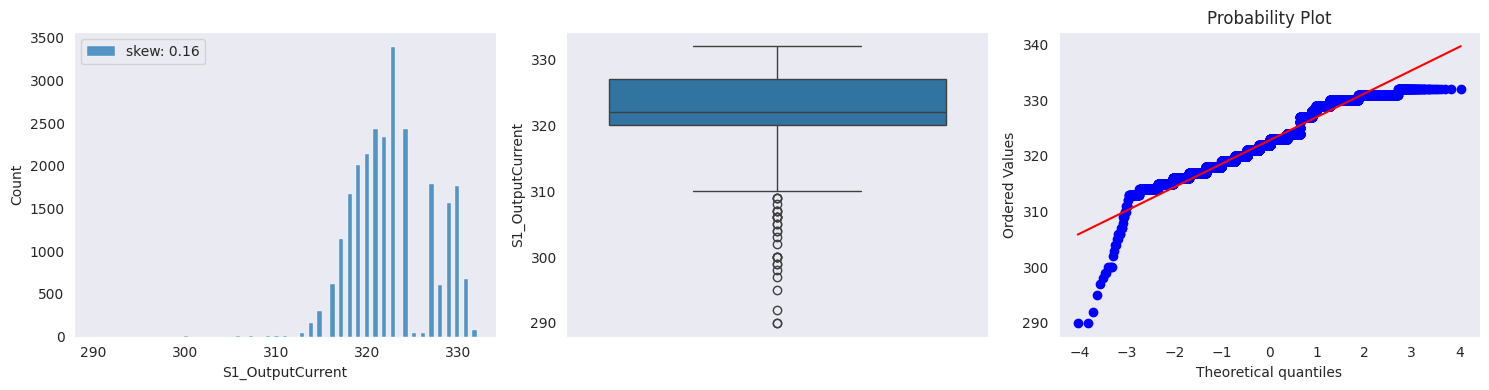

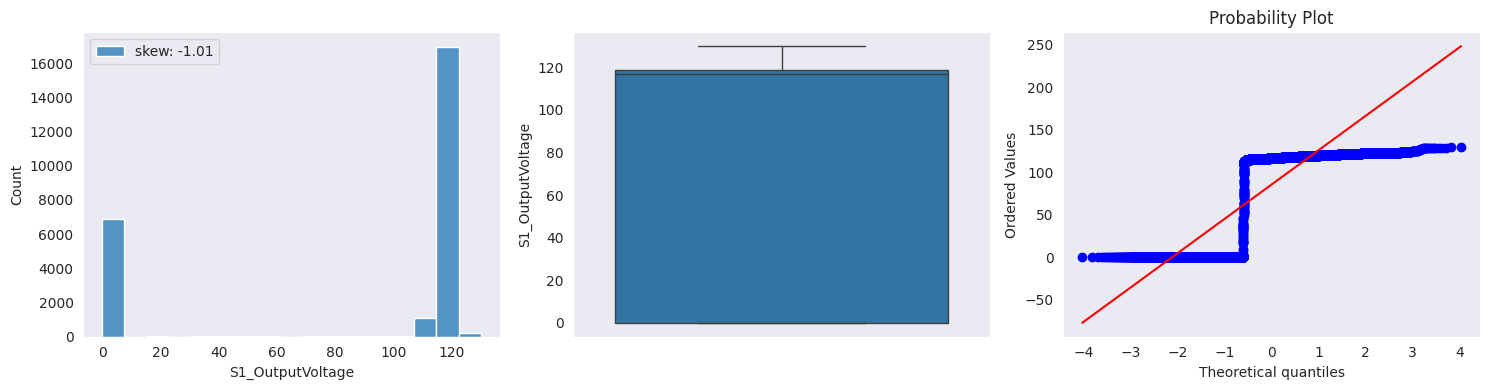

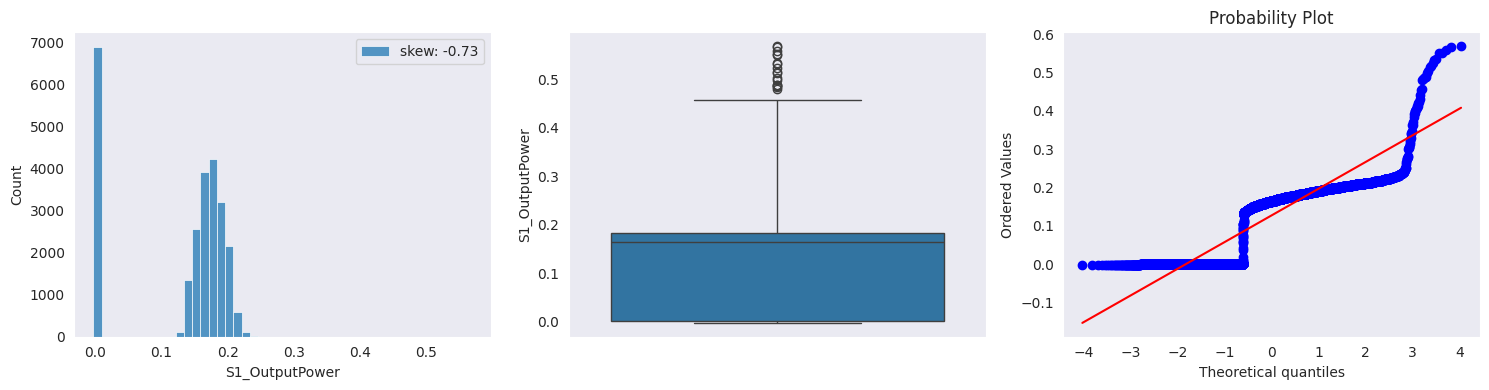

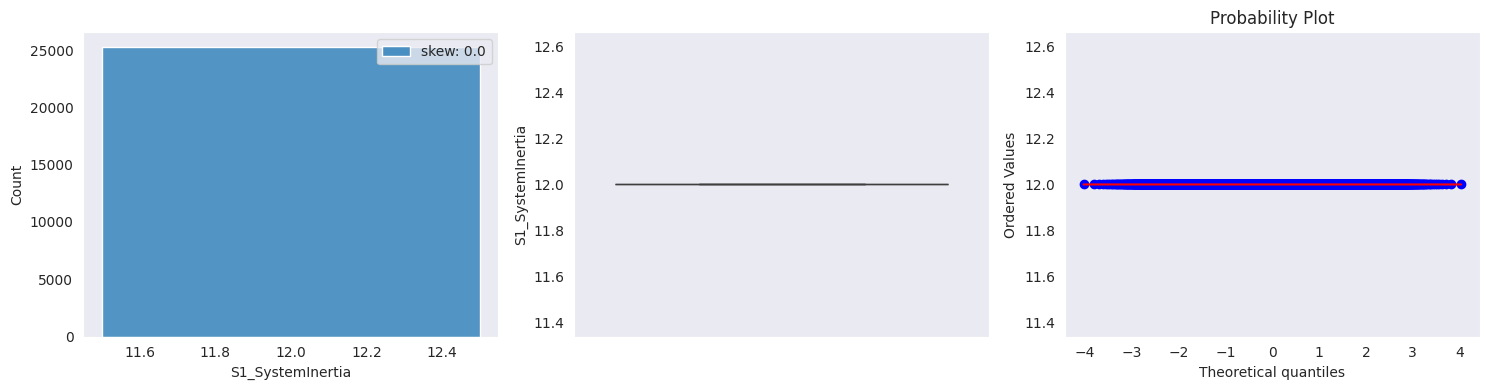

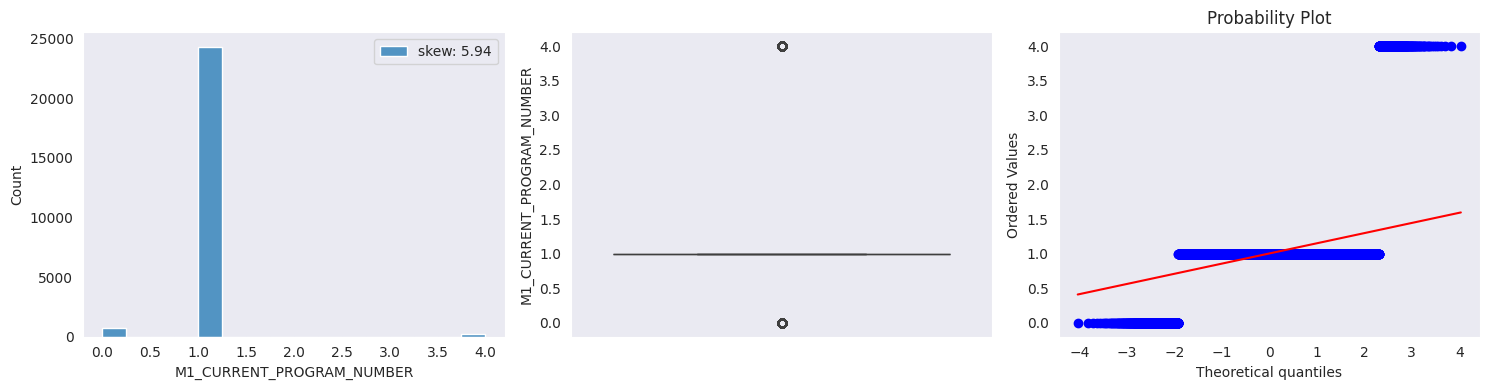

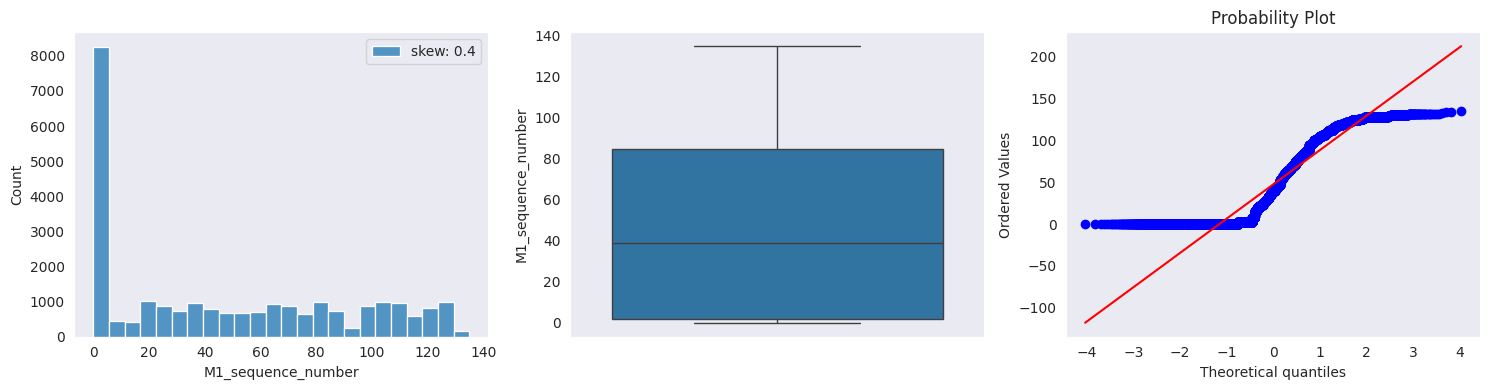

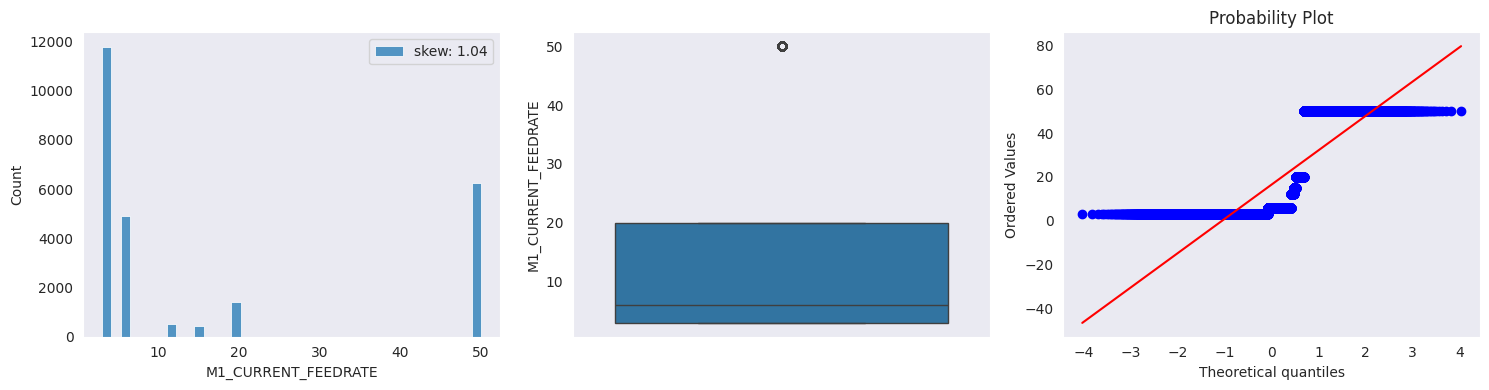

In [11]:
sns.set_style('dark')
for col in features2:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.histplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df2[col])
    plt.subplot(133)
    stats.probplot(df2[col], plot=plt)
    plt.tight_layout()
    plt.show()

**Outlier Capping**



In [12]:
df_cap=df2.copy()

In [13]:
def iqr_capping(df, cols, factor):

    for col in cols:

        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)

        iqr = q3 - q1

        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)

        df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                 np.where(df[col]<lower_whisker, lower_whisker, df[col]))

In [14]:
iqr_capping(df_cap, features2, 1.5)

In [15]:
df_cap

X1_ActualPosition  X1_ActualVelocity  X1_ActualAcceleration  \
0                  187.5              0.000                   0.00   
1                  187.5             -5.425                -115.75   
2                  187.5             -5.425                  -6.25   
3                  187.5             -5.425                   0.00   
4                  187.5             -5.425                 -18.80   
...                  ...                ...                    ...   
25281              144.0             -2.300                 100.00   
25282              144.0             -2.470                  25.00   
25283              143.0             -2.200                  81.20   
25284              143.0             -2.050                  68.70   
25285              143.0             -2.150                 -68.70   

       X1_CommandPosition  X1_CommandVelocity  X1_CommandAcceleration  \
0                   187.5               0.000                     0.0   
1                   187.5              -5.125                     0.0   
2                   187.5              -5.125                     0.0   
3                   187.5              -5.125                     0.0   
4                   187.5              -5.125                     0.0   
...                   ...                 ...                     ...   
25281               144.0              -2.570                     0.0   
25282               144.0              -2.460                     0.0   
25283               143.0              -2.350                     0.0   
25284               143.0              -2.230                     0.0   
25285               143.0              -2.090                     0.0   

       X1_CurrentFeedback  X1_DCBusVoltage  X1_OutputCurrent  \
0                    0.18           0.0207             328.5   
1                  -10.90           0.1660             328.0   
2                   -8.59           0.1400             328.0   
3                   -6.11           0.1300             327.0   
4                   -5.70           0.1140             328.0   
...                   ...              ...               ...   
25281               -5.05           0.0732             327.0   
25282               -5.62           0.0996             327.0   
25283               -4.42           0.0539             327.0   
25284               -5.83           0.0809             327.0   
25285               -4.37           0.0857             327.0   

       X1_OutputVoltage  ...  S1_CommandAcceleration  S1_CurrentFeedback  \
0                 2.770  ...                     0.0               0.524   
1                21.615  ...                     0.0              -0.288   
2                21.615  ...                     0.0               0.524   
3                21.615  ...                     0.0              -0.180   
4                21.615  ...                     0.0               0.226   
...                 ...  ...                     ...                 ...   
25281             9.560  ...                     0.0              20.000   
25282            10.300  ...                     0.0              18.800   
25283             7.790  ...                     0.0              24.400   
25284             8.320  ...                     0.0              21.600   
25285             8.010  ...                     0.0              18.800   

       S1_DCBusVoltage  S1_OutputCurrent  S1_OutputVoltage  S1_OutputPower  \
0         2.740000e-19             329.0               0.0    6.960000e-07   
1         2.740000e-19             328.0               0.0   -5.270000e-07   
2         2.740000e-19             328.0               0.0    9.100000e-07   
3         2.740000e-19             328.0               0.0    1.070000e-06   
4         2.740000e-19             328.0               0.0    1.960000e-06   
...                ...               ...               ...             ...   
25281     8.260000e-01             323.0             118.0   

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))


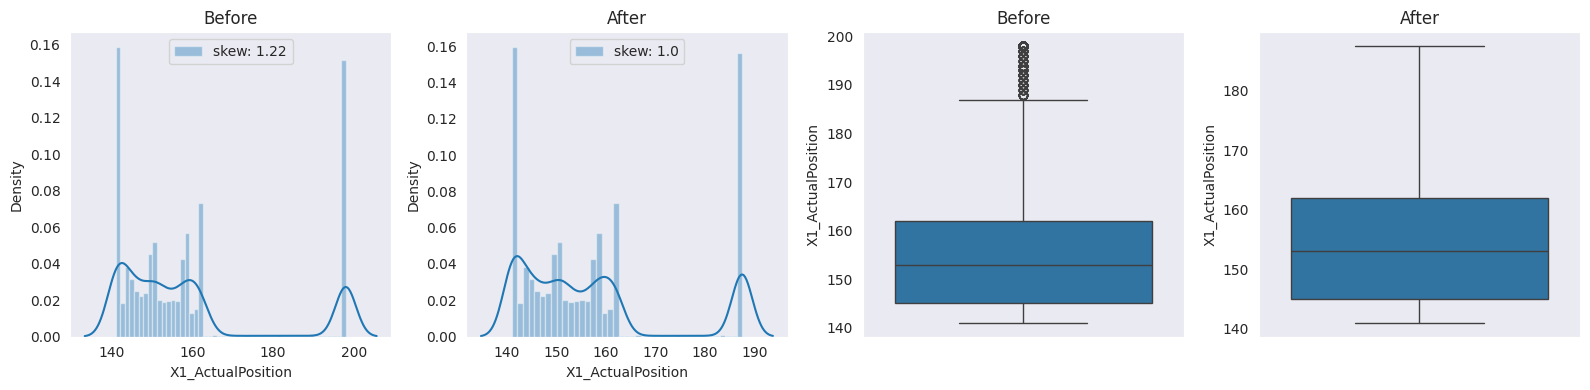

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))


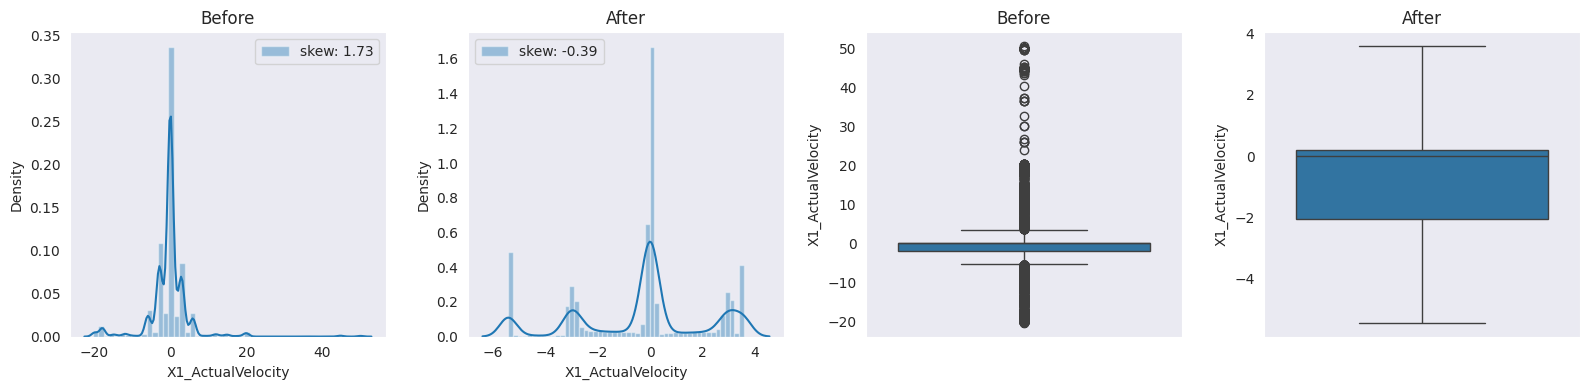

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))


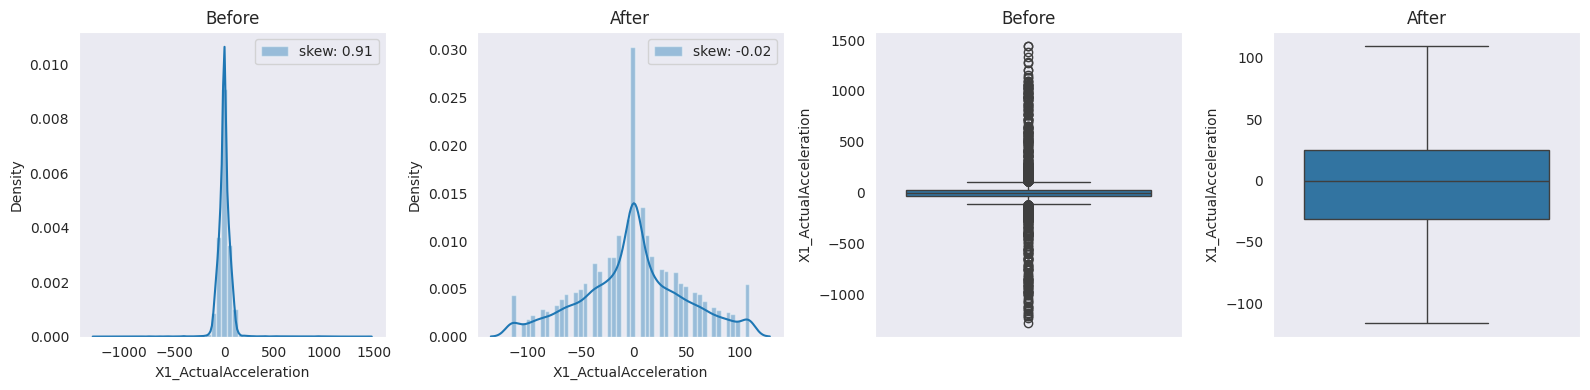

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))


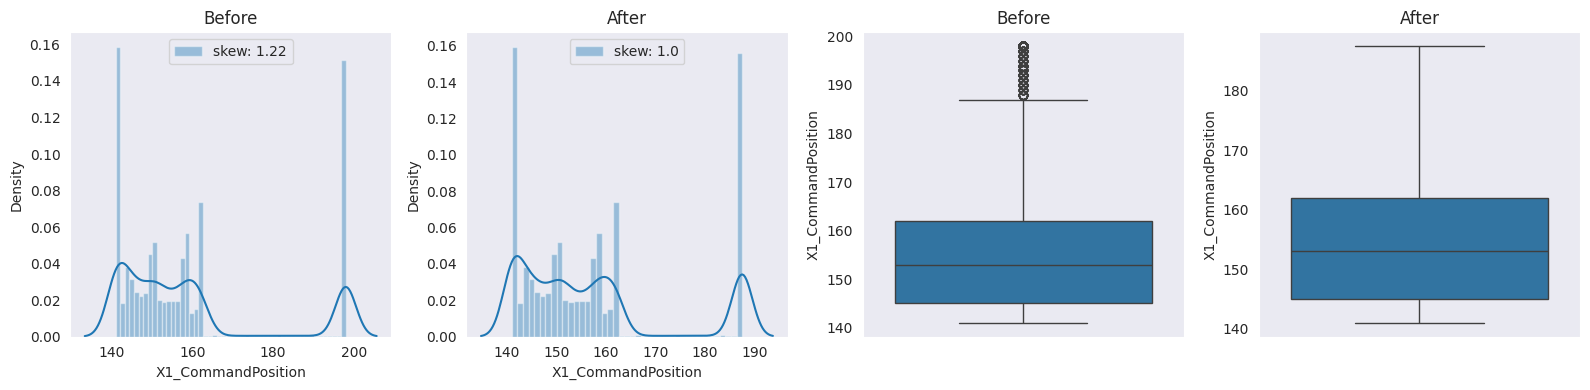

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))


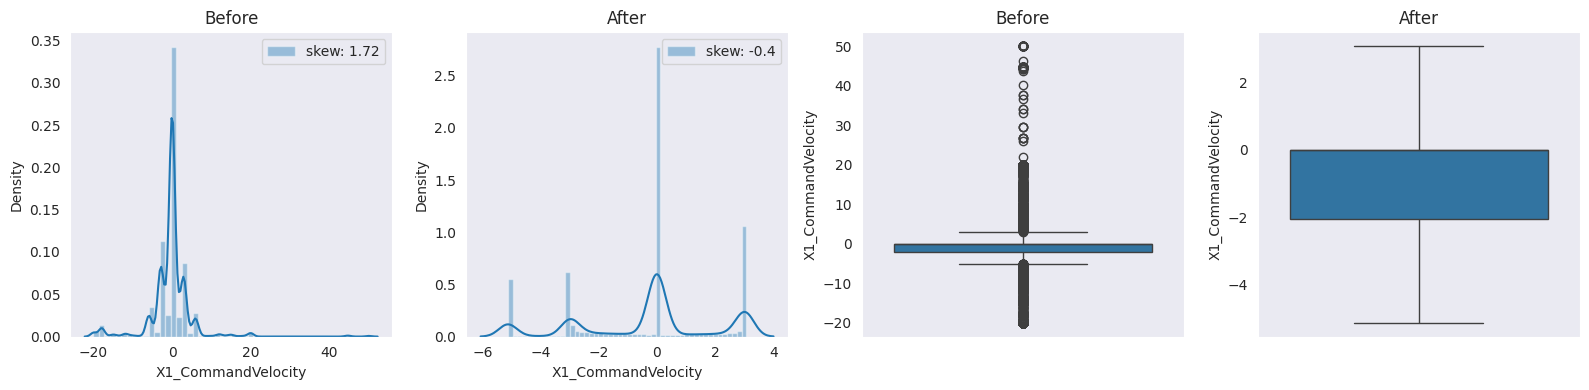

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))
/usr/

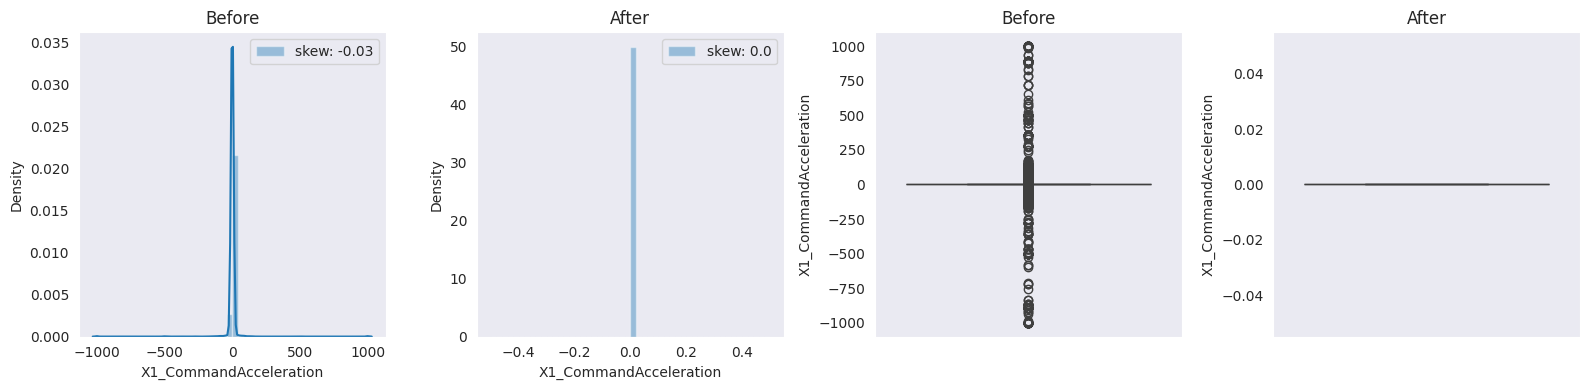

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))


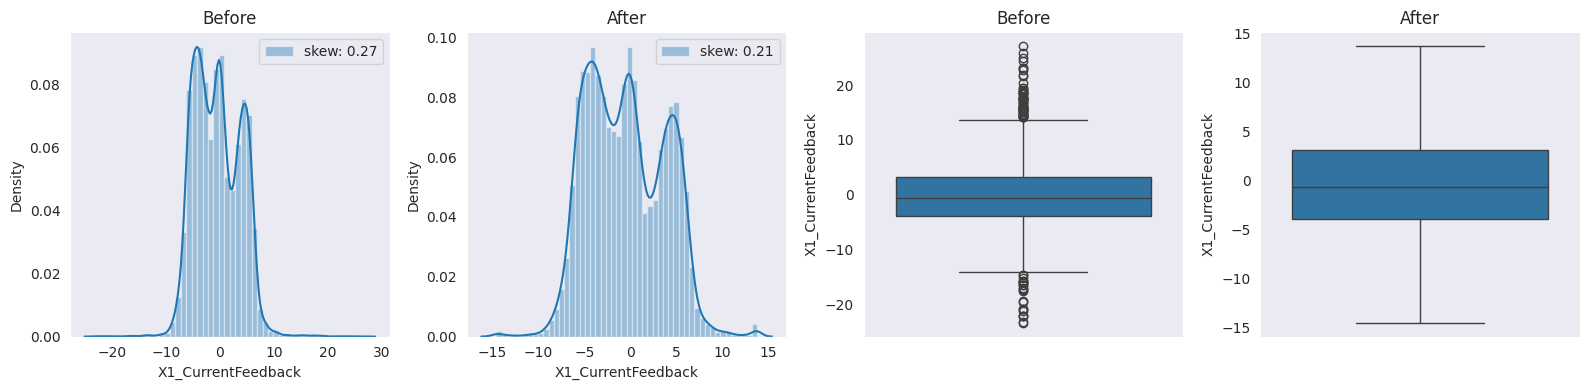

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))


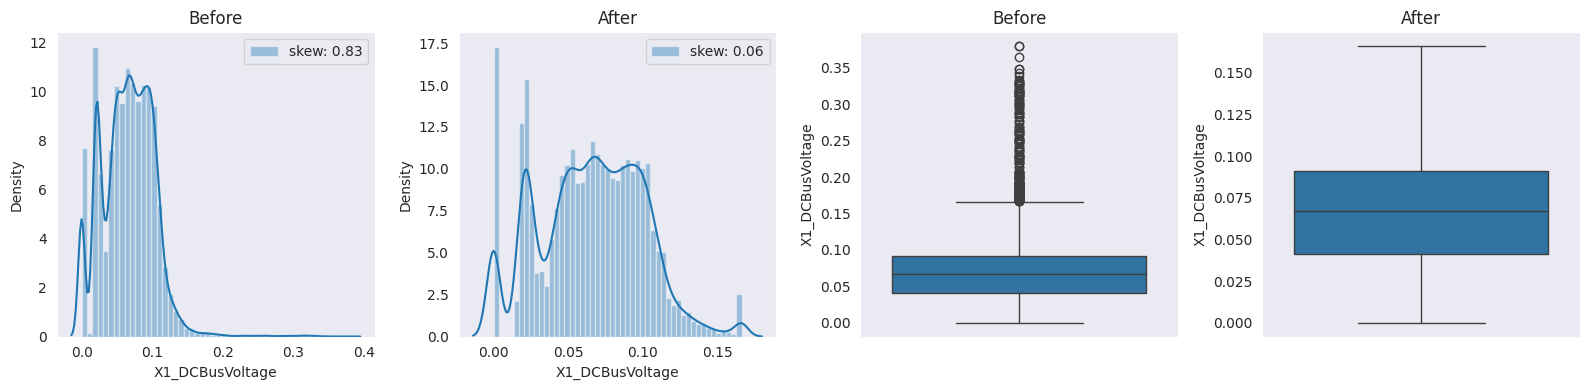

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))


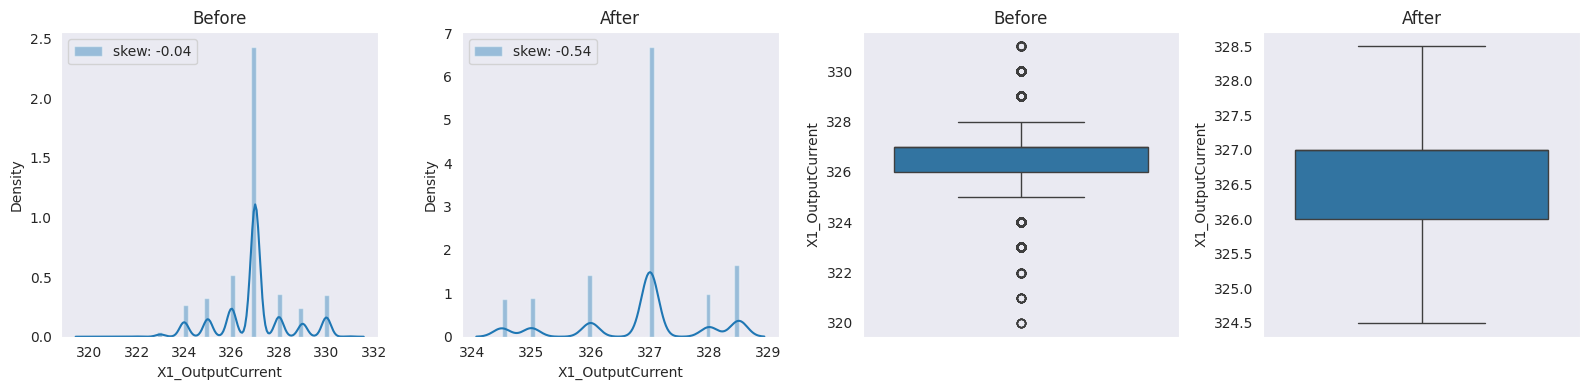

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))


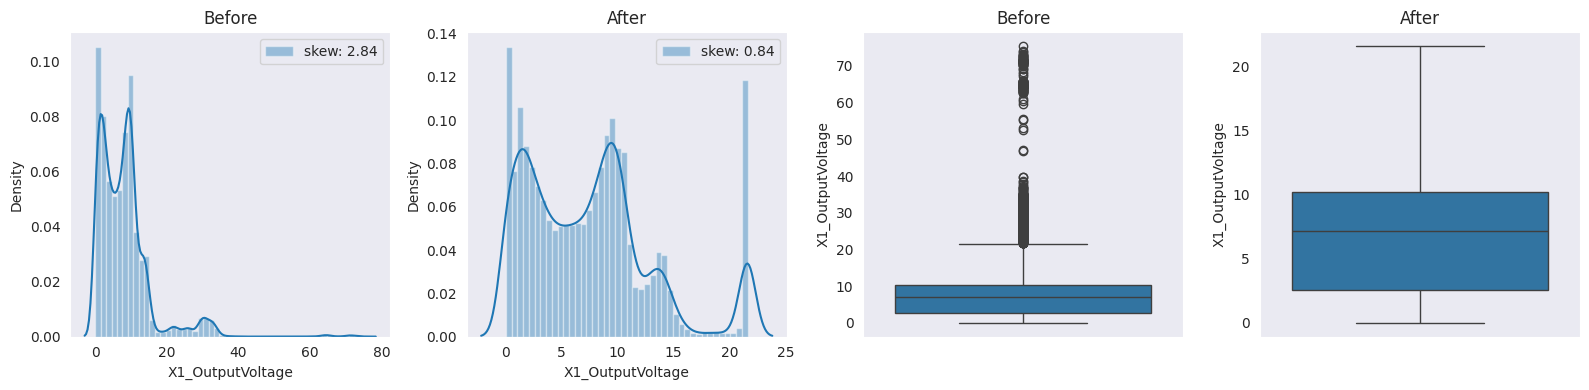

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))


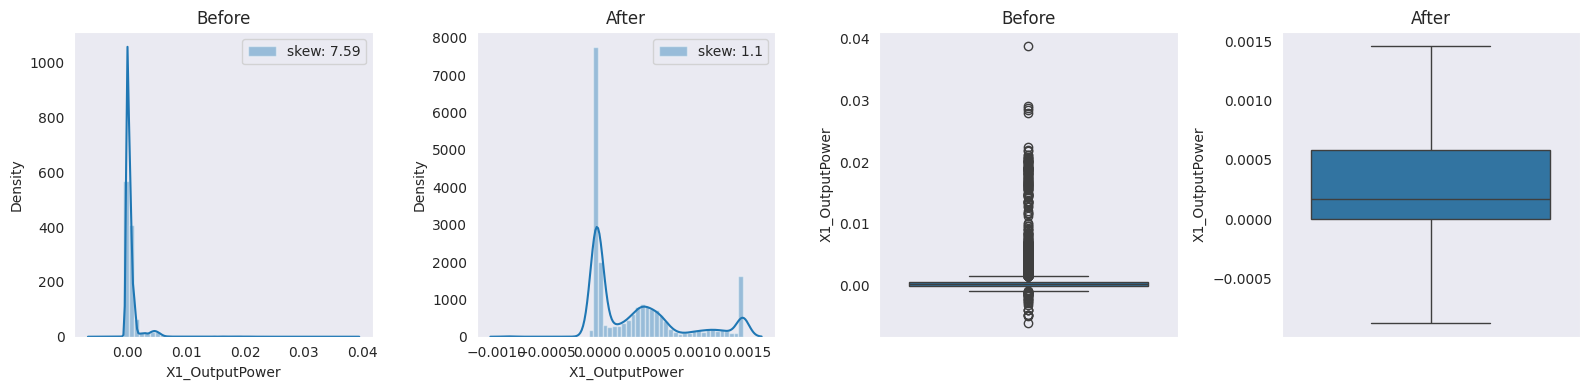

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))


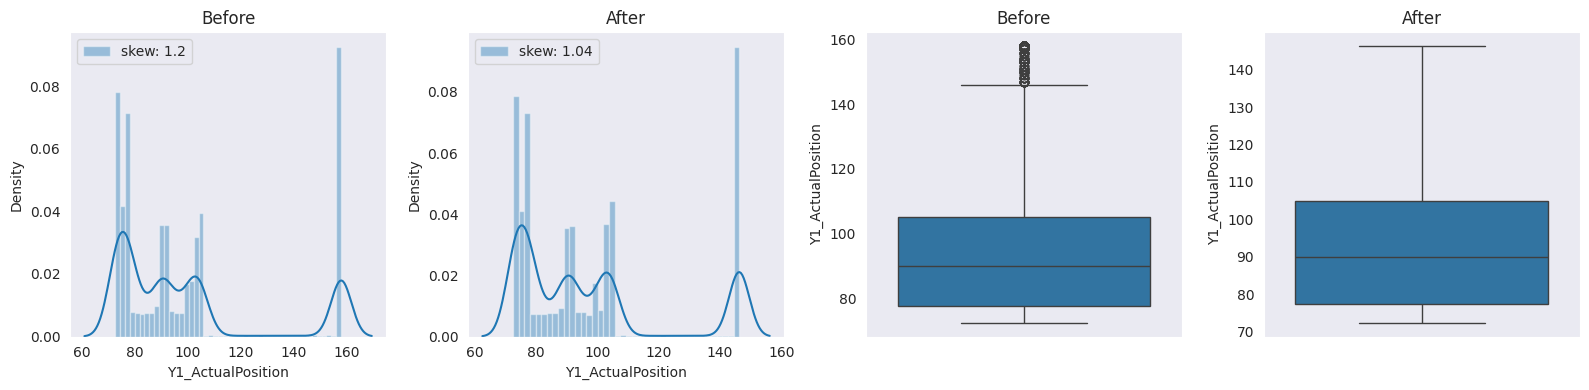

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))


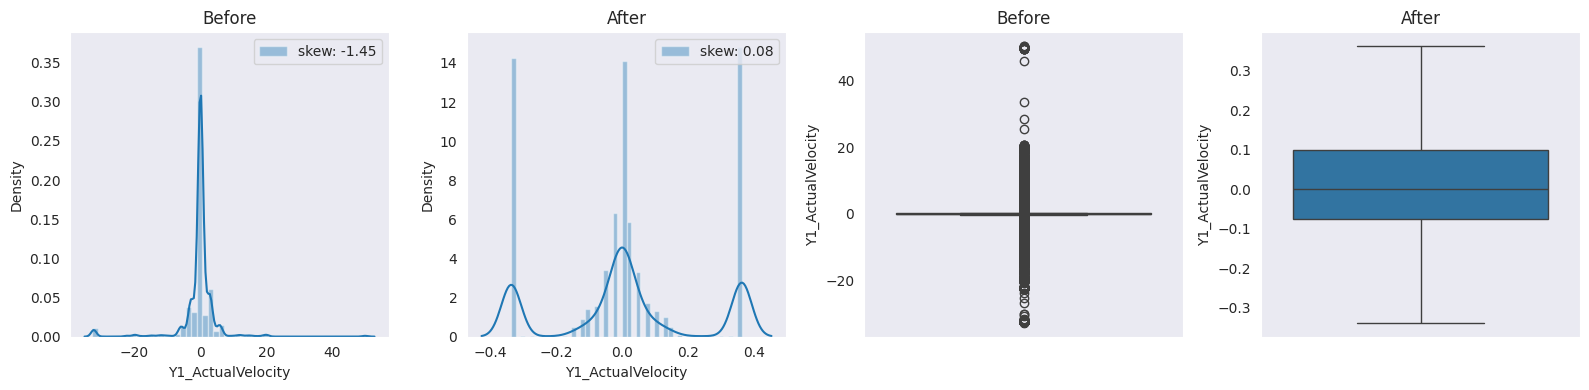

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))


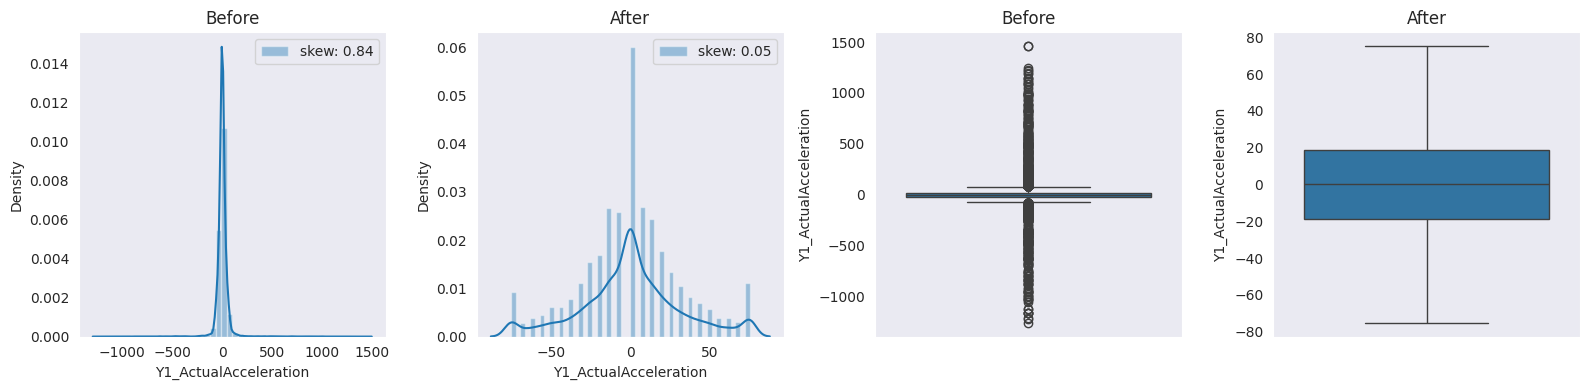

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))


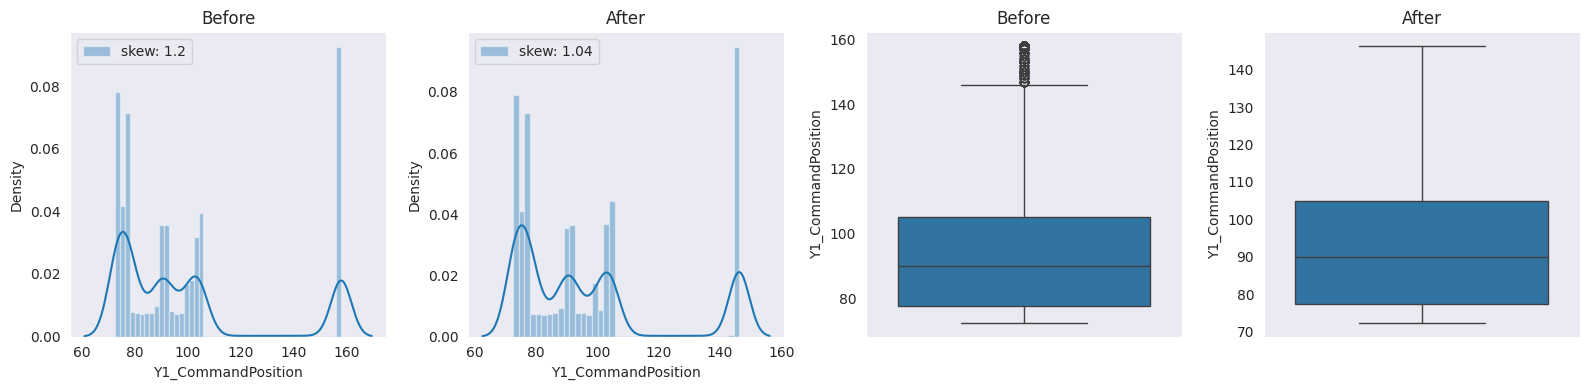

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))
/usr/

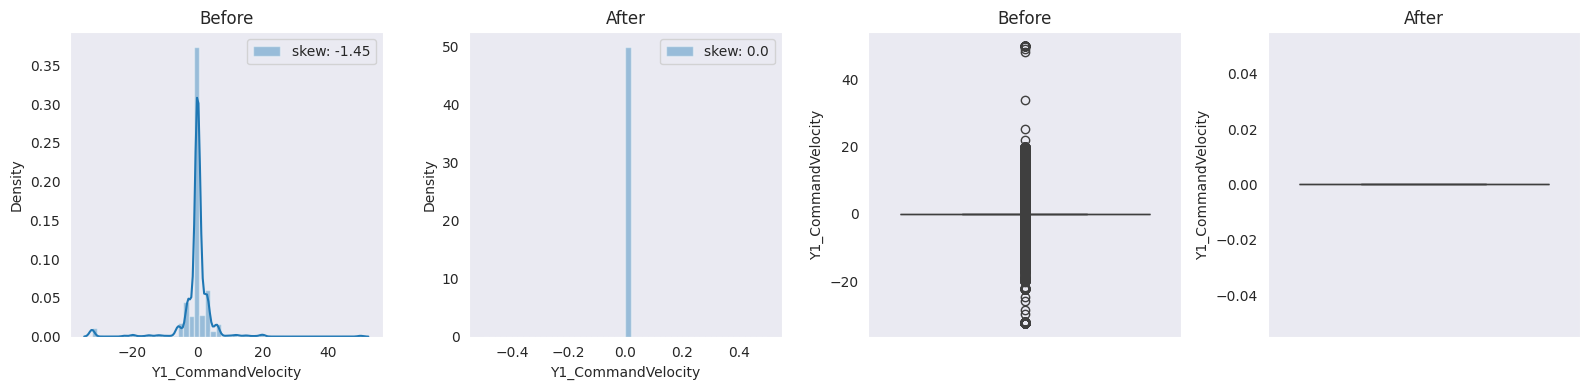

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))
/usr/

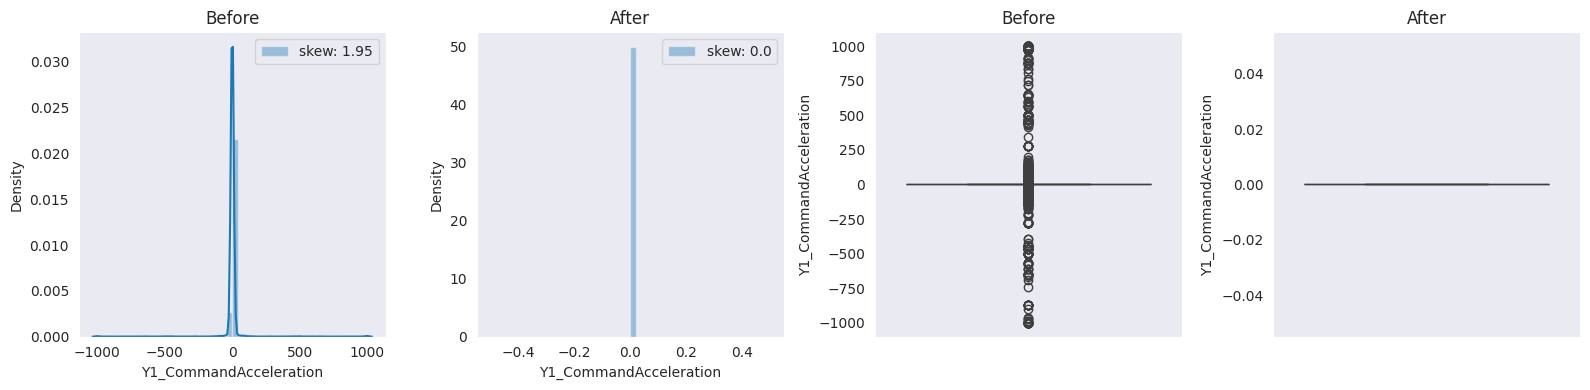

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))


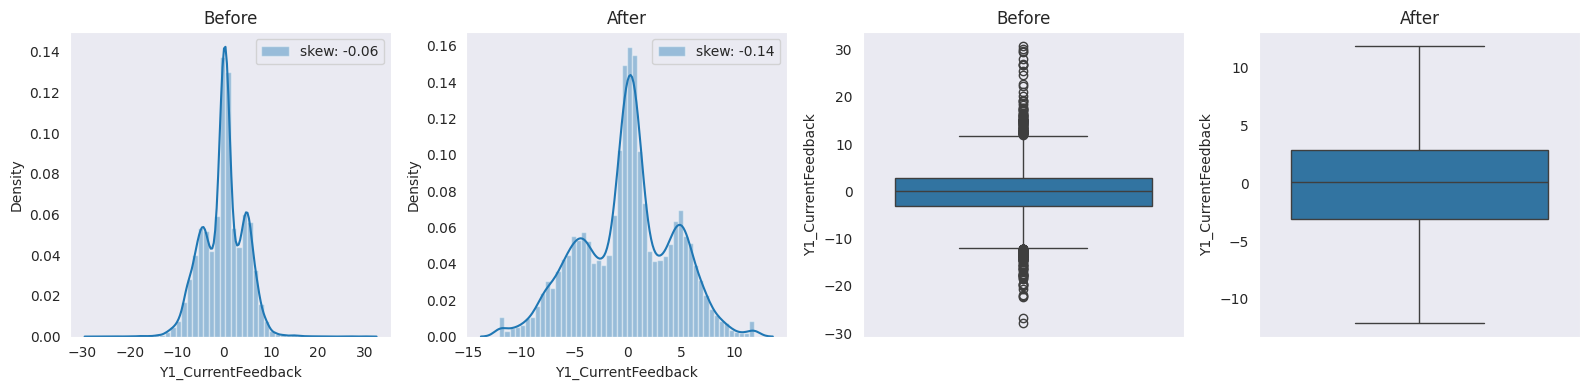

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))


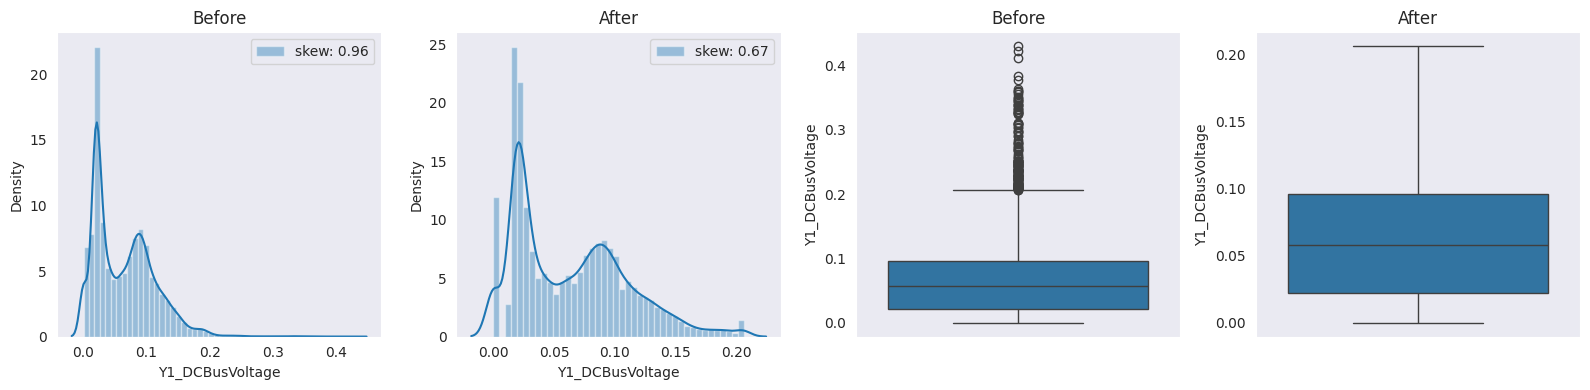

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))


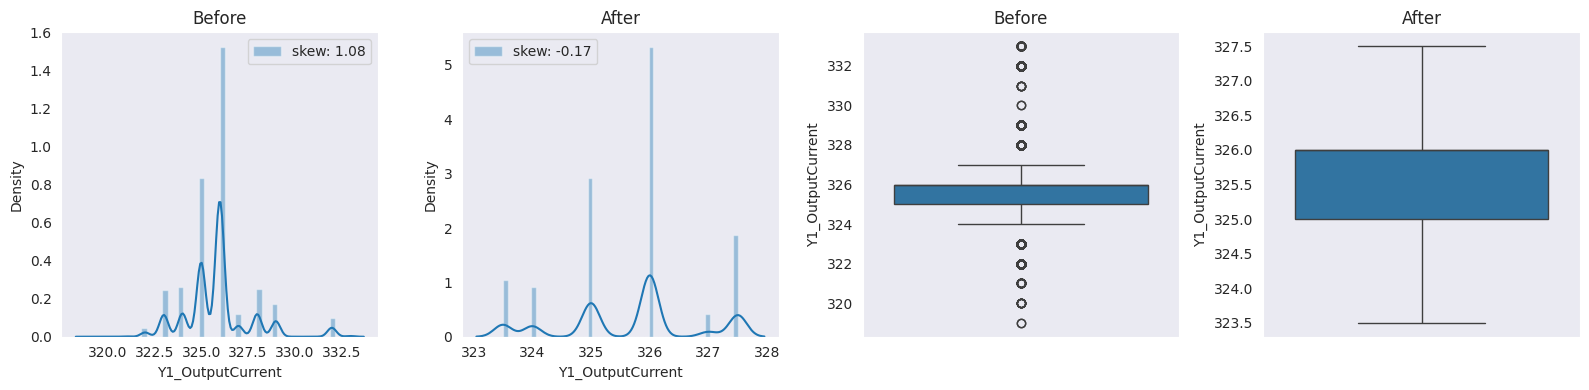

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))


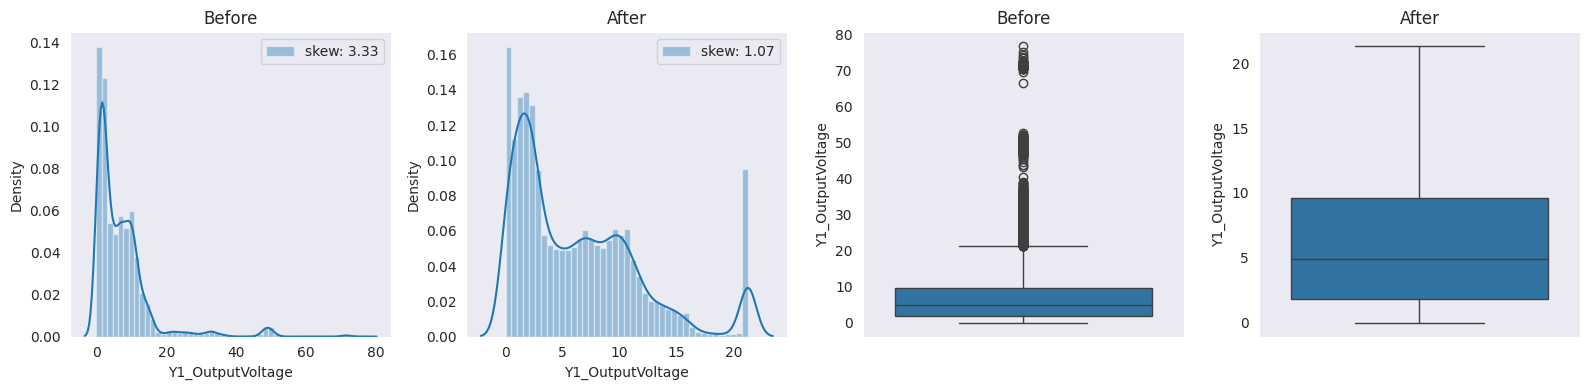

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))


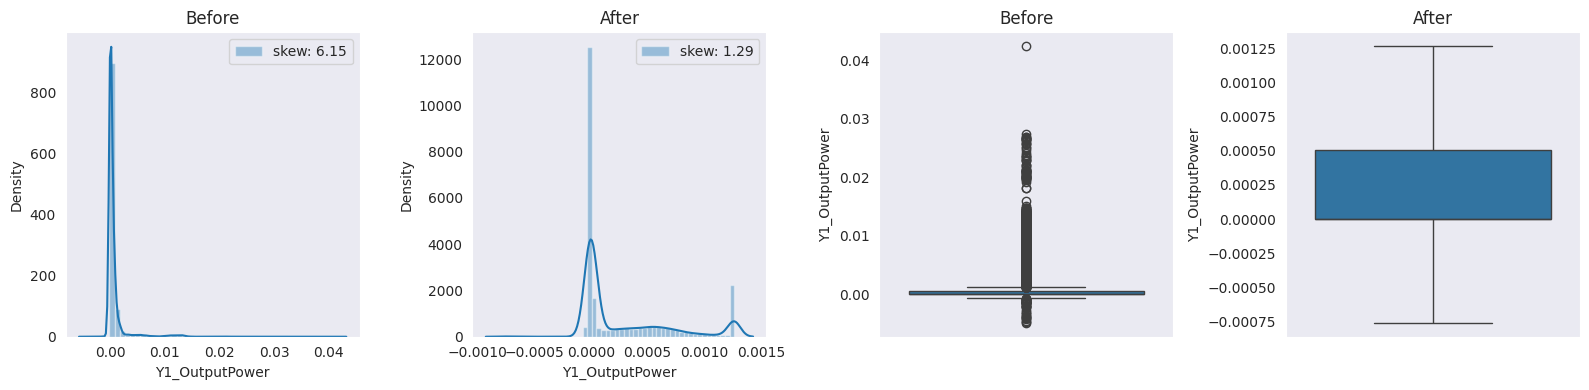

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))


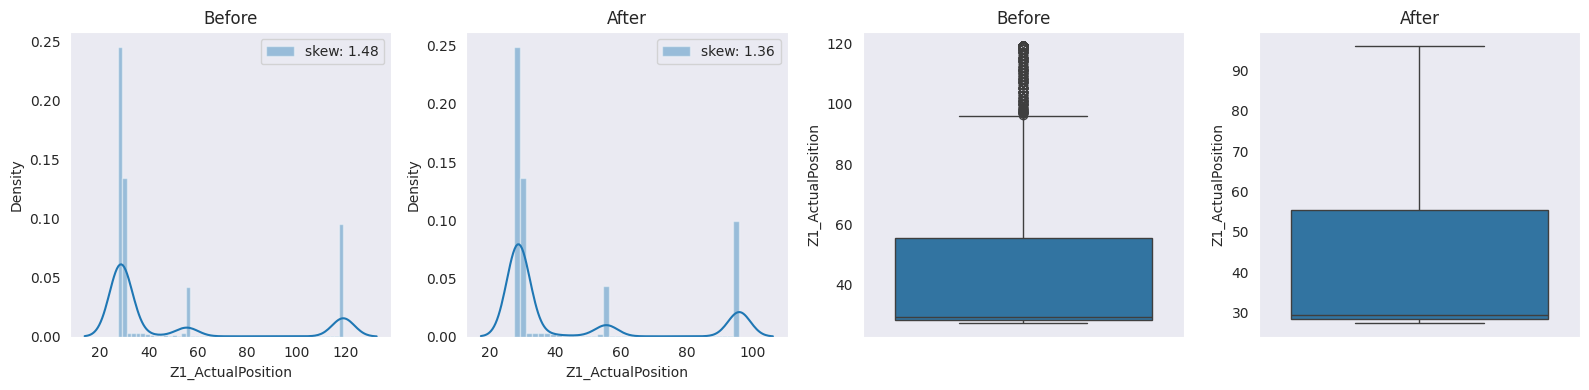

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))
/usr/

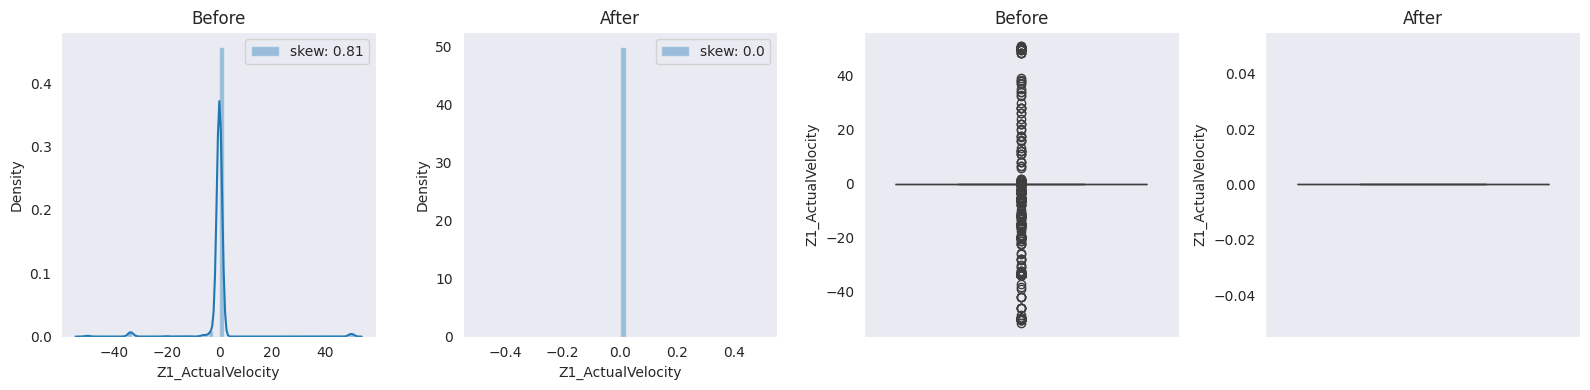

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))


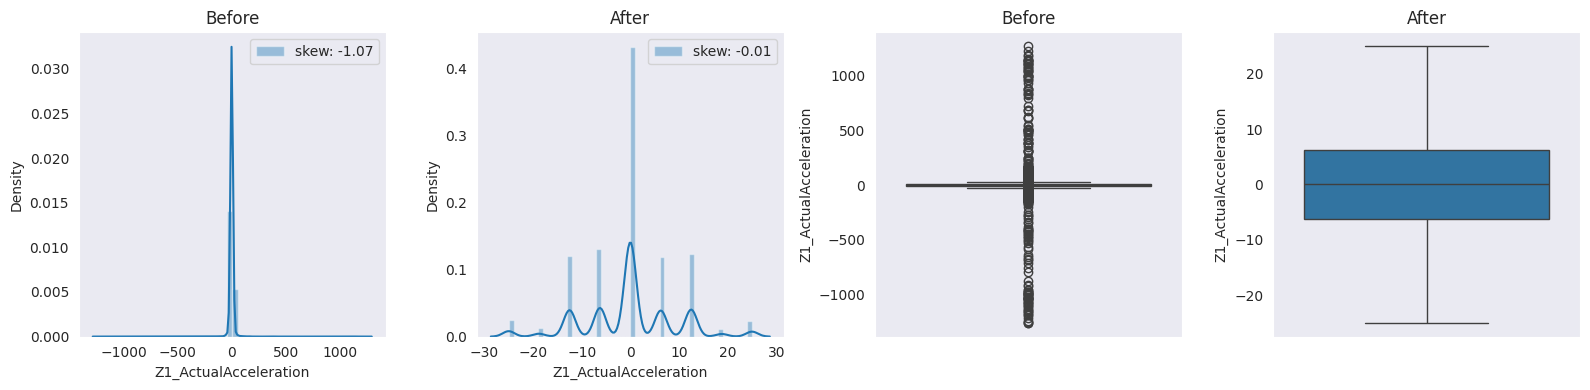

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))


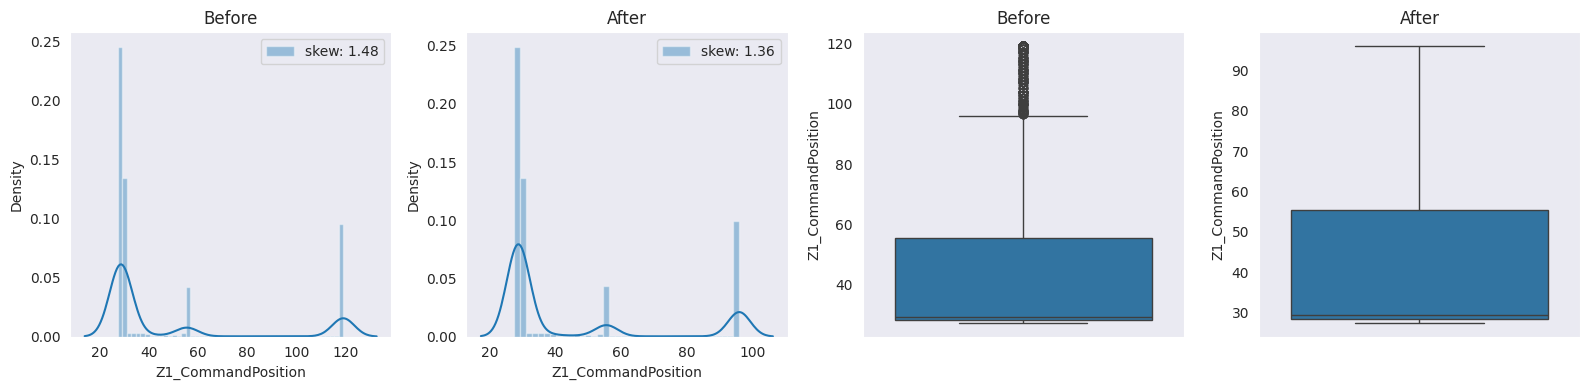

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))
/usr/

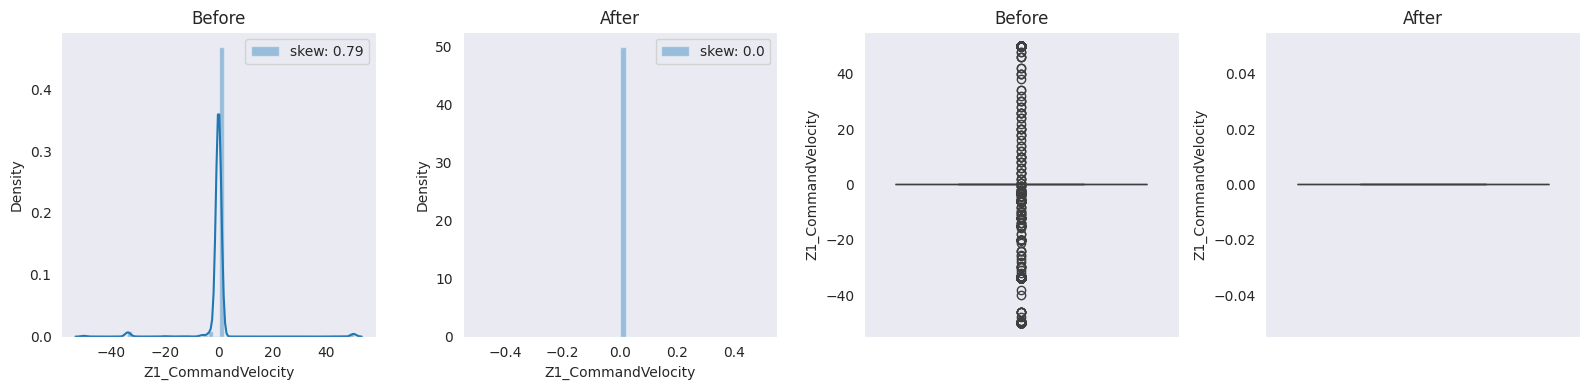

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))
/usr/

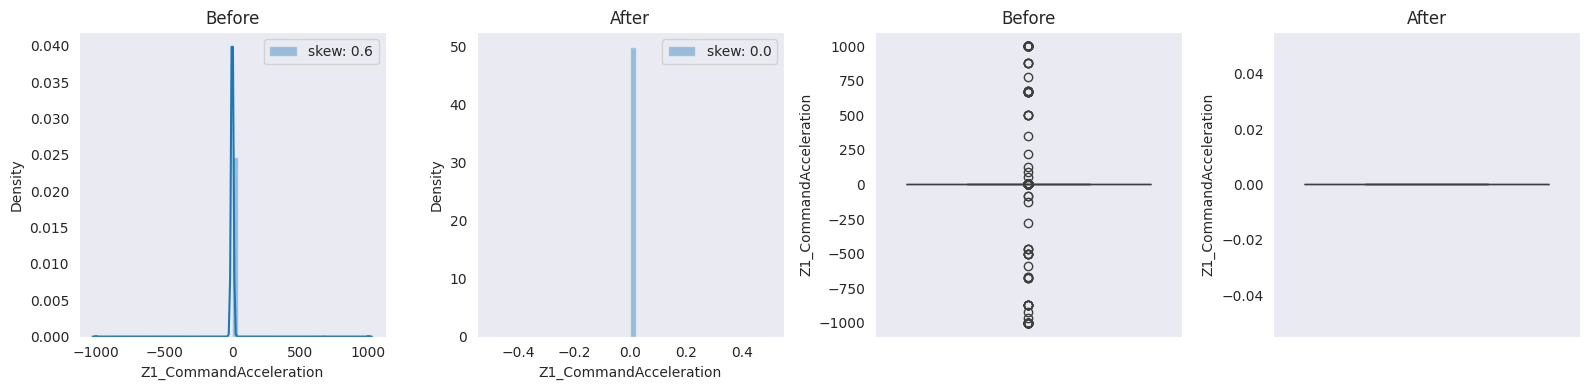

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level functi

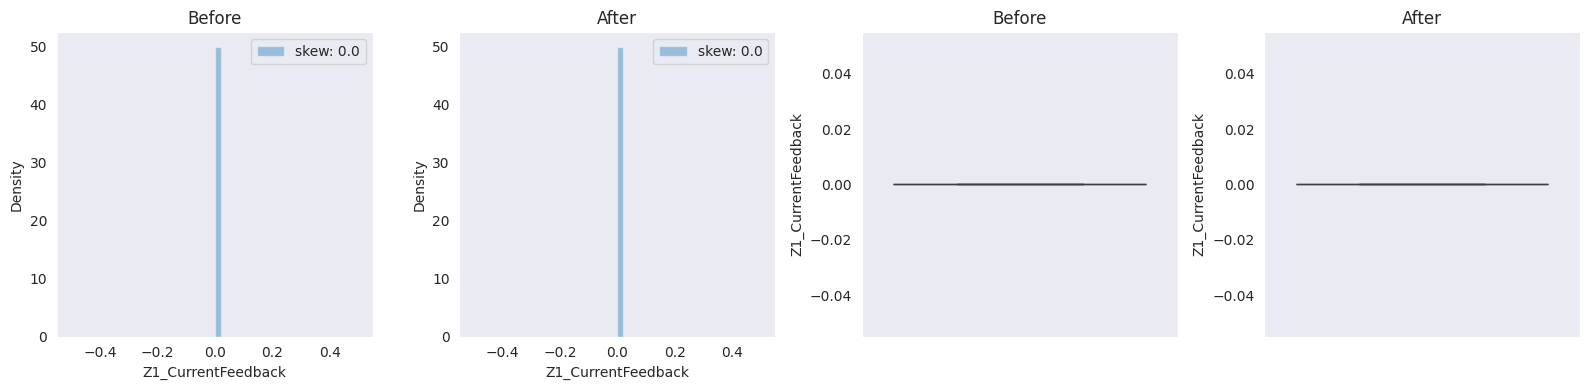

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level functi

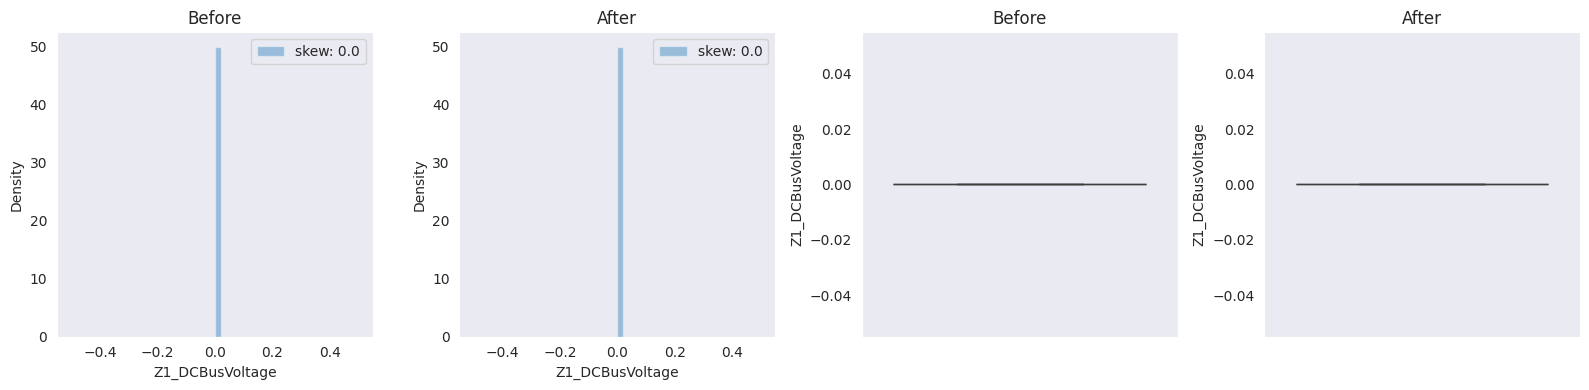

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level functi

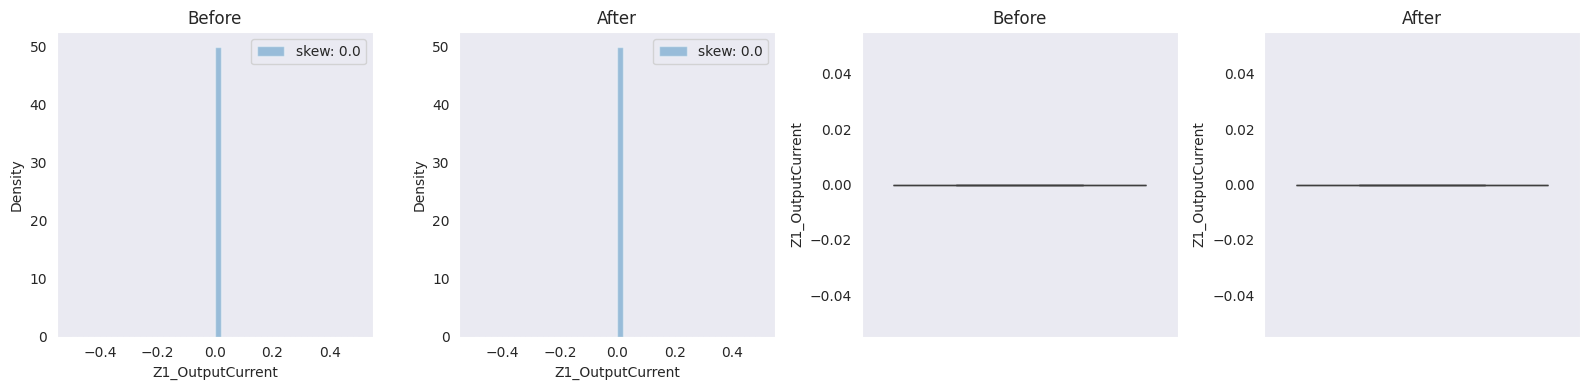

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level functi

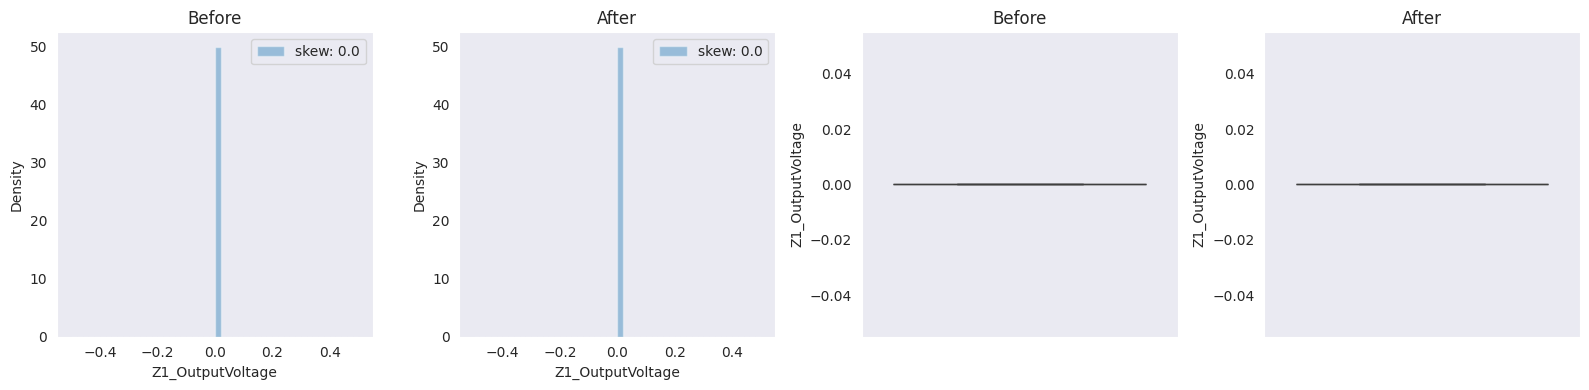

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))


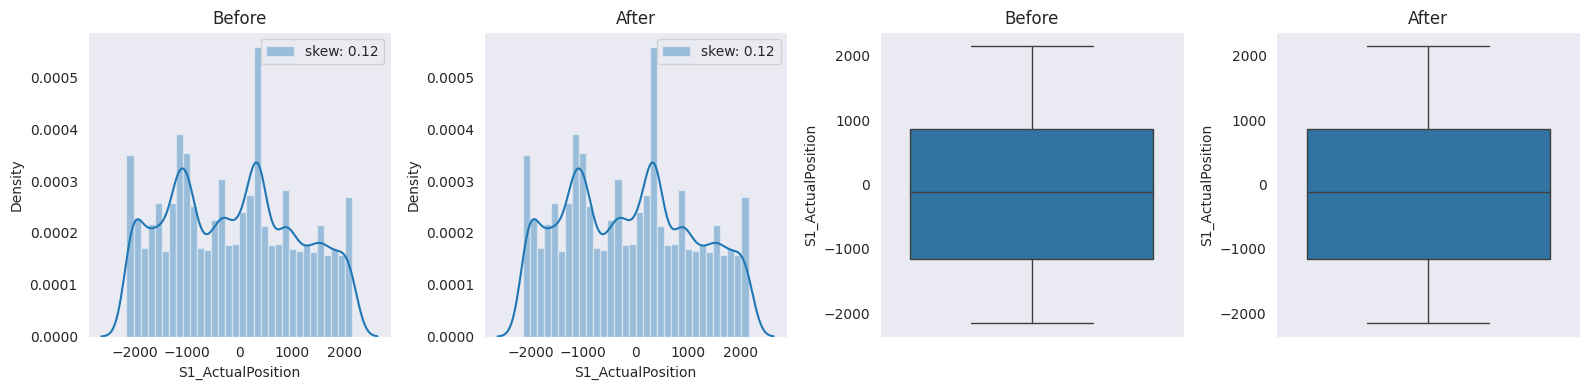

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))


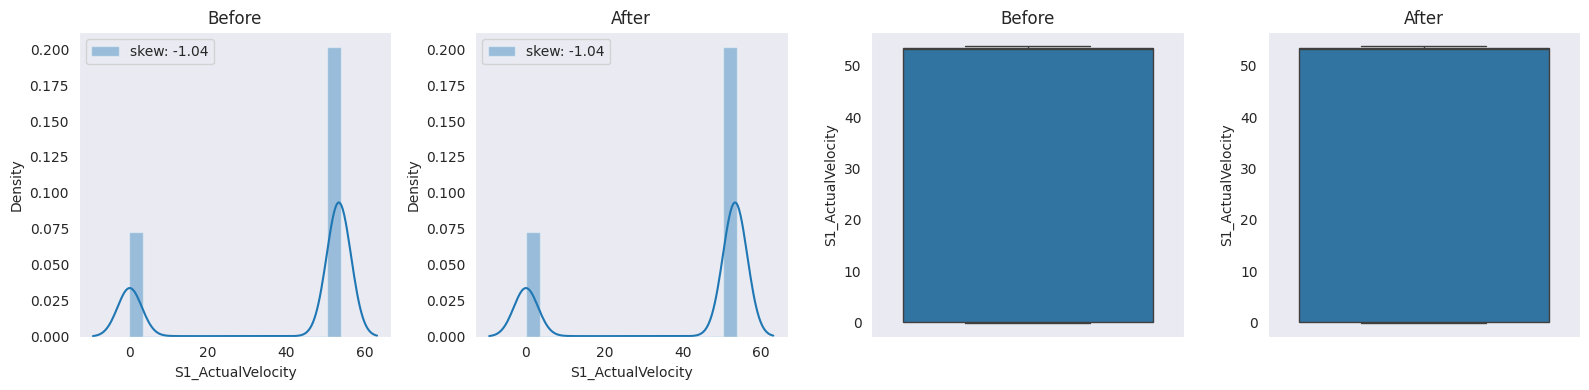

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))


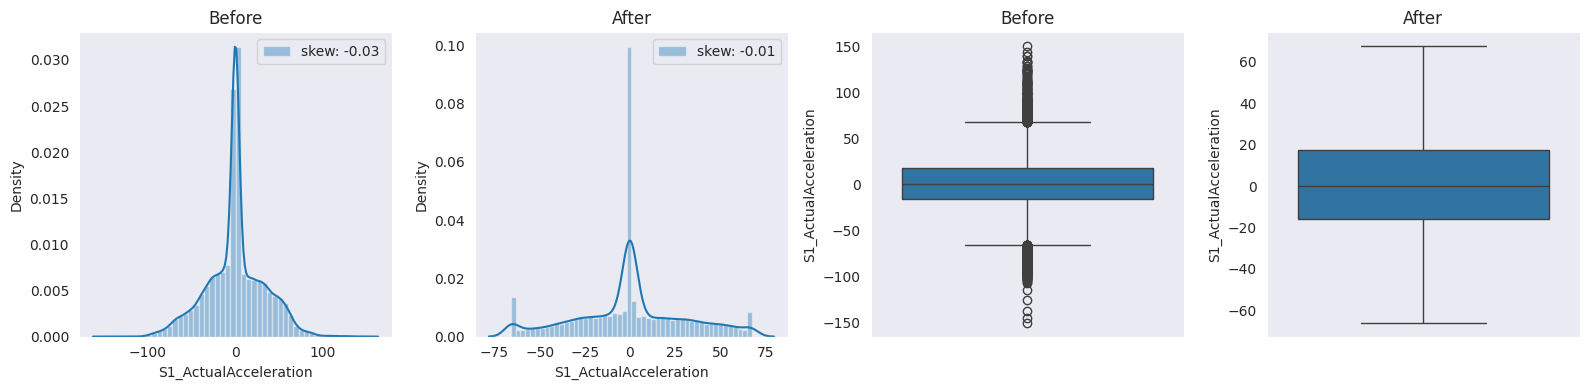

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))


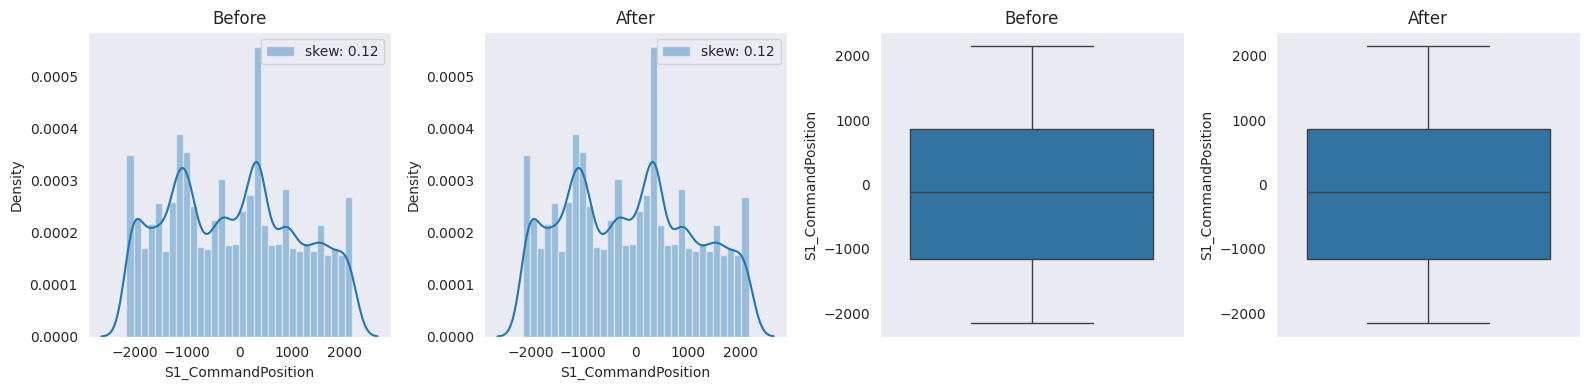

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))


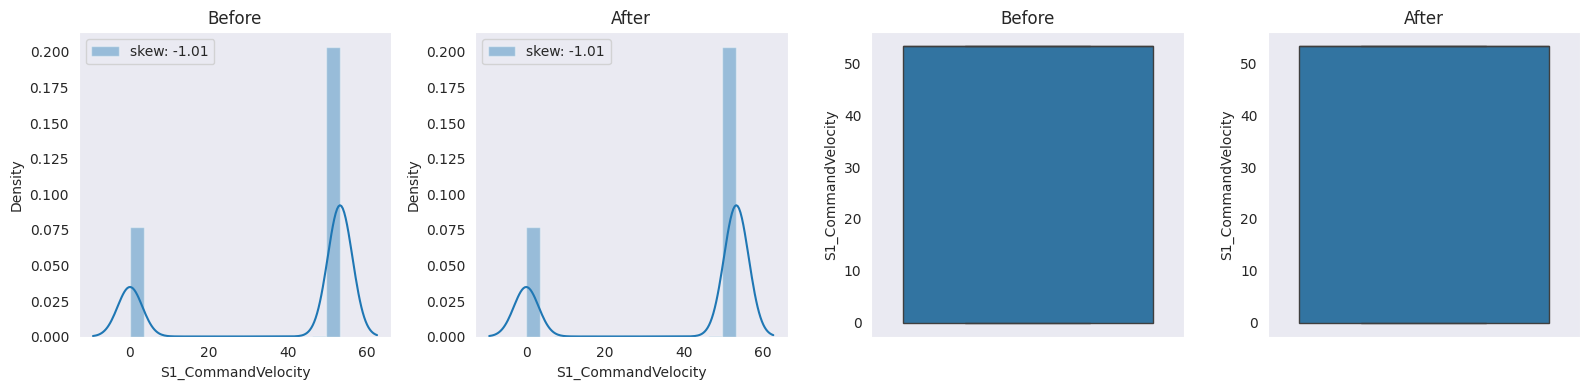

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))
/usr/

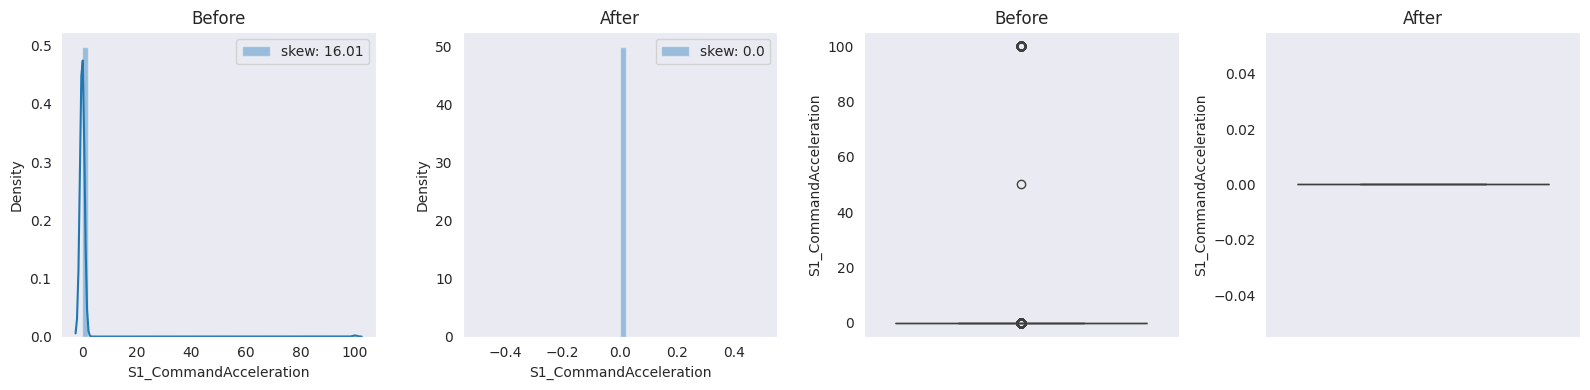

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))


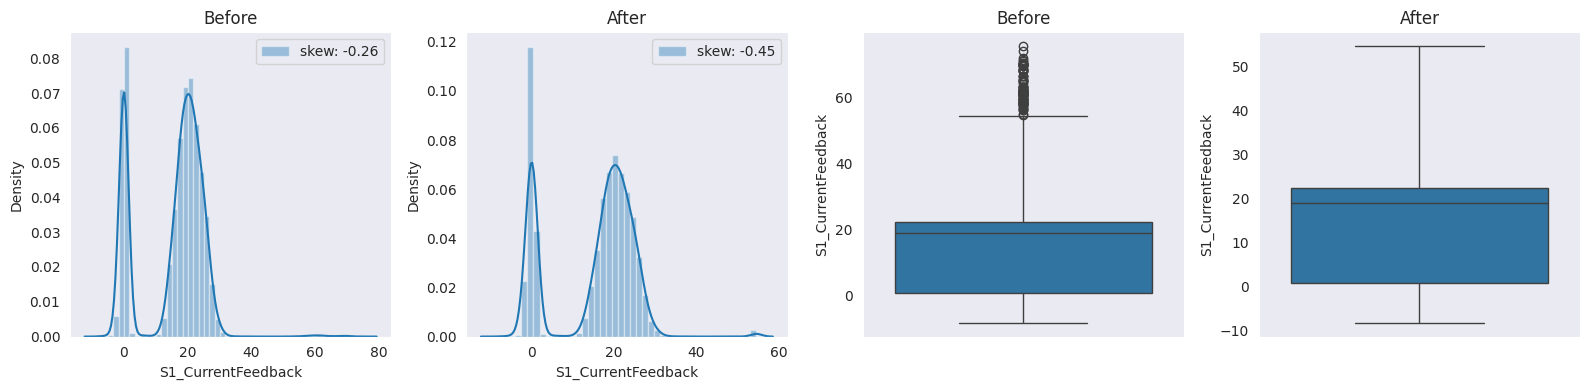

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))


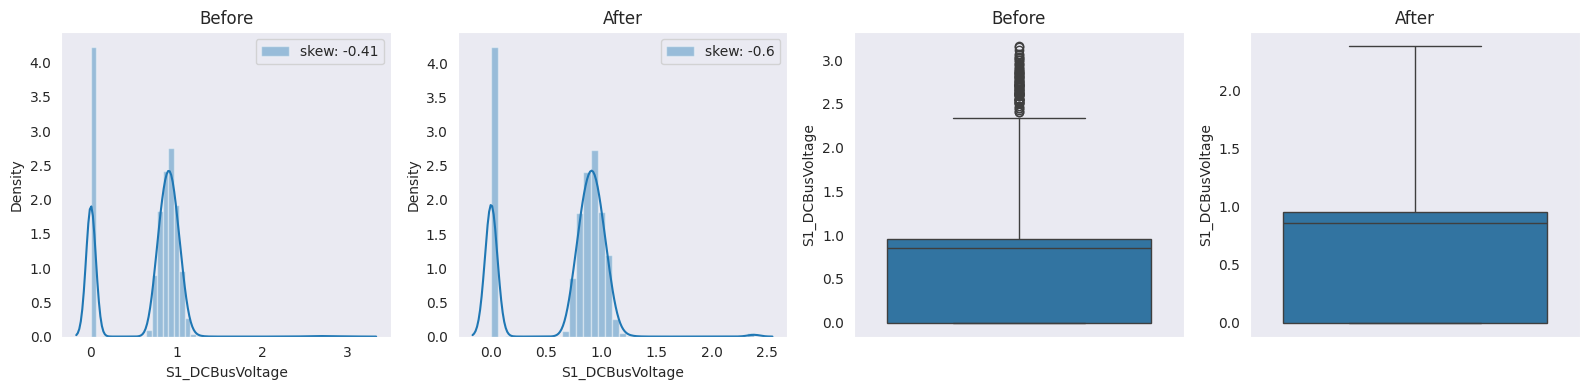

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))


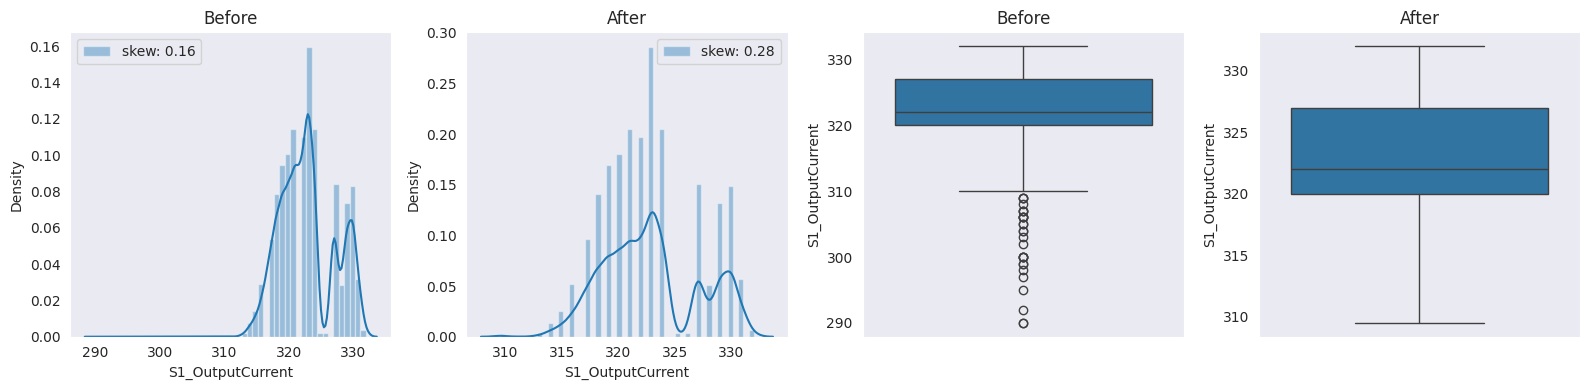

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))


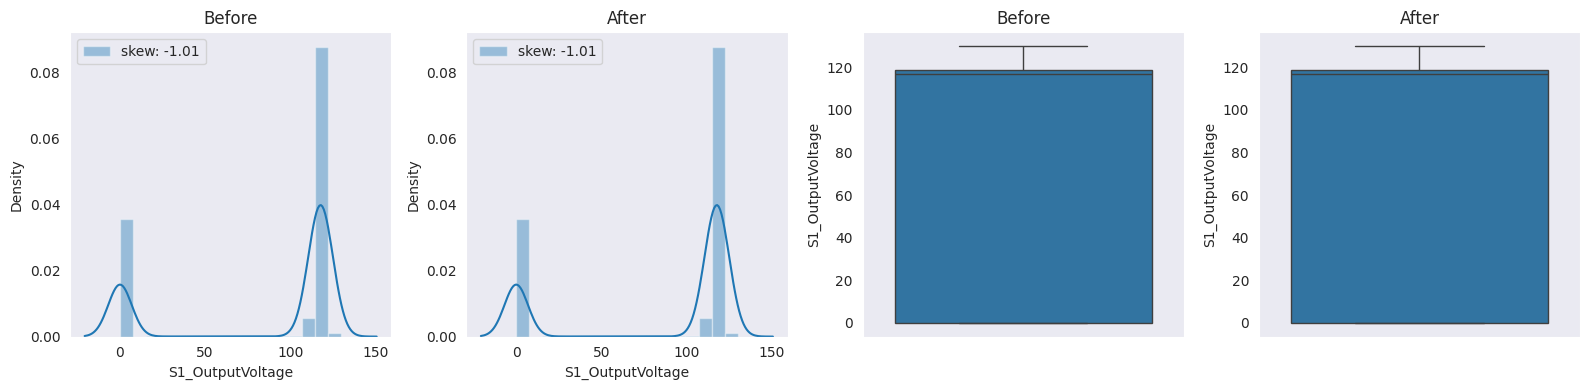

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))


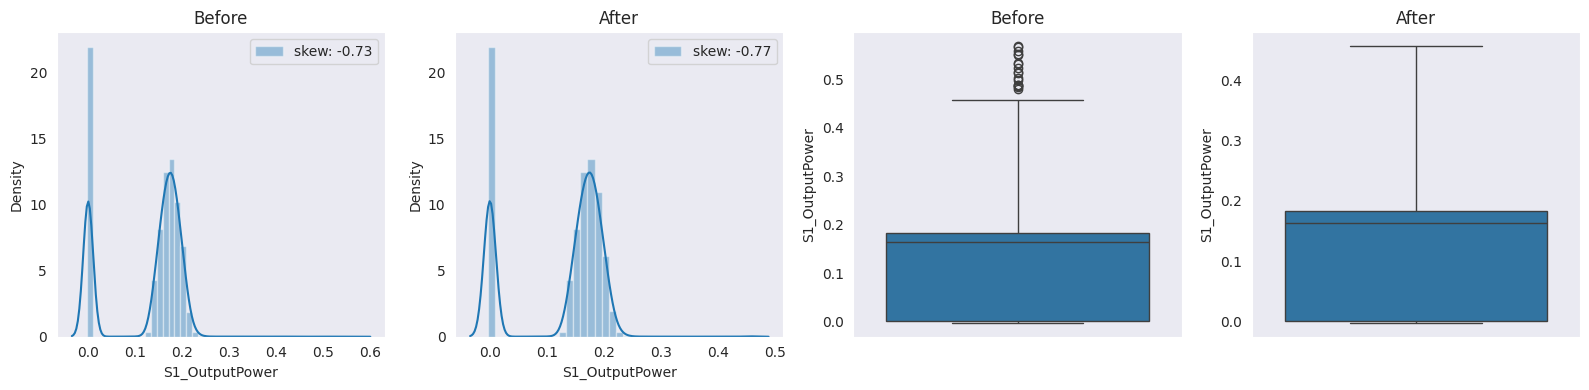

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level functi

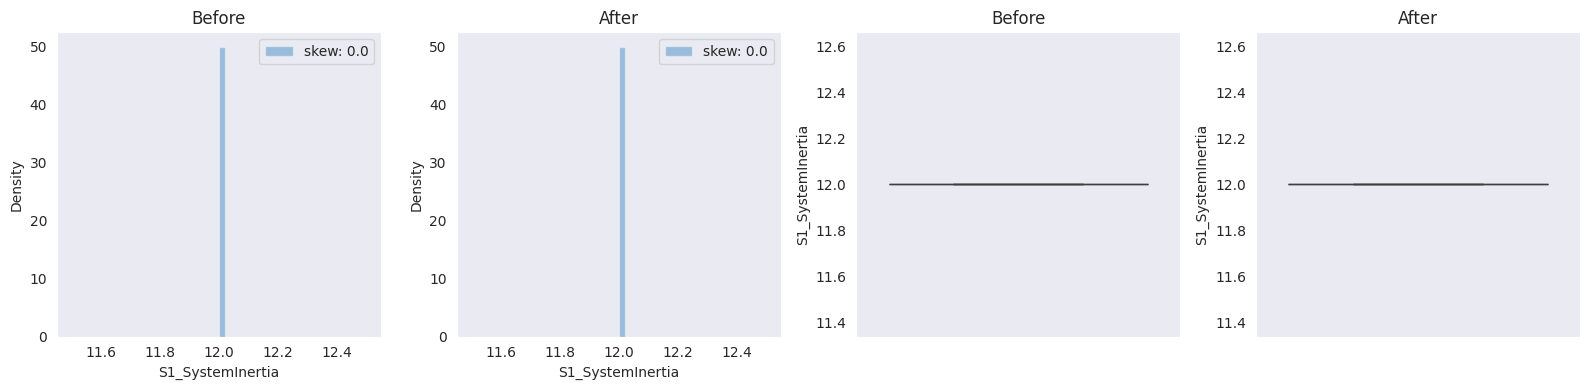

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))
/usr/

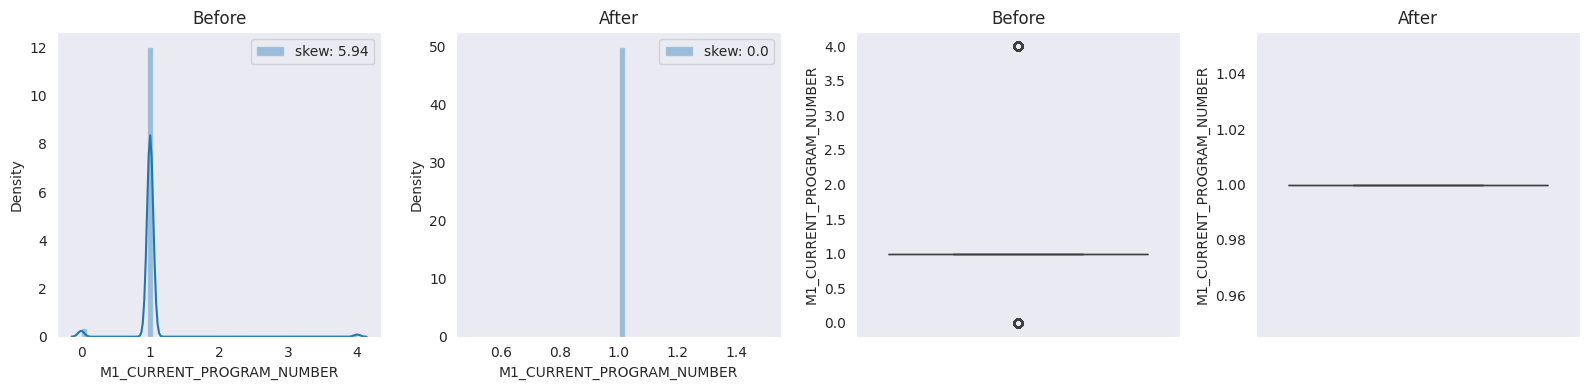

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))


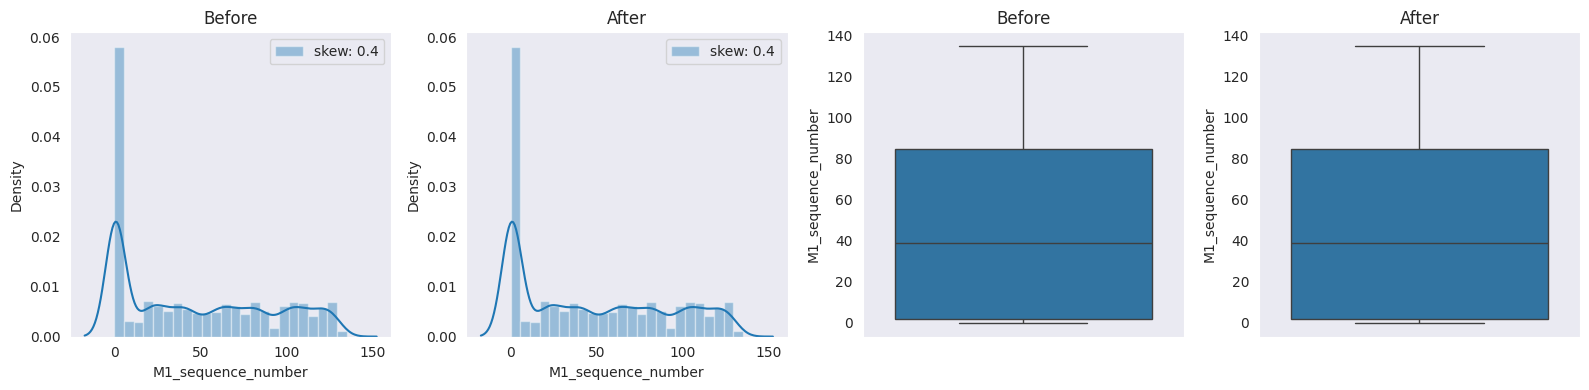

<ipython-input-16-a3489bf42939>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
<ipython-input-16-a3489bf42939>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))


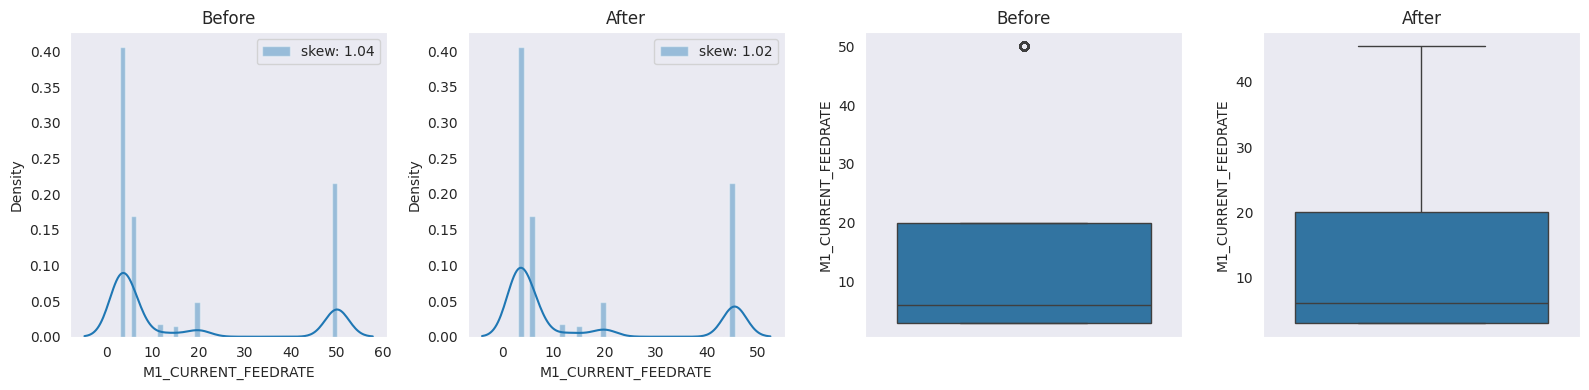

In [16]:
for col in features2:
    plt.figure(figsize=(16,4))

    plt.subplot(141)
    sns.distplot(df2[col], label="skew: " + str(np.round(df2[col].skew(),2)))
    plt.title('Before')
    plt.legend()

    plt.subplot(142)
    sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))
    plt.title('After')
    plt.legend()

    plt.subplot(143)
    sns.boxplot(df2[col])
    plt.title('Before')

    plt.subplot(144)
    sns.boxplot(df_cap[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

# Correlation and Feature Selection

Here we run a classic correlation analysis

In [17]:
df_cap2=df_cap.copy()

In [18]:
# Create correlation matrix
corr_matrixs = df_cap2.corr(method='spearman').abs()
# Select upper triangle of correlation matrix
uppers = corr_matrixs.where(np.triu(np.ones(corr_matrixs.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drops = [column for column in uppers.columns if any(uppers[column] > 0.80)]
to_drops



['X1_CommandPosition',
 'X1_CommandVelocity',
 'X1_CurrentFeedback',
 'X1_OutputVoltage',
 'X1_OutputPower',
 'Y1_CommandPosition',
 'Y1_OutputCurrent',
 'Y1_OutputVoltage',
 'Z1_CommandPosition',
 'S1_CommandPosition',
 'S1_DCBusVoltage',
 'S1_OutputPower',
 'M1_sequence_number']

In [19]:
df_cap2.drop(columns=to_drops,axis=1)

X1_ActualPosition  X1_ActualVelocity  X1_ActualAcceleration  \
0                  187.5              0.000                   0.00   
1                  187.5             -5.425                -115.75   
2                  187.5             -5.425                  -6.25   
3                  187.5             -5.425                   0.00   
4                  187.5             -5.425                 -18.80   
...                  ...                ...                    ...   
25281              144.0             -2.300                 100.00   
25282              144.0             -2.470                  25.00   
25283              143.0             -2.200                  81.20   
25284              143.0             -2.050                  68.70   
25285              143.0             -2.150                 -68.70   

       X1_CommandAcceleration  X1_DCBusVoltage  X1_OutputCurrent  \
0                         0.0           0.0207             328.5   
1                         0.0           0.1660             328.0   
2                         0.0           0.1400             328.0   
3                         0.0           0.1300             327.0   
4                         0.0           0.1140             328.0   
...                       ...              ...               ...   
25281                     0.0           0.0732             327.0   
25282                     0.0           0.0996             327.0   
25283                     0.0           0.0539             327.0   
25284                     0.0           0.0809             327.0   
25285                     0.0           0.0857             327.0   

       Y1_ActualPosition  Y1_ActualVelocity  Y1_ActualAcceleration  \
0                 146.25            -0.0250                  -6.25   
1                 146.25            -0.3375                 -75.20   
2                 146.25            -0.3375                   0.00   
3                 146.25            -0.3375                 -62.50   
4                 146.25            -0.3375                  75.20   
...                  ...                ...                    ...   
25281              73.70             0.3625                 -25.00   
25282              73.80             0.3625                 -12.50   
25283              74.00             0.3625                 -12.50   
25284              74.20             0.3625                   0.00   
25285              74.40             0.3625                  12.50   

       Y1_CommandVelocity  ...  S1_ActualVelocity  S1_ActualAcceleration  \
0                     0.0  ...              0.001                  0.250   
1                     0.0  ...              0.000                  0.250   
2                     0.0  ...              0.000                 -0.438   
3                     0.0  ...             -0.001                 -0.250   
4                     0.0  ...              0.000                 -0.188   
...                   ...  ...                ...                    ...   
25281                 0.0  ...             53.300                -63.600   
25282                 0.0  ...             53.400                 41.200   
25283                 0.0  ...             53.300                -22.300   
25284                 0.0  ...             53.200                -64.400   
25285                 0.0  ...             53.300                -13.700   

       S1_CommandVelocity  S1_CommandAcceleration  S1_CurrentFeedback  \
0                     0.0                     0.0               0.524   
1                     0.0                     0.0              -0.288   
2                     0.0                     0.0               0.524   
3                     0.0                     0.0              -0.180   
4                     0.0                     0.0               0.226   
...                   ...                     ...                 ...   
25281                53.3                     0.0              20.000   
25282      

In [27]:
df_cap2.columns

Index(['X1_ActualPosition', 'X1_ActualVelocity', 'X1_ActualAcceleration',
       'X1_CommandPosition', 'X1_CommandVelocity', 'X1_CommandAcceleration',
       'X1_CurrentFeedback', 'X1_DCBusVoltage', 'X1_OutputCurrent',
       'X1_OutputVoltage', 'X1_OutputPower', 'Y1_ActualPosition',
       'Y1_ActualVelocity', 'Y1_ActualAcceleration', 'Y1_CommandPosition',
       'Y1_CommandVelocity', 'Y1_CommandAcceleration', 'Y1_CurrentFeedback',
       'Y1_DCBusVoltage', 'Y1_OutputCurrent', 'Y1_OutputVoltage',
       'Y1_OutputPower', 'Z1_ActualPosition', 'Z1_ActualVelocity',
       'Z1_ActualAcceleration', 'Z1_CommandPosition', 'Z1_CommandVelocity',
       'Z1_CommandAcceleration', 'Z1_CurrentFeedback', 'Z1_DCBusVoltage',
       'Z1_OutputCurrent', 'Z1_OutputVoltage', 'S1_ActualPosition',
       'S1_ActualVelocity', 'S1_ActualAcceleration', 'S1_CommandPosition',
       'S1_CommandVelocity', 'S1_CommandAcceleration', 'S1_CurrentFeedback',
       'S1_DCBusVoltage', 'S1_OutputCurrent', 'S1_OutputVolt

In [28]:
features3=['X1_ActualPosition', 'X1_ActualVelocity', 'X1_ActualAcceleration',
       'X1_CommandPosition', 'X1_CommandVelocity', 'X1_CommandAcceleration',
       'X1_CurrentFeedback', 'X1_DCBusVoltage', 'X1_OutputCurrent',
       'X1_OutputVoltage', 'X1_OutputPower', 'Y1_ActualPosition',
       'Y1_ActualVelocity', 'Y1_ActualAcceleration', 'Y1_CommandPosition',
       'Y1_CommandVelocity', 'Y1_CommandAcceleration', 'Y1_CurrentFeedback',
       'Y1_DCBusVoltage', 'Y1_OutputCurrent', 'Y1_OutputVoltage',
       'Y1_OutputPower', 'Z1_ActualPosition', 'Z1_ActualVelocity',
       'Z1_ActualAcceleration', 'Z1_CommandPosition', 'Z1_CommandVelocity',
       'Z1_CommandAcceleration', 'Z1_CurrentFeedback', 'Z1_DCBusVoltage',
       'Z1_OutputCurrent', 'Z1_OutputVoltage', 'S1_ActualPosition',
       'S1_ActualVelocity', 'S1_ActualAcceleration', 'S1_CommandPosition',
       'S1_CommandVelocity', 'S1_CommandAcceleration', 'S1_CurrentFeedback',
       'S1_DCBusVoltage', 'S1_OutputCurrent', 'S1_OutputVoltage',
       'S1_OutputPower', 'S1_SystemInertia', 'M1_CURRENT_PROGRAM_NUMBER',
       'M1_sequence_number', 'M1_CURRENT_FEEDRATE']

#### Conclusion of correlation analysis

It has been found that there are no significant correlations between target and other variables, this is mainly because there is no linear relationship which implies a non linear model.

# Data Splitting

In [22]:
#Creating Test Train Splits
x=df_cap2
y=np.array(df['target'])

X_train,X_test,y_train,y_test =train_test_split(x,y,train_size=0.8,random_state=100)


## Data Transformation

In [23]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [24]:
X_train.columns

Index(['X1_ActualPosition', 'X1_ActualVelocity', 'X1_ActualAcceleration',
       'X1_CommandPosition', 'X1_CommandVelocity', 'X1_CommandAcceleration',
       'X1_CurrentFeedback', 'X1_DCBusVoltage', 'X1_OutputCurrent',
       'X1_OutputVoltage', 'X1_OutputPower', 'Y1_ActualPosition',
       'Y1_ActualVelocity', 'Y1_ActualAcceleration', 'Y1_CommandPosition',
       'Y1_CommandVelocity', 'Y1_CommandAcceleration', 'Y1_CurrentFeedback',
       'Y1_DCBusVoltage', 'Y1_OutputCurrent', 'Y1_OutputVoltage',
       'Y1_OutputPower', 'Z1_ActualPosition', 'Z1_ActualVelocity',
       'Z1_ActualAcceleration', 'Z1_CommandPosition', 'Z1_CommandVelocity',
       'Z1_CommandAcceleration', 'Z1_CurrentFeedback', 'Z1_DCBusVoltage',
       'Z1_OutputCurrent', 'Z1_OutputVoltage', 'S1_ActualPosition',
       'S1_ActualVelocity', 'S1_ActualAcceleration', 'S1_CommandPosition',
       'S1_CommandVelocity', 'S1_CommandAcceleration', 'S1_CurrentFeedback',
       'S1_DCBusVoltage', 'S1_OutputCurrent', 'S1_OutputVolt

In [25]:
X_train_norm_df = pd.DataFrame(X_train_norm,columns= ['X1_ActualPosition', 'X1_ActualVelocity', 'X1_ActualAcceleration',
       'X1_CommandPosition', 'X1_CommandVelocity', 'X1_CommandAcceleration',
       'X1_CurrentFeedback', 'X1_DCBusVoltage', 'X1_OutputCurrent',
       'X1_OutputVoltage', 'X1_OutputPower', 'Y1_ActualPosition',
       'Y1_ActualVelocity', 'Y1_ActualAcceleration', 'Y1_CommandPosition',
       'Y1_CommandVelocity', 'Y1_CommandAcceleration', 'Y1_CurrentFeedback',
       'Y1_DCBusVoltage', 'Y1_OutputCurrent', 'Y1_OutputVoltage',
       'Y1_OutputPower', 'Z1_ActualPosition', 'Z1_ActualVelocity',
       'Z1_ActualAcceleration', 'Z1_CommandPosition', 'Z1_CommandVelocity',
       'Z1_CommandAcceleration', 'Z1_CurrentFeedback', 'Z1_DCBusVoltage',
       'Z1_OutputCurrent', 'Z1_OutputVoltage', 'S1_ActualPosition',
       'S1_ActualVelocity', 'S1_ActualAcceleration', 'S1_CommandPosition',
       'S1_CommandVelocity', 'S1_CommandAcceleration', 'S1_CurrentFeedback',
       'S1_DCBusVoltage', 'S1_OutputCurrent', 'S1_OutputVoltage',
       'S1_OutputPower', 'S1_SystemInertia', 'M1_CURRENT_PROGRAM_NUMBER',
       'M1_sequence_number', 'M1_CURRENT_FEEDRATE'])

In [26]:
# copy of datasets
X_train_box= X_train.copy()
X_test_box= X_test.copy()

# numerical features
num_cols = ['X1_ActualPosition', 'X1_ActualVelocity', 'X1_ActualAcceleration',
       'X1_CommandPosition', 'X1_CommandVelocity', 'X1_CommandAcceleration',
       'X1_CurrentFeedback', 'X1_DCBusVoltage', 'X1_OutputCurrent',
       'X1_OutputVoltage', 'X1_OutputPower', 'Y1_ActualPosition',
       'Y1_ActualVelocity', 'Y1_ActualAcceleration', 'Y1_CommandPosition',
       'Y1_CommandVelocity', 'Y1_CommandAcceleration', 'Y1_CurrentFeedback',
       'Y1_DCBusVoltage', 'Y1_OutputCurrent', 'Y1_OutputVoltage',
       'Y1_OutputPower', 'Z1_ActualPosition', 'Z1_ActualVelocity',
       'Z1_ActualAcceleration', 'Z1_CommandPosition', 'Z1_CommandVelocity',
       'Z1_CommandAcceleration', 'Z1_CurrentFeedback', 'Z1_DCBusVoltage',
       'Z1_OutputCurrent', 'Z1_OutputVoltage', 'S1_ActualPosition',
       'S1_ActualVelocity', 'S1_ActualAcceleration', 'S1_CommandPosition',
       'S1_CommandVelocity', 'S1_CommandAcceleration', 'S1_CurrentFeedback',
       'S1_DCBusVoltage', 'S1_OutputCurrent', 'S1_OutputVoltage',
       'S1_OutputPower', 'S1_SystemInertia', 'M1_CURRENT_PROGRAM_NUMBER',
       'M1_sequence_number', 'M1_CURRENT_FEEDRATE']

# apply standardization on numerical features
for i in num_cols:

    X_train_box[[i]] = PowerTransformer(method='yeo-johnson').fit_transform(X_train_box[[i]])
    # transform the testing data column
    X_test_box[[i]] = PowerTransformer(method='yeo-johnson').fit_transform(X_test_box[[i]])

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


<ipython-input-29-fb962e7e078d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_box[col], label="skew: " + str(np.round(X_train_box[col].skew(),2)))
<ipython-input-29-fb962e7e078d>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_norm_df[col], label="skew: " + str(np.round(X_tr

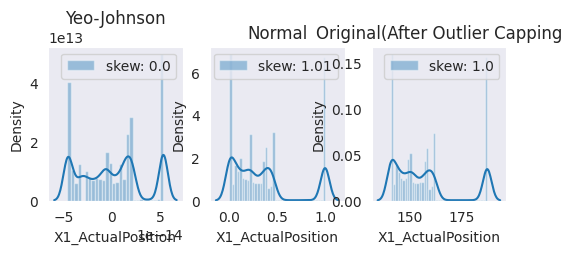

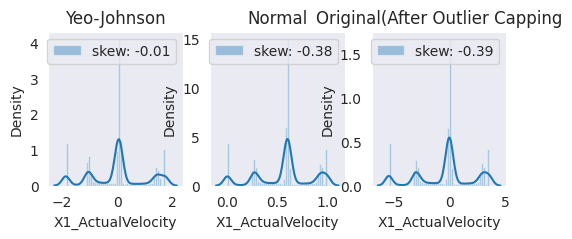

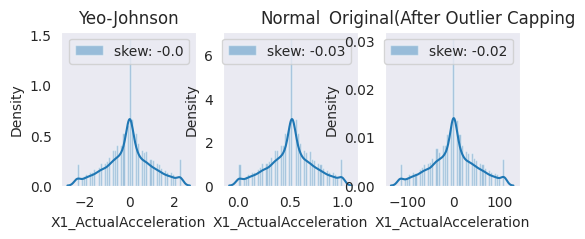

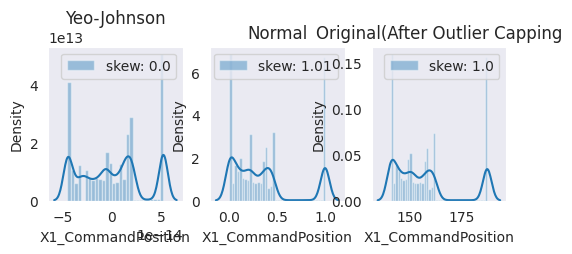

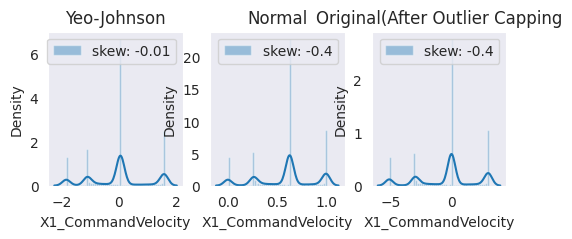

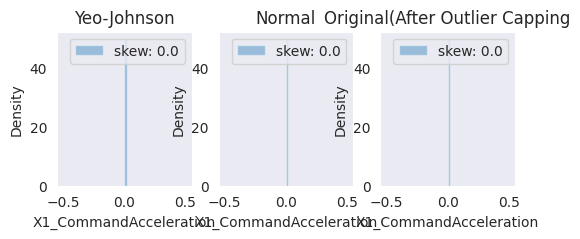

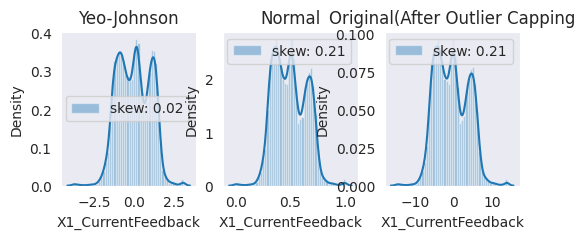

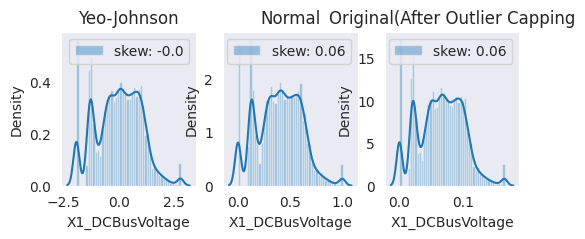

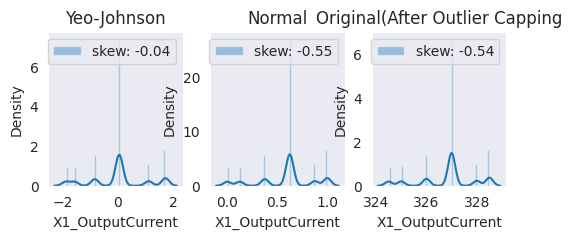

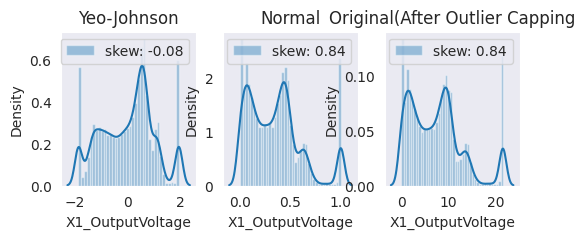

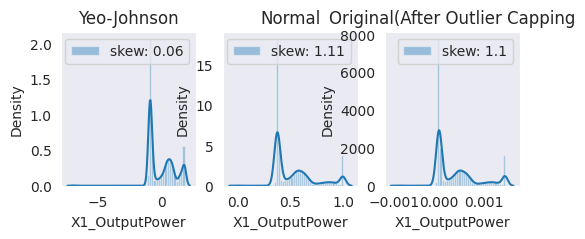

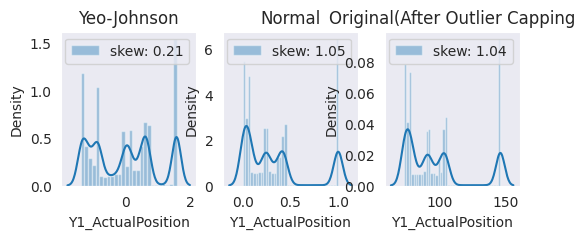

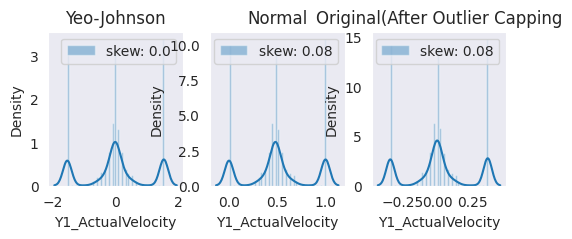

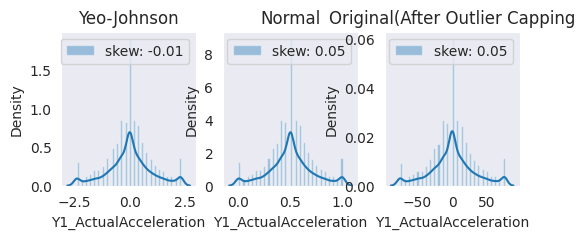

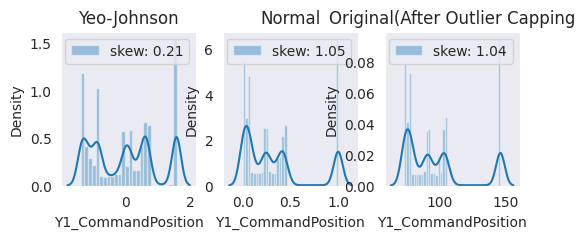

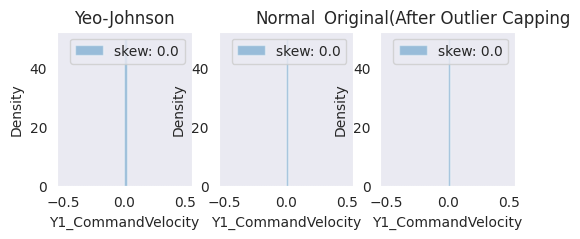

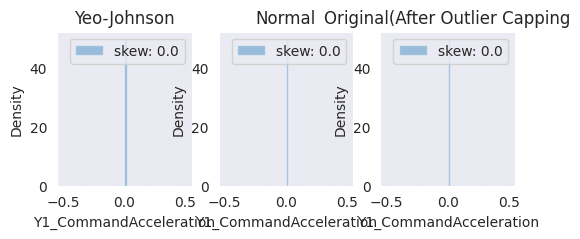

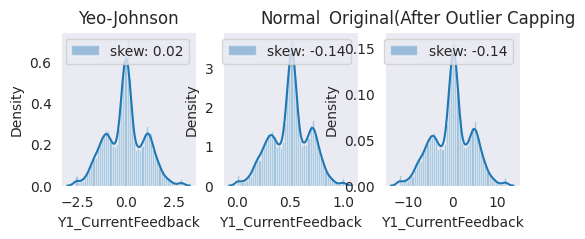

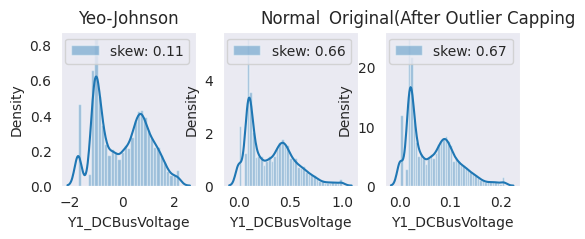

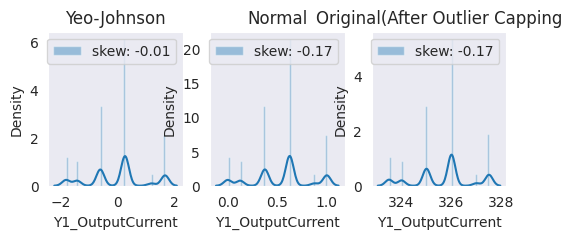

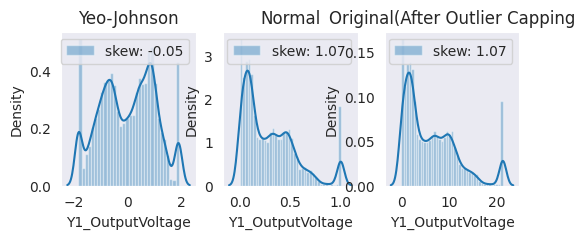

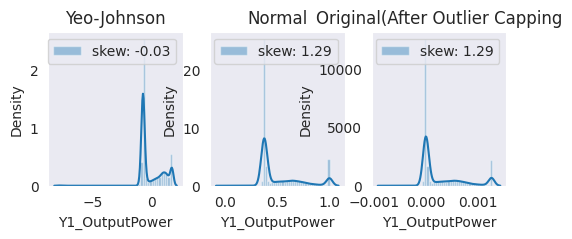

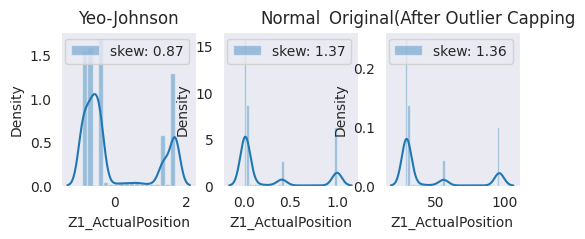

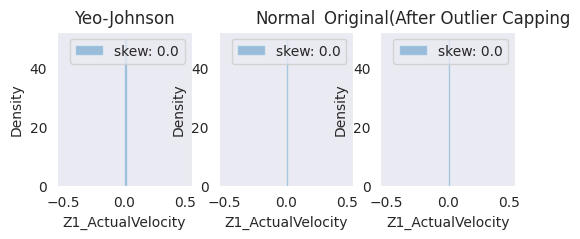

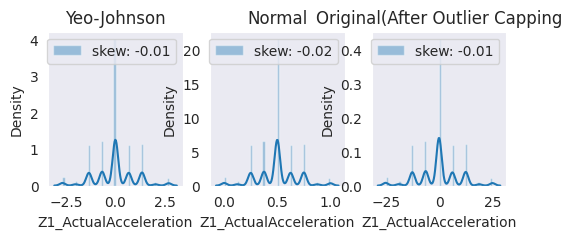

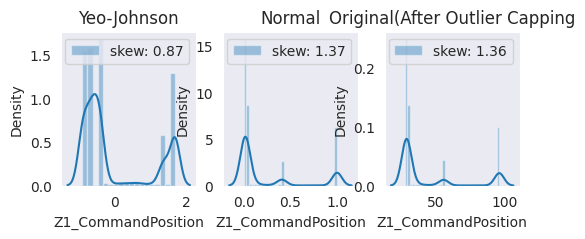

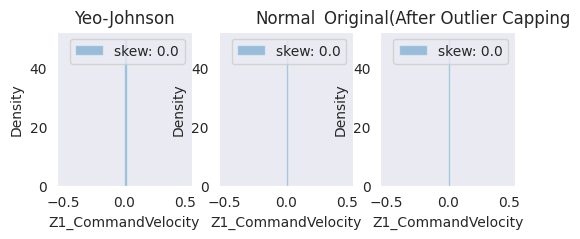

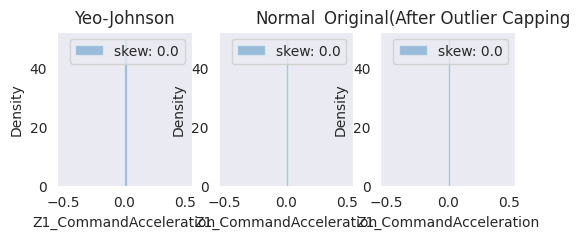

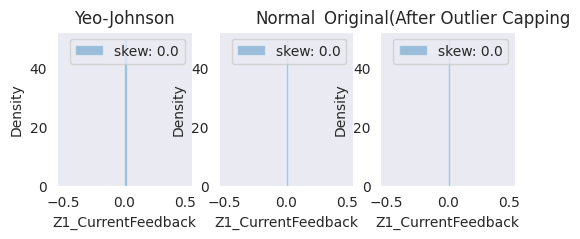

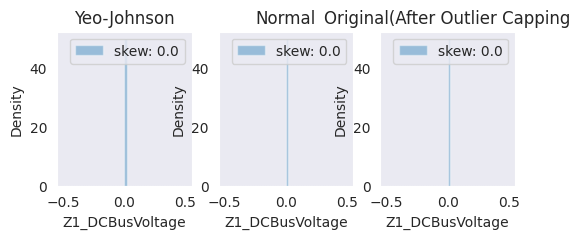

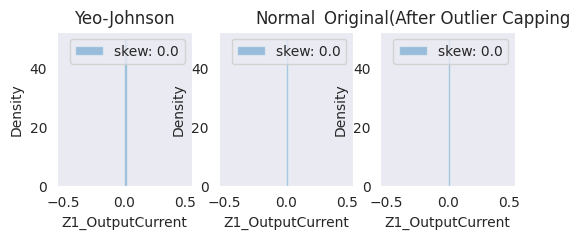

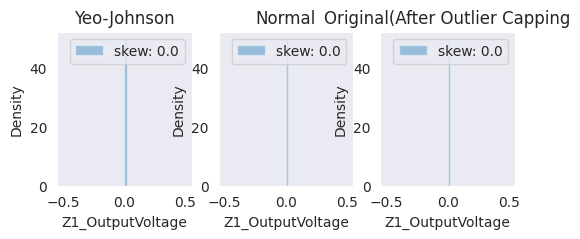

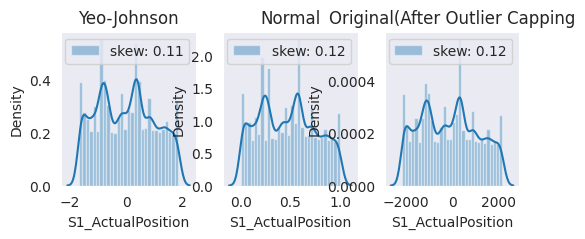

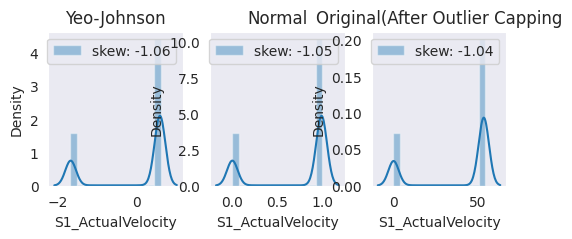

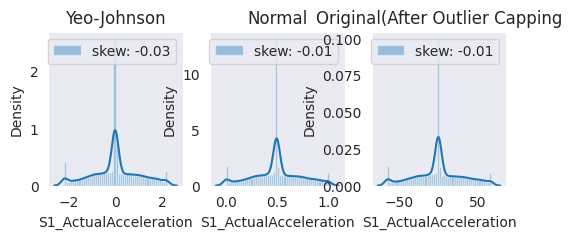

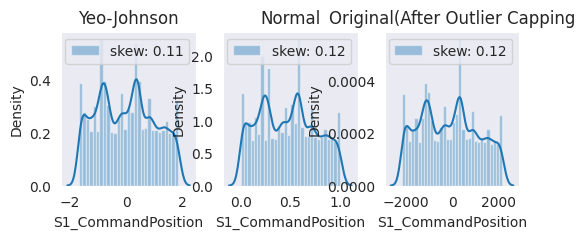

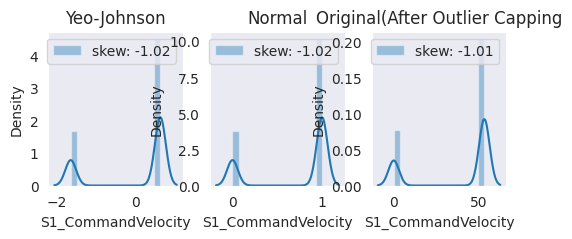

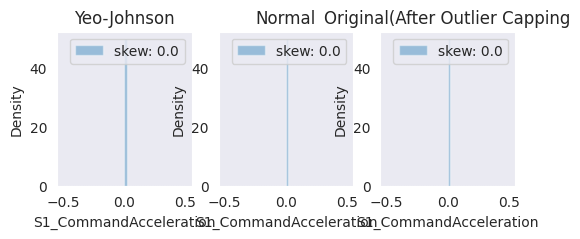

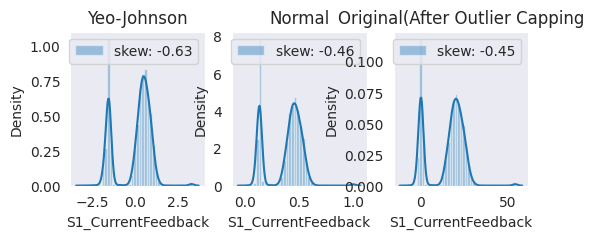

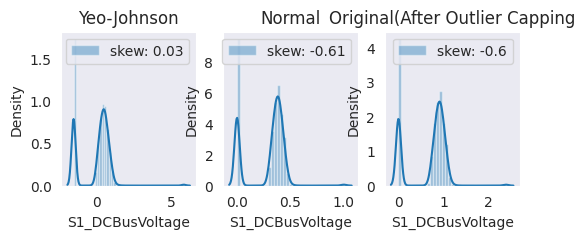

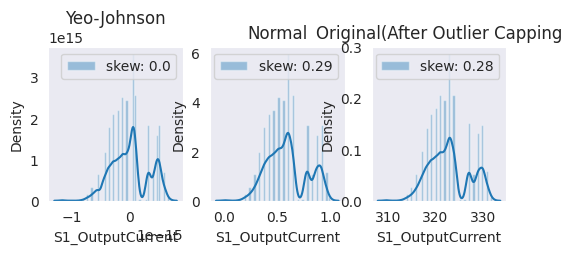

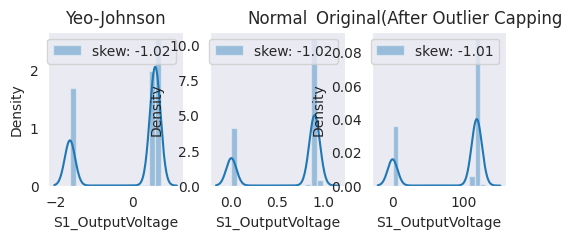

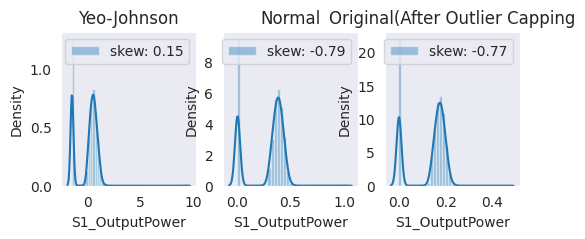

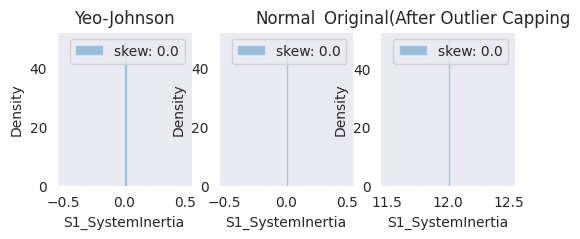

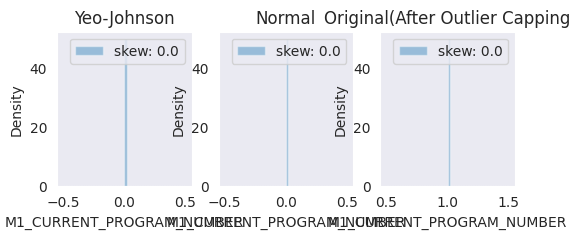

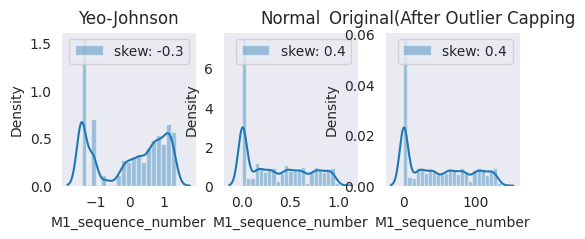

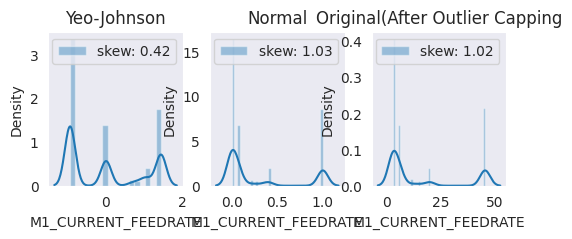

In [29]:
for col in features3:
    plt.figure(figsize=(8,2))

    plt.subplot(141)
    sns.distplot(X_train_box[col], label="skew: " + str(np.round(X_train_box[col].skew(),2)))
    plt.title('Yeo-Johnson')
    plt.legend()

    plt.subplot(142)
    sns.distplot(X_train_norm_df[col], label="skew: " + str(np.round(X_train_norm_df[col].skew(),2)))
    plt.title('Normal')
    plt.legend()

    plt.subplot(143)
    sns.distplot(df_cap2[col], label="skew: " + str(np.round(df_cap2[col].skew(),2)))
    plt.title('Original(After Outlier Capping')
    plt.legend()

## Importing Libraries

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
import numpy as np

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables
%matplotlib inline



## Training ML algorithms

### Logistic Regression

In [51]:

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred_1 = classifier.predict(X_test)
acc1 = accuracy_score(y_test, y_pred_1)
print("Accuracy: %.2f%%" % (acc1* 100.0))
cnf_matrix1 = confusion_matrix(y_test, y_pred_1)
print(cnf_matrix1)


Accuracy: 56.21%
[[1032 1387]
 [ 828 1811]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
# training a Logistic Regression model
lr = LogisticRegression(random_state = 0)

acc1= []
cnf_matrix1=[]
# raw, normalized and standardized training and testing data
trainX = [X_train, X_train_norm, X_train_box]
testX = [X_test, X_test_norm, X_test_box]
# model fitting and measuring RMSE
for i in range(len(trainX)):

    # fit
    lr.fit(trainX[i],y_train)
    # predict
    pred = lr.predict(testX[i])
    acc1.append(accuracy_score(y_test,pred)*100)
    cnf_matrix1.append(confusion_matrix(y_test, pred))



# visualizing the result
df_lr = pd.DataFrame({'Accuracy':acc1, 'confusion Matrix':cnf_matrix1},index=['Original','Normalized','Yeo Johnson'])
df_lr

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy              confusion Matrix
Original     56.207987   [[1032, 1387], [828, 1811]]
Normalized   56.247529  [[1229, 1190], [1023, 1616]]
Yeo Johnson  58.521155   [[1281, 1138], [960, 1679]]

### Support Vector Classification

In [53]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
y_pred_2 = classifier.predict(X_test)
acc2 = accuracy_score(y_test, y_pred_2)
print("Accuracy: %.2f%%" % (acc2 * 100.0))
cnf_matrix2 = confusion_matrix(y_test, y_pred_2)
print(cnf_matrix2)

Accuracy: 58.78%
[[ 924 1495]
 [ 590 2049]]


In [47]:
# training a Support Vector Classification
svc = SVC(kernel = 'rbf', random_state = 0)

acc2 = []
cnf_matrix2=[]
# raw, normalized and standardized training and testing data
trainX = [X_train, X_train_norm, X_train_box]
testX = [X_test, X_test_norm, X_test_box]
# model fitting and measuring RMSE
for i in range(len(trainX)):

    # fit
    svc.fit(trainX[i],y_train)
    # predict
    pred = svc.predict(testX[i])
    acc2.append(accuracy_score(y_test,pred)*100)
    cnf_matrix2.append(confusion_matrix(y_test, pred))



# visualizing the result
df_svc = pd.DataFrame({'Accuracy':acc2, 'confusion Matrix':cnf_matrix2},index=['Original','Normalized','Yeo Johnson'])
df_svc

Accuracy            confusion Matrix
Original     58.778173  [[924, 1495], [590, 2049]]
Normalized   71.233689  [[1653, 766], [689, 1950]]
Yeo Johnson  75.603005  [[1798, 621], [613, 2026]]

### Gaussian Classifier

In [54]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred_3 = classifier.predict(X_test)
acc3 = accuracy_score(y_test, y_pred_3)
print("Accuracy: %.2f%%" % (acc3 * 100.0))
cnf_matrix3 = confusion_matrix(y_test, y_pred_3)
print(cnf_matrix3)

Accuracy: 52.69%
[[ 658 1761]
 [ 632 2007]]


In [55]:
# training a Gaussian Classification
gc=GaussianNB()
acc3 = []
cnf_matrix3=[]
# raw, normalized and standardized training and testing data
trainX = [X_train, X_train_norm, X_train_box]
testX = [X_test, X_test_norm, X_test_box]
# model fitting and measuring RMSE
for i in range(len(trainX)):

    # fit
    gc.fit(trainX[i],y_train)
    # predict
    pred = gc.predict(testX[i])
    acc3.append(accuracy_score(y_test,pred)*100)
    cnf_matrix3.append(confusion_matrix(y_test, pred))



# visualizing the result
df_gc = pd.DataFrame({'Accuracy':acc3, 'confusion Matrix':cnf_matrix3},index=['Original','Normalized','Yeo Johnson'])
df_gc

Accuracy            confusion Matrix
Original     52.688810  [[658, 1761], [632, 2007]]
Normalized   52.748122  [[715, 1704], [686, 1953]]
Yeo Johnson  53.321471  [[889, 1530], [831, 1808]]

### KNN Classifier

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred_4 = classifier.predict(X_test)
acc4 = accuracy_score(y_test, y_pred_4)
print("Accuracy: %.2f%%" % (acc4 * 100.0))
cnf_matrix4 = confusion_matrix(y_test, y_pred_4)
print(cnf_matrix4)


Accuracy: 75.92%
[[1809  610]
 [ 608 2031]]


In [58]:
# training a KNN Classification
knn = KNeighborsClassifier(n_neighbors=5)
acc4 = []
cnf_matrix4=[]
# raw, normalized and standardized training and testing data
trainX = [X_train, X_train_norm, X_train_box]
testX = [X_test, X_test_norm, X_test_box]
# model fitting and measuring RMSE
for i in range(len(trainX)):

    # fit
    knn.fit(trainX[i],y_train)
    # predict
    pred = knn.predict(testX[i])
    acc4.append(accuracy_score(y_test,pred)*100)
    cnf_matrix4.append(confusion_matrix(y_test, pred))



# visualizing the result
df_knn = pd.DataFrame({'Accuracy':acc4, 'confusion Matrix':cnf_matrix4},index=['Original','Normalized','Yeo Johnson'])
df_knn

Accuracy            confusion Matrix
Original     75.919336  [[1809, 610], [608, 2031]]
Normalized   84.400949  [[2030, 389], [400, 2239]]
Yeo Johnson  80.288652  [[1938, 481], [516, 2123]]

### Decision Tree Classifier

In [59]:
classifier = DecisionTreeClassifier(max_depth=7)
classifier.fit(X_train, y_train)
y_pred_5 = classifier.predict(X_test)
acc5 = accuracy_score(y_test, y_pred_5)
print("Accuracy: %.2f%%" % (acc5 * 100.0))
cnf_matrix5 = confusion_matrix(y_test, y_pred_5)
print(cnf_matrix5)


Accuracy: 87.33%
[[1784  635]
 [   6 2633]]


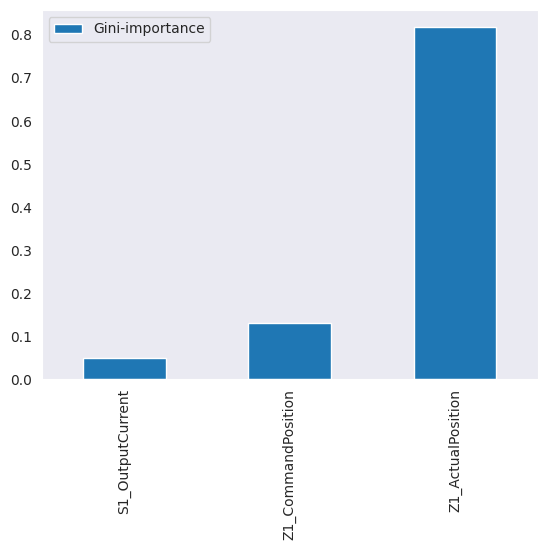

In [60]:
los=[]
for i in df.columns:
  if (i != 'target'):
    los.append(i)
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(los, classifier.feature_importances_):
    if (importance>0.025):
        feats[feature] = importance #add the name/value pair

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90)
classifier.feature_importances_
importances = classifier.feature_importances_
indices = np.argsort(importances)

In [62]:
# training a dt Classification
dt = DecisionTreeClassifier(max_depth=7)
acc5 = []
cnf_matrix5=[]
# raw, normalized and standardized training and testing data
trainX = [X_train, X_train_norm, X_train_box]
testX = [X_test, X_test_norm, X_test_box]
# model fitting and measuring RMSE
for i in range(len(trainX)):

    # fit
    dt.fit(trainX[i],y_train)
    # predict
    pred = dt.predict(testX[i])
    acc5.append(accuracy_score(y_test,pred)*100)
    cnf_matrix5.append(confusion_matrix(y_test, pred))



# visualizing the result
df_dt = pd.DataFrame({'Accuracy':acc5, 'confusion Matrix':cnf_matrix5},index=['Original','Normalized','Yeo Johnson'])
df_dt

Accuracy              confusion Matrix
Original     87.307236      [[1784, 635], [7, 2632]]
Normalized   87.346777      [[1785, 634], [6, 2633]]
Yeo Johnson  53.756425  [[1362, 1057], [1282, 1357]]

### Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier as RFC
classifier=RFC(n_estimators=100,criterion='entropy',random_state=0)

classifier.fit(X_train, y_train)
y_pred_6 = classifier.predict(X_test)
acc6 = accuracy_score(y_test, y_pred_6)
print("Accuracy: %.2f%%" % (acc6 * 100.0))
cnf_matrix6 = confusion_matrix(y_test, y_pred_6)
print(cnf_matrix6)


Accuracy: 99.15%
[[2387   32]
 [  11 2628]]


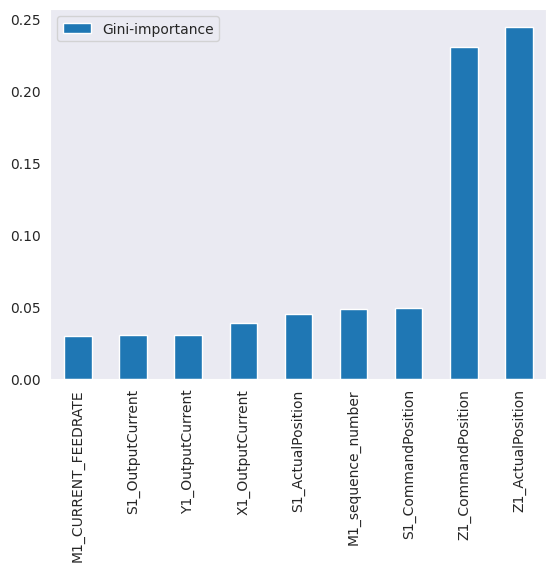

In [64]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(los, classifier.feature_importances_):
    if (importance>0.025):
        feats[feature] = importance #add the name/value pair

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90)
classifier.feature_importances_
importances = classifier.feature_importances_
indices = np.argsort(importances)

### Optimizing Random Forest Classifier

In [65]:

# Generate some random data for example purposes

# Define the parameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Use grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)
y_pred_6_5 = classifier.predict(X_test)
acc7 = accuracy_score(y_test, y_pred_6_5)
print("Accuracy: %.2f%%" % (acc7 * 100.0))
cnf_matrix7 = confusion_matrix(y_test, y_pred_6_5)
print(cnf_matrix7)



KeyboardInterrupt: 

In [68]:
# training a dt Classification
rf=RFC(n_estimators=100,criterion='entropy',random_state=0)
acc6 = []
cnf_matrix6=[]
# raw, normalized and standardized training and testing data
trainX = [X_train, X_train_norm, X_train_box]
testX = [X_test, X_test_norm, X_test_box]
# model fitting and measuring RMSE
for i in range(len(trainX)):

    # fit
    rf.fit(trainX[i],y_train)
    # predict
    pred = rf.predict(testX[i])
    acc6.append(accuracy_score(y_test,pred)*100)
    cnf_matrix6.append(confusion_matrix(y_test, pred))



# visualizing the result
df_rf = pd.DataFrame({'Accuracy':acc6, 'confusion Matrix':cnf_matrix6},index=['Original','Normalized','Yeo Johnson'])
df_rf

Accuracy           confusion Matrix
Original     99.149862   [[2387, 32], [11, 2628]]
Normalized   99.169632   [[2388, 31], [11, 2628]]
Yeo Johnson  87.999209  [[2377, 42], [565, 2074]]

### XG Boost Classifier

In [66]:
classifier=XGBClassifier()
classifier.fit(X_train,y_train)
y_pred_7 = classifier.predict(X_test)
acc8 = accuracy_score(y_test, y_pred_7)
print("Accuracy: %.2f%%" % (acc8 * 100.0))
cnf_matrix8 = confusion_matrix(y_test, y_pred_7)
print(cnf_matrix8)

Accuracy: 99.43%
[[2401   18]
 [  11 2628]]


In [67]:
# Feature importances
features = [(df.columns[i], v) for i,v in enumerate(classifier.feature_importances_)]
features.sort(key=lambda x: x[1], reverse = True)
for item in features[:10]:
    print("{0}: {1:0.4f}".format(item[0], item[1]))

Z1_CommandPosition: 0.3278
Z1_ActualPosition: 0.1689
Y1_DCBusVoltage: 0.0988
S1_DCBusVoltage: 0.0721
M1_CURRENT_FEEDRATE: 0.0676
X1_ActualPosition: 0.0505
X1_DCBusVoltage: 0.0244
S1_OutputCurrent: 0.0242
S1_ActualPosition: 0.0210
X1_OutputCurrent: 0.0165


In [69]:
# training a dt Classification
xgb=XGBClassifier()
acc7 = []
cnf_matrix7=[]
# raw, normalized and standardized training and testing data
trainX = [X_train, X_train_norm, X_train_box]
testX = [X_test, X_test_norm, X_test_box]
# model fitting and measuring RMSE
for i in range(len(trainX)):

    # fit
    xgb.fit(trainX[i],y_train)
    # predict
    pred = xgb.predict(testX[i])
    acc7.append(accuracy_score(y_test,pred)*100)
    cnf_matrix7.append(confusion_matrix(y_test, pred))



# visualizing the result
df_xgb = pd.DataFrame({'Accuracy':acc7, 'confusion Matrix':cnf_matrix7},index=['Original','Normalized','Yeo Johnson'])
df_xgb

Accuracy            confusion Matrix
Original     99.426651    [[2401, 18], [11, 2628]]
Normalized   99.426651    [[2401, 18], [11, 2628]]
Yeo Johnson  53.875049  [[1889, 530], [1803, 836]]

### Ensemble modelling

In [70]:
from statistics import mode
from scipy import stats as s


final_pred = np.array([])
for i in range(0,len(X_test)):

    final_pred = np.append(final_pred, s.mode([y_pred_7[i],y_pred_7[i],y_pred_7[i], y_pred_6[i],y_pred_6[i],y_pred_5[i], y_pred_5[i]])[0])

In [71]:
c = accuracy_score(y_test, final_pred)
print("Accuracy: %.2f%%" % (c * 100.0))
cnf_matrix = confusion_matrix(y_test, final_pred)
print(cnf_matrix)

Accuracy: 99.13%
[[2383   36]
 [   8 2631]]


## We have chosen the ensembled model as our best model. This is due to the fact that this is the model which produced the least number of false negatives and highest accuracy. The reason behind not wanting a false negative is because we don't want our ML model to tell that the tool has not worn when in face, it had actually worn out.